In [2]:
import math
import os 
import warnings

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.float_format',lambda x:'%.3f' % x)
pd.set_option("max_columns", 300)
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/Users/fireyr/Documents/heywhale_data/PPD-First-Round-Data-Update/Training Set/PPD_Training_Master_GBK_3_1_Training_Set.csv')
print (data.shape)

(30000, 228)


In [4]:
data.head(10)

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_1  \
0  10001       1.000         深圳       4.000         深圳           nan   
1  10002       1.000         温州       4.000         温州           nan   
2  10003       1.000         宜昌       3.000         宜昌           nan   
3  10006       4.000         南平       1.000         南平           nan   
4  10007       5.000         辽阳       1.000         辽阳           nan   
5  10008       1.000         吴忠       5.000         银川           nan   
6  10011       1.000         绵阳       3.000         赤峰           nan   
7  10015       4.000         东莞       5.000         东莞           nan   
8  10019       1.000         赤峰       6.000         赤峰           nan   
9  10021       3.000         武汉       5.000         鄂州           nan   

   WeblogInfo_2  WeblogInfo_3  WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  \
0         1.000           nan         1.000         1.000         1.000   
1         0.000           nan         1.000         1.000         1.000   
2         0.000           nan         2.000         2.000         2.000   
3           nan           nan           nan           nan           nan   
4         0.000           nan         1.000         1.000         1.000   
5         0.000           nan         2.000         2.000         2.000   
6         0.000           nan        13.000         1.000        13.000   
7         0.000           nan        12.000         6.000        12.000   
8         0.000           nan        10.000         6.000        10.000   
9         0.000           nan         1.000         1.000         1.000   

   WeblogInfo_7  WeblogInfo_8  WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  \
0            14             0             0              0              0   
1            14             0             0              0              0   
2             9             3             0              0              0   
3             2             0             0              0              0   
4             3             0             0              0              0   
5             4             0             0              0              0   
6            15             0             0              0              0   
7             8             0             0              0              0   
8            19             0             0              0              0   
9             6             0             0              0              0   

   WeblogInfo_12  WeblogInfo_13  WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  \
0              0              0              6              6              0   
1              0              0              0              0              7   
2              0              0              0              0              3   
3              0              0              0              0              0   
4              0              0              0              0              0   
5              0              0              0              1              1   
6              0              0              0              2              2   
7              0              0              0              2              1   
8              0              1              0              1              9   
9              0              0              0              0              1   

   WeblogInfo_17  WeblogInfo_18  UserInfo_5  UserInfo_6 UserInfo_7 UserInfo_8  \
0              6              2           2           2         广东         深圳   
1              7              0           2           2         浙江         温州   
2              4              2           2           2         湖北         宜昌   
3              2              0           2           2         福建         南平   
4              3              0           2           2         辽宁         辽阳   
5              2              0           2           2         不详         不详   
6             10              1           2           2        内蒙古         包头   
7        

In [5]:
# 正负样本的比例
data.target.value_counts()

0    27802
1     2198
Name: target, dtype: int64

In [6]:
data.isnull()

Idx  UserInfo_1  UserInfo_2  UserInfo_3  UserInfo_4  WeblogInfo_1  \
0      False       False       False       False       False          True   
1      False       False       False       False       False          True   
2      False       False       False       False       False          True   
3      False       False       False       False       False          True   
4      False       False       False       False       False          True   
...      ...         ...         ...         ...         ...           ...   
29995  False       False       False       False       False          True   
29996  False       False       False       False       False          True   
29997  False       False       False       False       False          True   
29998  False       False       False       False       False          True   
29999  False       False       False       False       False          True   

       WeblogInfo_2  WeblogInfo_3  WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  \
0             False          True         False         False         False   
1             False          True         False         False         False   
2             False          True         False         False         False   
3              True          True          True          True          True   
4             False          True         False         False         False   
...             ...           ...           ...           ...           ...   
29995         False          True         False         False         False   
29996         False          True         False         False         False   
29997         False          True         False         False         False   
29998         False          True         False         False         False   
29999         False          True         False         False         False   

       WeblogInfo_7  WeblogInfo_8  WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  \
0             False         False         False          False          False   
1             False         False         False          False          False   
2             False         False         False          False          False   
3             False         False         False          False          False   
4             False         False         False          False          False   
...             ...           ...           ...            ...            ...   
29995         False         False         False          False          False   
29996         False         False         False          False          False   
29997         False         False         False          False          False   
29998         False         False         False          False          False   
29999         False         False         False          False          False   

       WeblogInfo_12  WeblogInfo_13  WeblogInfo_14  WeblogInfo_15  \
0              False          False          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
29995          False          False          False          False   
29996          False          False          False          False   
29997          False          False          False          False   
29998          False          False          False          False   
29999          False          False          False          False   

       WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  UserInfo_5  UserInfo_6  \
0              False          False          False       False       False   
1              False          False          False       False       False   
2              False          False          False       False       False   
3        

In [7]:
data_rate=data.isnull().sum().sort_values(ascending=False)/len(data)
print(data_rate.head(20))

WeblogInfo_1    0.968
WeblogInfo_3    0.968
UserInfo_12     0.630
UserInfo_11     0.630
UserInfo_13     0.630
WeblogInfo_20   0.268
WeblogInfo_21   0.102
WeblogInfo_19   0.099
WeblogInfo_2    0.055
WeblogInfo_6    0.055
WeblogInfo_4    0.055
WeblogInfo_5    0.055
UserInfo_2      0.010
UserInfo_4      0.009
WeblogInfo_24   0.008
WeblogInfo_23   0.008
WeblogInfo_25   0.008
WeblogInfo_44   0.008
WeblogInfo_45   0.008
WeblogInfo_26   0.008
dtype: float64


In [8]:
# pd.set_option("max_columns", 300)
data.drop(['WeblogInfo_1','WeblogInfo_3'],axis=1,inplace=True)

In [9]:
# from scipy.stats import mode
def fillna(df,s):
    for col in s:
        counts = df[col].value_counts()
        df[col].fillna(np.argmax(counts),axis=0,inplace=True)
    return df
def combine(s,i,j):
    lst=[]
    for col in range(i,j+1):
        name=s+str(col)
        lst.append(name)
    return lst

col_list=['UserInfo_1','UserInfo_3','UserInfo_11','UserInfo_12','UserInfo_13','WeblogInfo_2','WeblogInfo_4','WeblogInfo_5','WeblogInfo_6']
col_list.extend(combine('WeblogInfo_',23,49))
col_list_kind=['UserInfo_2','UserInfo_4']
col_list_kind.extend(combine('WeblogInfo_',19,21))
fillna(data,col_list)
fillna(data,col_list_kind)
data.head()

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_2  \
0  10001       1.000         深圳       4.000         深圳         1.000   
1  10002       1.000         温州       4.000         温州         0.000   
2  10003       1.000         宜昌       3.000         宜昌         0.000   
3  10006       4.000         南平       1.000         南平         0.000   
4  10007       5.000         辽阳       1.000         辽阳         0.000   

   WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0         1.000         1.000         1.000            14             0   
1         1.000         1.000         1.000            14             0   
2         2.000         2.000         2.000             9             3   
3         0.000         0.000         0.000             2             0   
4         1.000         1.000         1.000             3             0   

   WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0              6              6              0              6              2   
1              0              0              7              7              0   
2              0              0              3              4              2   
3              0              0              0              2              0   
4              0              0              0              3              0   

   UserInfo_5  UserInfo_6 UserInfo_7 UserInfo_8 UserInfo_9  UserInfo_10  \
0           2           2         广东         深圳      中国移动             0   
1           2           2         浙江         温州      中国移动             1   
2           2           2         湖北         宜昌      中国电信             0   
3           2           2         福建         南平      中国移动             0   
4           2           2         辽宁         辽阳      中国移动             0   

   UserInfo_11  UserInfo_12  UserInfo_13  UserInfo_14  UserInfo_15  \
0        0.000        0.000        0.000            2            2   
1        0.000        0.000        1.000            3            3   
2        0.000        0.000        1.000            4            4   
3        0.000        0.000        1.000            2            2   
4        0.000        0.000        0.000            3            3   

   UserInfo_16  UserInfo_17  UserInfo_18 UserInfo_19 UserInfo_20  UserInfo_21  \
0            1            1           29         四川省         南充市            0   
1            2            2           28         福建省          不详            0   
2            2            1           32         湖北省         宜昌市            0   
3            1            1           33         江西省          不详            0   
4            1            1           43         辽宁省         锦州市            0   

  UserInfo_22 UserInfo_23 UserInfo_24  Education_Info1 Education_Info2  \
0           D           D           D                0               E   
1           D           D           D                0               E   
2           D           D           D                0               E   
3           D           D           D                0               E   
4           D           D           D                0               E   

  Education_Info3 Education_Info4  Education_Info5 Education_Info6  \
0               E               E                0               E   
1               E               E                0               E   
2               E               E                0               E   
3               E               E                0               E   
4          

In [10]:
data_new=data.isnull().sum()

In [11]:
df_feature_new = pd.DataFrame(data=data_new.values, index=data_new.index, columns=['缺失值数量'])
# 展示填充处理后的每个特征缺失值之和，若结果为0则说明目前数据集没有缺失值
print('填充缺失值后，数据集所有特征的缺失值之和是:{}'.format(df_feature_new['缺失值数量'].sum()))


填充缺失值后，数据集所有特征的缺失值之和是:0


In [12]:
def proportion_01(plot_data,title):
    plt.figure(figsize=(40,30))

    plot_data['sum'] = plot_data[0]+plot_data[1]
    # 计算0的比例,并重新传给plot_data[0]
    plot_data[0] = plot_data[0] / plot_data['sum']
    # 计算1的比例,并重新传给plot_data[1]
    plot_data[1] = plot_data[1] / plot_data['sum']

    #删除sum列
    plot_data.drop('sum', axis=1, inplace=True)
    # 画堆叠柱状图，颜色为绿色，并带网格，透明度为0.75
    plot_data.plot(kind='bar',figsize=(15,8),width = 0.3, colormap='winter', stacked=True, alpha=1)
    # 添加图的标题
    plt.title(label=title)
    # 展示结果
    return plt.show()

def num_proportion(plot_data,title):
    plt.figure(figsize=(40,30))

    plot_data['sum'] = plot_data[0]+plot_data[1]
    # 计算0的比例,并重新传给plot_data[0]
    plot_data[0] = plot_data[0] / len(data)
    # 计算1的比例,并重新传给plot_data[1]
    plot_data[1] = plot_data[1] / len(data)
    print(plot_data)

    #删除sum列
    plot_data.drop('sum', axis=1, inplace=True)
    # 画堆叠柱状图，颜色为绿色，并带网格，透明度为0.75
    plot_data.plot(kind='bar',figsize=(15,8),width = 0.3, colormap='winter', stacked=True, alpha=1)
    # 添加图的标题
    plt.title(label=title)
    # 展示结果
    return plt.show()

def handle_list(plot_data,title):
    for i in plot_data:
        data_i=data.groupby(i)['target'].value_counts().unstack()
        num_proportion(data_i,i+'数量占比')
        proportion_01(data_i,i+'01_proportion')
        

<BarContainer object of 9 artists>

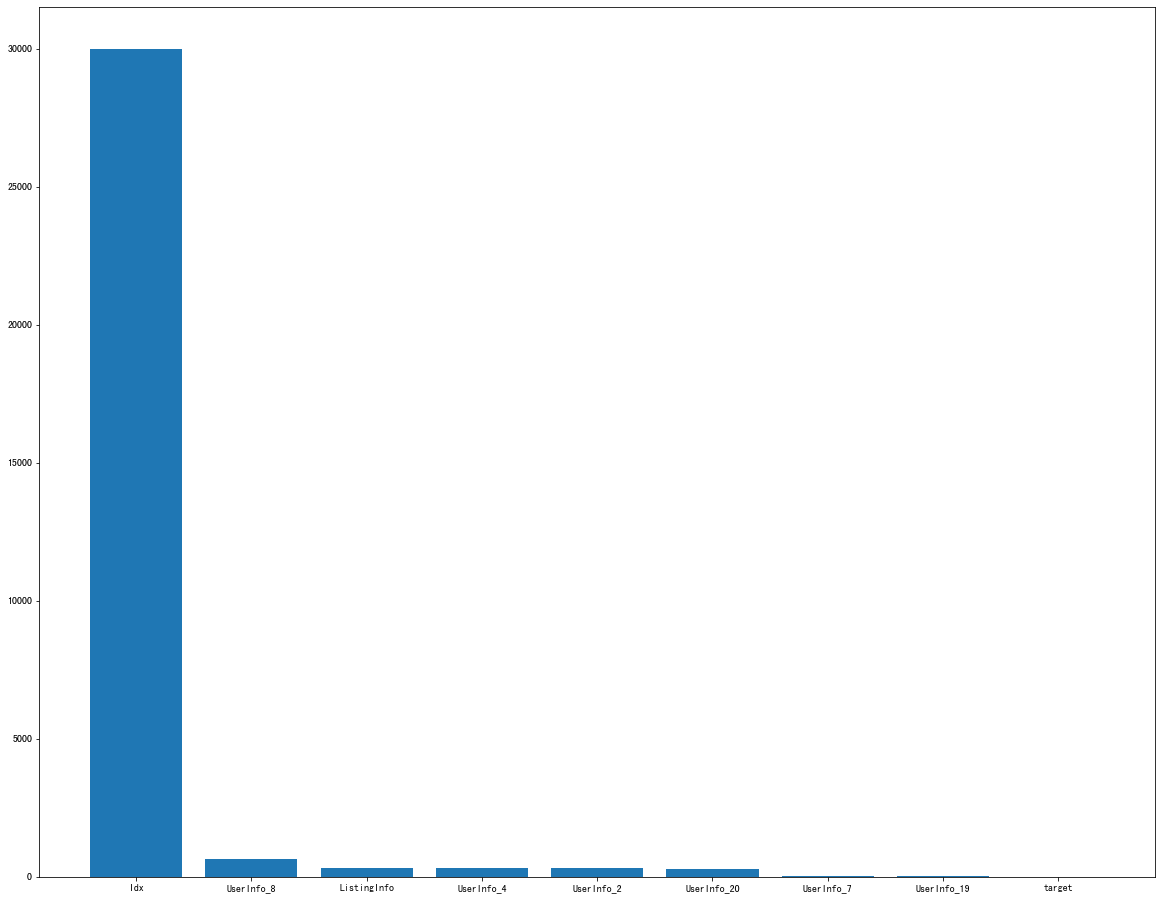

In [13]:
site=['Idx','UserInfo_2','UserInfo_4','UserInfo_7','UserInfo_8','UserInfo_19','UserInfo_20','target','ListingInfo']
site_dic = {}
for feature in site:
    site_dic[feature]=len(data[feature].unique())
# 创建Series，数据为category_dic内的每个特征的类别数量，索引为特征名称
df_site = pd.Series(site_dic, index=site)
# 对df_category进行降序排序
df_site.sort_values(axis=0, ascending=False, inplace=True)

# 通过bar_figure函数对ddf_category进行可视化
plt.figure(figsize=(20,16))
plt.bar(x=df_site.index,height=df_site)

<BarContainer object of 13 artists>

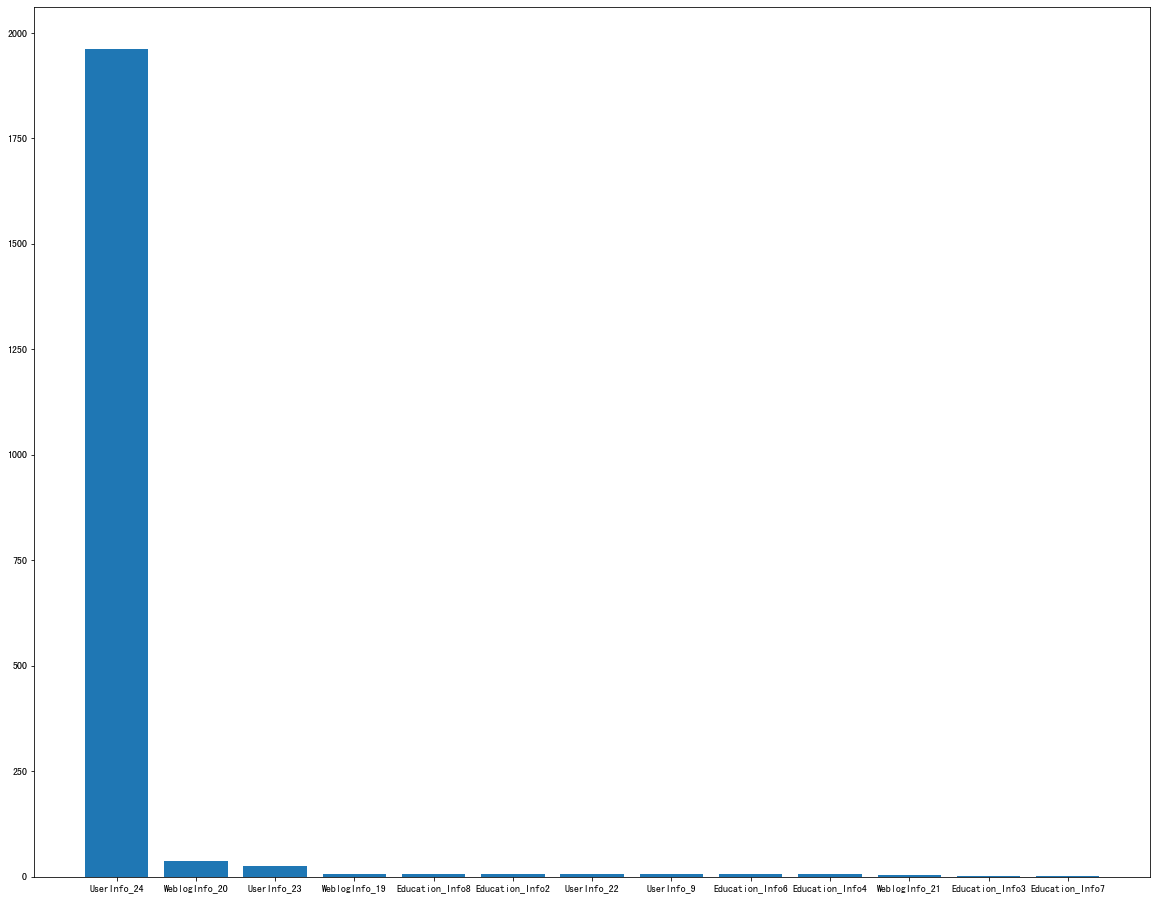

In [14]:
category_list=['UserInfo_9']
category_list.extend(combine('UserInfo_',22,24))
category_list.extend(combine('Education_Info',2,4))
category_list.extend(combine('Education_Info',6,8))
category_list.extend(combine('WeblogInfo_',19,21))
category_dic={}
for kind in category_list:
    category_dic[kind]=len(data[kind].unique())
    
df_category = pd.Series(category_dic, index=category_list)
df_category.sort_values(axis=0, ascending=False, inplace=True)

# 通过bar_figure函数对ddf_category进行可视化
plt.figure(figsize=(20,16))
plt.bar(x=df_category.index,height=df_category)

<BarContainer object of 204 artists>

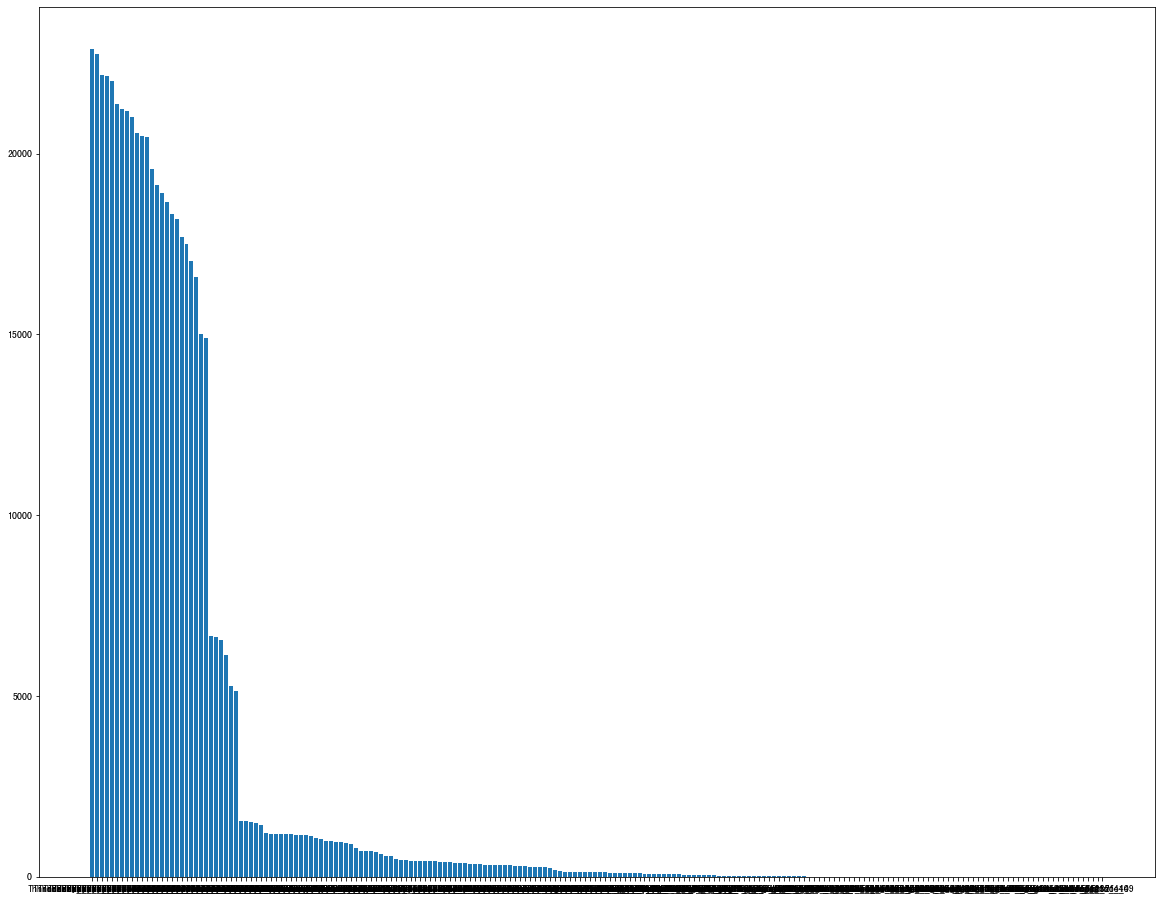

In [15]:
col_kind_list=[]
col_kind_list.extend(category_list)
col_kind_list.extend(site)
all_col=list(data.columns)
for num in col_kind_list:
    all_col.remove(num)
num_dic={}
for number in all_col:
    num_dic[number]=len(data[number].unique())
    
df_num = pd.Series(num_dic, index=all_col)
df_num.sort_values(axis=0, ascending=False, inplace=True)

# 通过bar_figure函数对ddf_category进行可视化
plt.figure(figsize=(20,16))
plt.bar(x=df_num.index,height=df_num)


In [16]:
print(len(data['Idx'].unique()))

30000


In [17]:
data.head()

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_2  \
0  10001       1.000         深圳       4.000         深圳         1.000   
1  10002       1.000         温州       4.000         温州         0.000   
2  10003       1.000         宜昌       3.000         宜昌         0.000   
3  10006       4.000         南平       1.000         南平         0.000   
4  10007       5.000         辽阳       1.000         辽阳         0.000   

   WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0         1.000         1.000         1.000            14             0   
1         1.000         1.000         1.000            14             0   
2         2.000         2.000         2.000             9             3   
3         0.000         0.000         0.000             2             0   
4         1.000         1.000         1.000             3             0   

   WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0              6              6              0              6              2   
1              0              0              7              7              0   
2              0              0              3              4              2   
3              0              0              0              2              0   
4              0              0              0              3              0   

   UserInfo_5  UserInfo_6 UserInfo_7 UserInfo_8 UserInfo_9  UserInfo_10  \
0           2           2         广东         深圳      中国移动             0   
1           2           2         浙江         温州      中国移动             1   
2           2           2         湖北         宜昌      中国电信             0   
3           2           2         福建         南平      中国移动             0   
4           2           2         辽宁         辽阳      中国移动             0   

   UserInfo_11  UserInfo_12  UserInfo_13  UserInfo_14  UserInfo_15  \
0        0.000        0.000        0.000            2            2   
1        0.000        0.000        1.000            3            3   
2        0.000        0.000        1.000            4            4   
3        0.000        0.000        1.000            2            2   
4        0.000        0.000        0.000            3            3   

   UserInfo_16  UserInfo_17  UserInfo_18 UserInfo_19 UserInfo_20  UserInfo_21  \
0            1            1           29         四川省         南充市            0   
1            2            2           28         福建省          不详            0   
2            2            1           32         湖北省         宜昌市            0   
3            1            1           33         江西省          不详            0   
4            1            1           43         辽宁省         锦州市            0   

  UserInfo_22 UserInfo_23 UserInfo_24  Education_Info1 Education_Info2  \
0           D           D           D                0               E   
1           D           D           D                0               E   
2           D           D           D                0               E   
3           D           D           D                0               E   
4           D           D           D                0               E   

  Education_Info3 Education_Info4  Education_Info5 Education_Info6  \
0               E               E                0               E   
1               E               E                0               E   
2               E               E                0               E   
3               E               E                0               E   
4          

In [18]:
city_transfer=['UserInfo_2','UserInfo_4','UserInfo_8','UserInfo_20']
for city in city_transfer:
    data[city]=data[city].str.replace('市','')
province_transfer=['UserInfo_19']
for pro in province_transfer:
    data[pro]=data[pro].str.replace('省','')
data.head()

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_2  \
0  10001       1.000         深圳       4.000         深圳         1.000   
1  10002       1.000         温州       4.000         温州         0.000   
2  10003       1.000         宜昌       3.000         宜昌         0.000   
3  10006       4.000         南平       1.000         南平         0.000   
4  10007       5.000         辽阳       1.000         辽阳         0.000   

   WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0         1.000         1.000         1.000            14             0   
1         1.000         1.000         1.000            14             0   
2         2.000         2.000         2.000             9             3   
3         0.000         0.000         0.000             2             0   
4         1.000         1.000         1.000             3             0   

   WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0              6              6              0              6              2   
1              0              0              7              7              0   
2              0              0              3              4              2   
3              0              0              0              2              0   
4              0              0              0              3              0   

   UserInfo_5  UserInfo_6 UserInfo_7 UserInfo_8 UserInfo_9  UserInfo_10  \
0           2           2         广东         深圳      中国移动             0   
1           2           2         浙江         温州      中国移动             1   
2           2           2         湖北         宜昌      中国电信             0   
3           2           2         福建         南平      中国移动             0   
4           2           2         辽宁         辽阳      中国移动             0   

   UserInfo_11  UserInfo_12  UserInfo_13  UserInfo_14  UserInfo_15  \
0        0.000        0.000        0.000            2            2   
1        0.000        0.000        1.000            3            3   
2        0.000        0.000        1.000            4            4   
3        0.000        0.000        1.000            2            2   
4        0.000        0.000        0.000            3            3   

   UserInfo_16  UserInfo_17  UserInfo_18 UserInfo_19 UserInfo_20  UserInfo_21  \
0            1            1           29          四川          南充            0   
1            2            2           28          福建          不详            0   
2            2            1           32          湖北          宜昌            0   
3            1            1           33          江西          不详            0   
4            1            1           43          辽宁          锦州            0   

  UserInfo_22 UserInfo_23 UserInfo_24  Education_Info1 Education_Info2  \
0           D           D           D                0               E   
1           D           D           D                0               E   
2           D           D           D                0               E   
3           D           D           D                0               E   
4           D           D           D                0               E   

  Education_Info3 Education_Info4  Education_Info5 Education_Info6  \
0               E               E                0               E   
1               E               E                0               E   
2               E               E                0               E   
3               E               E                0               E   
4          

In [19]:
data['UserInfo_19'] = data['UserInfo_19'].str.replace('广西壮族自治区','广西')
data['UserInfo_19'] = data['UserInfo_19'].str.replace('西藏自治区','西藏')
data['UserInfo_19'] = data['UserInfo_19'].str.replace('内蒙古自治区','内蒙古')
data['UserInfo_19'] = data['UserInfo_19'].str.replace('宁夏回族自治区','宁夏')
data['UserInfo_19'] = data['UserInfo_19'].str.replace('新疆维吾尔自治区','新疆')

In [20]:
data.head(16)

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_2  \
0   10001       1.000         深圳       4.000         深圳         1.000   
1   10002       1.000         温州       4.000         温州         0.000   
2   10003       1.000         宜昌       3.000         宜昌         0.000   
3   10006       4.000         南平       1.000         南平         0.000   
4   10007       5.000         辽阳       1.000         辽阳         0.000   
5   10008       1.000         吴忠       5.000         银川         0.000   
6   10011       1.000         绵阳       3.000         赤峰         0.000   
7   10015       4.000         东莞       5.000         东莞         0.000   
8   10019       1.000         赤峰       6.000         赤峰         0.000   
9   10021       3.000         武汉       5.000         鄂州         0.000   
10  10022       5.000         武汉       5.000         武汉         0.000   
11  10024       5.000         长沙       5.000         长沙         1.000   
12  10026       3.000         漳州       3.000         漳州         1.000   
13  10027       3.000        牡丹江       6.000        牡丹江         0.000   
14  10031       1.000         太原       3.000         太原         0.000   
15  10032       1.000         北京       6.000         北京         0.000   

    WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0          1.000         1.000         1.000            14             0   
1          1.000         1.000         1.000            14             0   
2          2.000         2.000         2.000             9             3   
3          0.000         0.000         0.000             2             0   
4          1.000         1.000         1.000             3             0   
5          2.000         2.000         2.000             4             0   
6         13.000         1.000        13.000            15             0   
7         12.000         6.000        12.000             8             0   
8         10.000         6.000        10.000            19             0   
9          1.000         1.000         1.000             6             0   
10         3.000         2.000         3.000            11             0   
11         1.000         1.000         1.000             4             0   
12        11.000         3.000        11.000            31             0   
13         1.000         1.000         1.000             4             0   
14         3.000         1.000         3.000             9             0   
15         2.000         2.000         1.000             7             0   

    WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   
5              0              0              0              0              0   
6              0              0              0              0              0   
7              0              0              0              0              0   
8              0              0              0              0              1   
9              0              0              0              0              0   
10             0              0              0              0              0   
11             0              0              0              0              0   
12             0              0              0              0              0   
13             0              0              0              0              0   
14             0              0              0              0              0   
15             0              0              0              0              0   

    WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0               6            

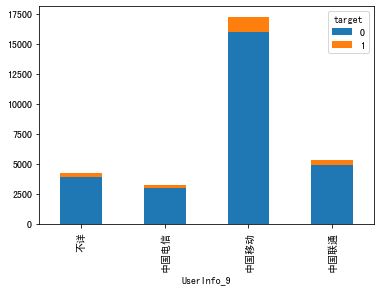

In [21]:
# 设置画图样式
# matplotlib.style.use('ggplot')
#     # 指定默认字体 SimHei为黑体
# plt.rcParams["font.sans-serif"]=["SimHei"]
#     # 正常显示负号
# plt.rcParams["axes.unicode_minus"]=False
data['UserInfo_9']=data['UserInfo_9'].str.replace(' ','')
userinfo9=data.groupby('UserInfo_9')['target'].value_counts().unstack().plot(kind='bar',stacked='True') 


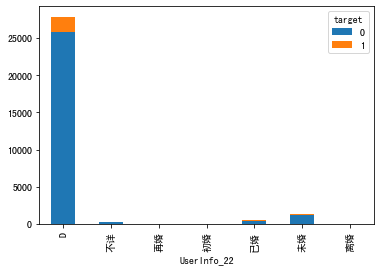

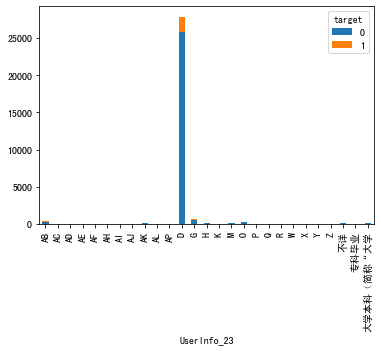

In [22]:
userInfo=['UserInfo_22','UserInfo_23']
def preportion(userinfoList,fname):
    for item in userinfoList:
        name=item.split('_')[1]
        feature_name=fname+name
#         print(feature_name)
        feature_name=data.groupby(item)['target'].value_counts().unstack().plot(kind='bar',stacked='True')
preportion(userinfoList=userInfo,fname='UserInfo_')

In [23]:
userinfo=['UserInfo_24']
uinfo24=data.groupby(by='UserInfo_24')['target'].value_counts().unstack()
# print(len(data['UserInfo_24'].unique()))
# print(uinfo24.head(15))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


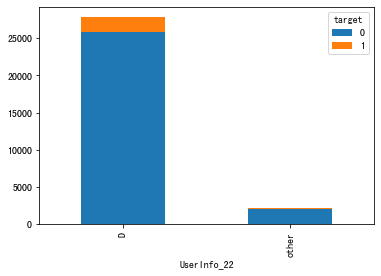

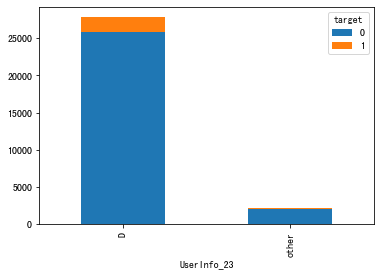

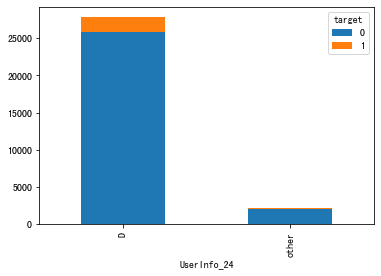

In [24]:
data['UserInfo_22']=np.where(data['UserInfo_22']=='D','D','other')
userinfo22=data.groupby('UserInfo_22')['target'].value_counts().unstack()
print(userinfo22.plot(kind='bar',stacked='True'))

data['UserInfo_23']=np.where(data['UserInfo_23']=='D','D','other')
userinfo23=data.groupby('UserInfo_23')['target'].value_counts().unstack()
print(userinfo23.plot(kind='bar',stacked='True'))

data['UserInfo_24']=np.where(data['UserInfo_24']=='D','D','other')
userinfo24=data.groupby('UserInfo_24')['target'].value_counts().unstack()
print(userinfo24.plot(kind='bar',stacked='True'))

UserInfo_7
不详    336.000
广东    287.000
山东    228.000
江苏    140.000
浙江    115.000
四川    109.000
福建    105.000
湖南    102.000
河南     84.000
湖北     84.000
河北     71.000
安徽     68.000
辽宁     48.000
山西     47.000
江西     46.000
广西     43.000
重庆     34.000
陕西     33.000
北京     32.000
黑龙江    30.000
吉林     25.000
贵州     25.000
云南     21.000
天津     20.000
内蒙古    19.000
海南     15.000
甘肃     15.000
宁夏      8.000
新疆      3.000
上海      3.000
青海      2.000
西藏        nan
Name: 1, dtype: float64


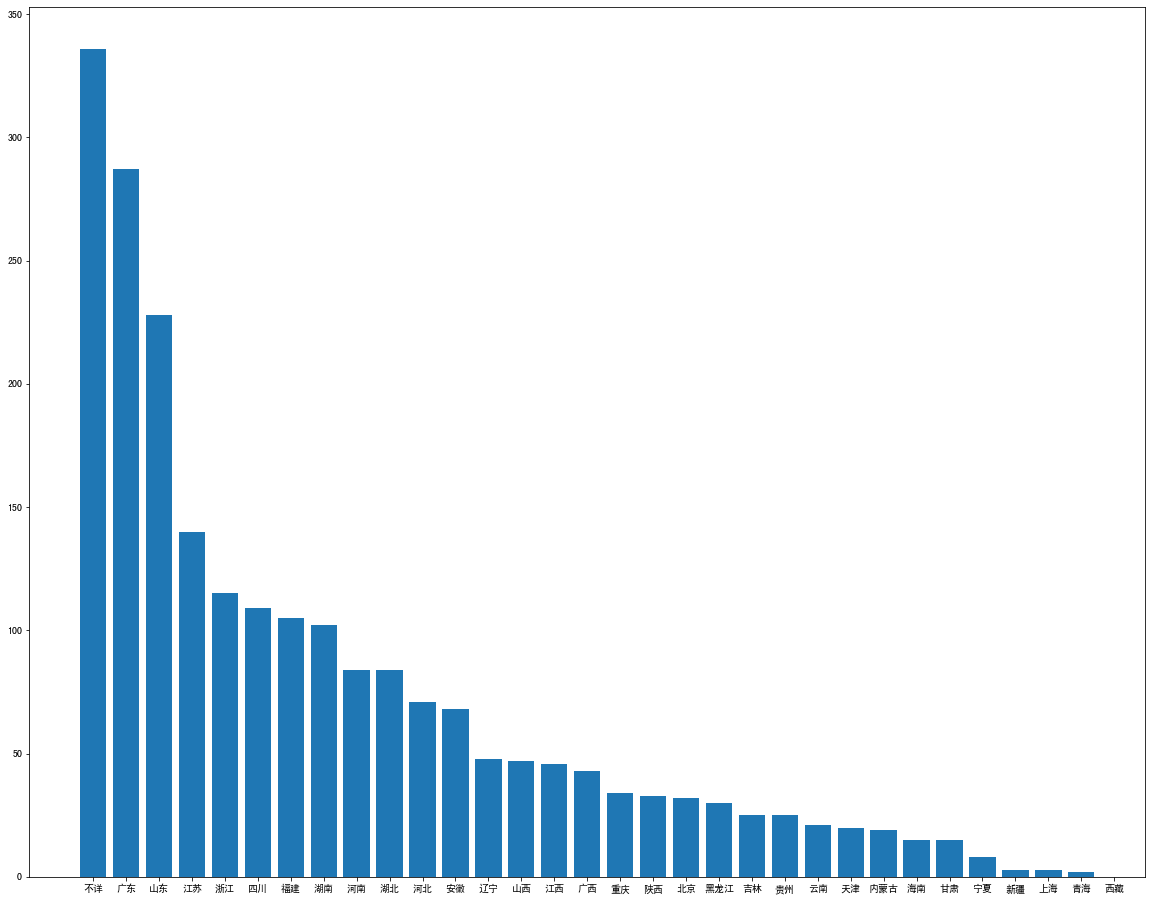

In [25]:
userinfo7=data.groupby('UserInfo_7')['target'].value_counts().unstack()
# print(userinfo7)
userinfo7_sort=userinfo7[1].sort_values(ascending=False)
print(userinfo7_sort)
plt.figure(figsize=(20,16))
plt.bar(x=userinfo7_sort.index,height=userinfo7_sort.values)

data['UserInfo_7_unknown']=np.where(data['UserInfo_7']=='不详',1,0)
data['UserInfo_7_gd']=np.where(data['UserInfo_7']=='广东',1,0)
data['UserInfo_7_sd']=np.where(data['UserInfo_7']=='山东',1,0)
data['UserInfo_7_js']=np.where(data['UserInfo_7']=='江苏',1,0)
data['UserInfo_7_zj']=np.where(data['UserInfo_7']=='浙江',1,0)
data['UserInfo_7_sc']=np.where(data['UserInfo_7']=='四川',1,0)
data['UserInfo_7_fj']=np.where(data['UserInfo_7']=='福建',1,0)
data['UserInfo_7_hn']=np.where(data['UserInfo_7']=='湖南',1,0)

UserInfo_19
山东    258.000
广东    162.000
四川    157.000
湖南    150.000
江苏    145.000
湖北    132.000
河南    128.000
安徽    112.000
福建    110.000
河北     96.000
浙江     87.000
江西     77.000
黑龙江    73.000
广西     64.000
辽宁     59.000
山西     57.000
陕西     50.000
吉林     47.000
贵州     45.000
云南     34.000
重庆市    29.000
甘肃     29.000
内蒙古    28.000
天津市    17.000
上海市    14.000
海南     13.000
宁夏      9.000
新疆      7.000
北京市     6.000
青海      3.000
西藏        nan
Name: 1, dtype: float64


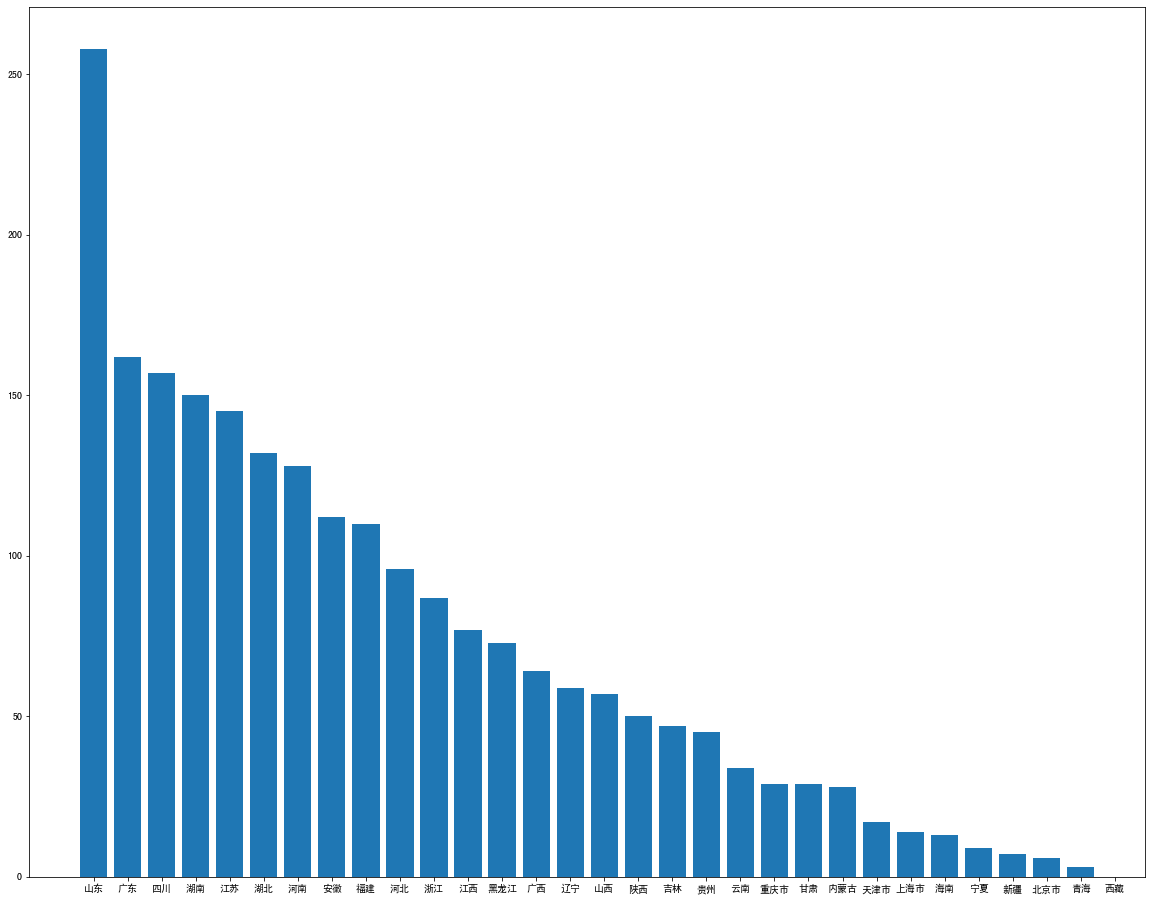

In [26]:
userinfo19=data.groupby('UserInfo_19')['target'].value_counts().unstack()
# print(userinfo19)
userinfo19_sort=userinfo19[1].sort_values(ascending=False)
print(userinfo19_sort)
plt.figure(figsize=(20,16))
plt.bar(x=userinfo19_sort.index,height=userinfo19_sort.values)

data['UserInfo_19_sd']=np.where(data['UserInfo_19']=='山东',1,0)
data['UserInfo_19_gd']=np.where(data['UserInfo_19']=='广东',1,0)
data['UserInfo_19_sc']=np.where(data['UserInfo_19']=='四川',1,0)
data['UserInfo_19_hn']=np.where(data['UserInfo_19']=='湖南',1,0)
data['UserInfo_19_js']=np.where(data['UserInfo_19']=='江苏',1,0)
data['UserInfo_19_hb']=np.where(data['UserInfo_19']=='湖北',1,0)
data['UserInfo_19_hn']=np.where(data['UserInfo_19']=='河南',1,0)
data['UserInfo_19_ah']=np.where(data['UserInfo_19']=='安徽',1,0)
data['UserInfo_19_fj']=np.where(data['UserInfo_19']=='福建',1,0)

In [27]:
data.head()

Idx  UserInfo_1 UserInfo_2  UserInfo_3 UserInfo_4  WeblogInfo_2  \
0  10001       1.000         深圳       4.000         深圳         1.000   
1  10002       1.000         温州       4.000         温州         0.000   
2  10003       1.000         宜昌       3.000         宜昌         0.000   
3  10006       4.000         南平       1.000         南平         0.000   
4  10007       5.000         辽阳       1.000         辽阳         0.000   

   WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0         1.000         1.000         1.000            14             0   
1         1.000         1.000         1.000            14             0   
2         2.000         2.000         2.000             9             3   
3         0.000         0.000         0.000             2             0   
4         1.000         1.000         1.000             3             0   

   WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0              6              6              0              6              2   
1              0              0              7              7              0   
2              0              0              3              4              2   
3              0              0              0              2              0   
4              0              0              0              3              0   

   UserInfo_5  UserInfo_6 UserInfo_7 UserInfo_8 UserInfo_9  UserInfo_10  \
0           2           2         广东         深圳       中国移动            0   
1           2           2         浙江         温州       中国移动            1   
2           2           2         湖北         宜昌       中国电信            0   
3           2           2         福建         南平       中国移动            0   
4           2           2         辽宁         辽阳       中国移动            0   

   UserInfo_11  UserInfo_12  UserInfo_13  UserInfo_14  UserInfo_15  \
0        0.000        0.000        0.000            2            2   
1        0.000        0.000        1.000            3            3   
2        0.000        0.000        1.000            4            4   
3        0.000        0.000        1.000            2            2   
4        0.000        0.000        0.000            3            3   

   UserInfo_16  UserInfo_17  UserInfo_18 UserInfo_19 UserInfo_20  UserInfo_21  \
0            1            1           29          四川          南充            0   
1            2            2           28          福建          不详            0   
2            2            1           32          湖北          宜昌            0   
3            1            1           33          江西          不详            0   
4            1            1           43          辽宁          锦州            0   

  UserInfo_22 UserInfo_23 UserInfo_24  Education_Info1 Education_Info2  \
0           D           D           D                0               E   
1           D           D           D                0               E   
2           D           D           D                0               E   
3           D           D           D                0               E   
4           D           D           D                0               E   

  Education_Info3 Education_Info4  Education_Info5 Education_Info6  \
0               E               E                0               E   
1               E               E                0               E   
2               E               E                0               E   
3               E               E                0               E   
4          

In [28]:
data['UserInfo_2_4']=np.where(data['UserInfo_2']==data['UserInfo_4'],0,1)
data['UserInfo_2_8']=np.where(data['UserInfo_2']==data['UserInfo_8'],0,1)
data['UserInfo_2_20']=np.where(data['UserInfo_2']==data['UserInfo_20'],0,1)
data['UserInfo_4_8']=np.where(data['UserInfo_4']==data['UserInfo_8'],0,1)
data['UserInfo_4_20']=np.where(data['UserInfo_4']==data['UserInfo_20'],0,1)
data['UserInfo_8_20']=np.where(data['UserInfo_8']==data['UserInfo_20'],0,1)
data['UserInfo_7_19']=np.where(data['UserInfo_7']==data['UserInfo_19'],0,1)

In [29]:
city_level_dic={}
file_level=open('/Users/fireyr/Documents/tanxin/作业解答/中国城市等级.txt',encoding='UTF-8')
for line in file_level.readlines()[1:]:
    line=line.strip('\n')
    city=line.split('\t')[0].replace('市','')
    city=city.replace('地区','')
    level=line.split('\t')[1]
    city_level_dic[city]=level
new_feature_list=[]
for feature in city_transfer:
    new_feature=feature+'_level'
    data[new_feature]=data[feature].map(city_level_dic)
    data[new_feature]=np.where(data[new_feature].isnull(),'5',data[new_feature])
    new_feature_list.append(new_feature)
print(new_feature_list)
#     new_feature_list.append(userinfo_num)
    

['UserInfo_2_level', 'UserInfo_4_level', 'UserInfo_8_level', 'UserInfo_20_level']


target               0     1   sum
UserInfo_2_level                  
0                0.082 0.005  2637
1                0.139 0.012  4542
2                0.181 0.014  5850
3                0.229 0.019  7451
4                0.173 0.014  5621
5                0.122 0.008  3899


<Figure size 2880x2160 with 0 Axes>

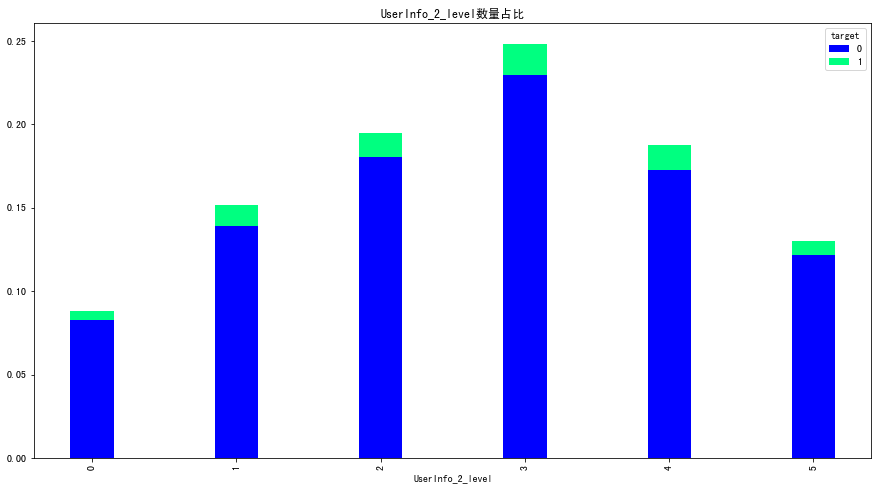

<Figure size 2880x2160 with 0 Axes>

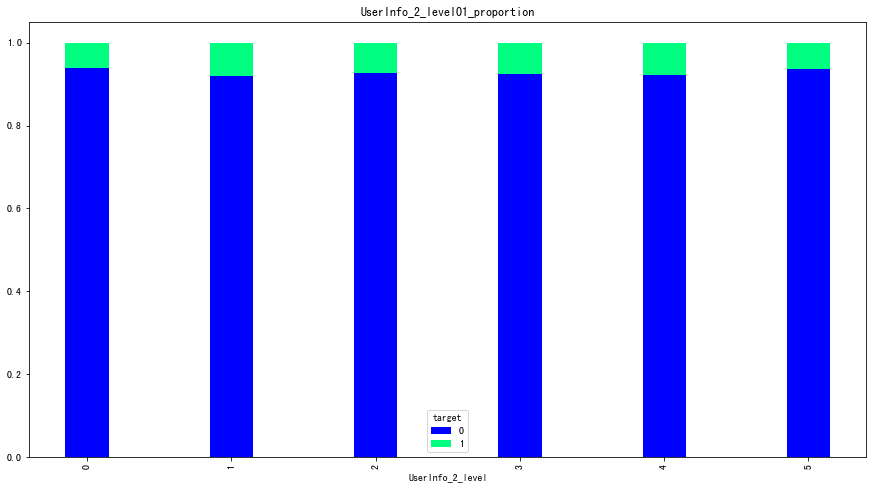

target               0     1   sum
UserInfo_4_level                  
0                0.094 0.006  3008
1                0.151 0.013  4945
2                0.186 0.015  6022
3                0.220 0.018  7130
4                0.164 0.014  5318
5                0.112 0.007  3577


<Figure size 2880x2160 with 0 Axes>

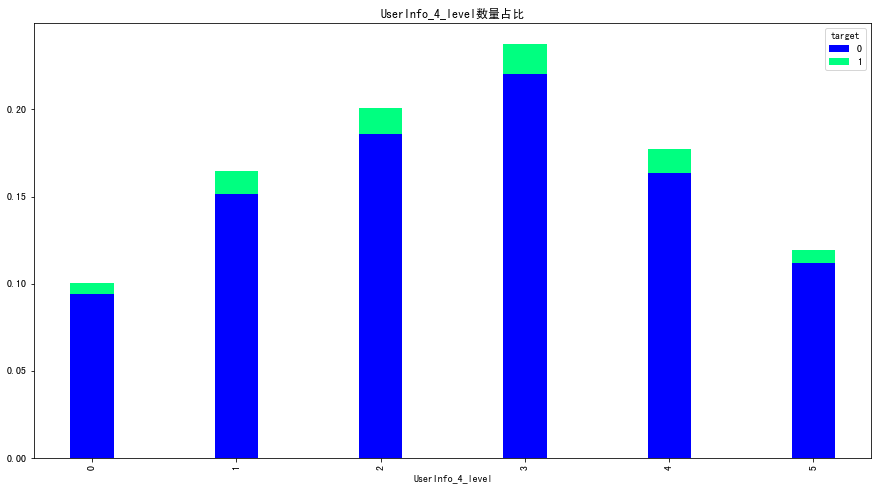

<Figure size 2880x2160 with 0 Axes>

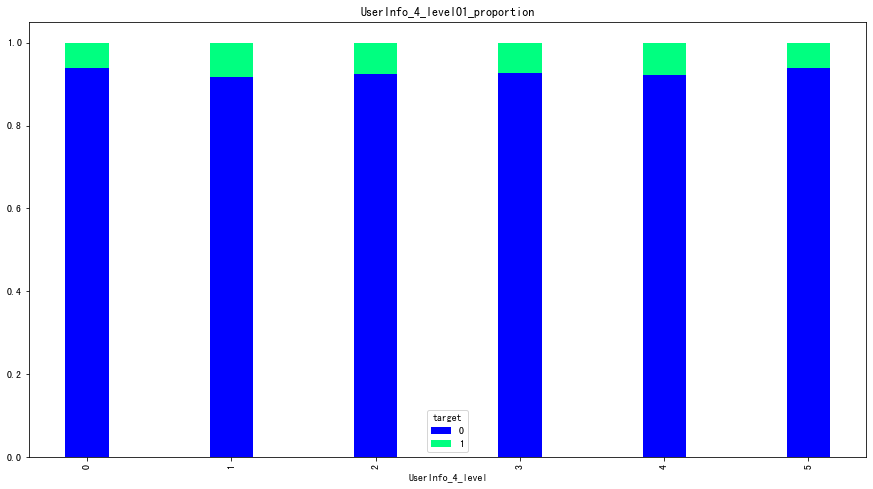

target               0     1   sum
UserInfo_8_level                  
0                0.072 0.005  2300
1                0.140 0.012  4539
2                0.173 0.014  5603
3                0.190 0.015  6146
4                0.132 0.012  4296
5                0.091 0.006  2903
6                0.129 0.011  4213


<Figure size 2880x2160 with 0 Axes>

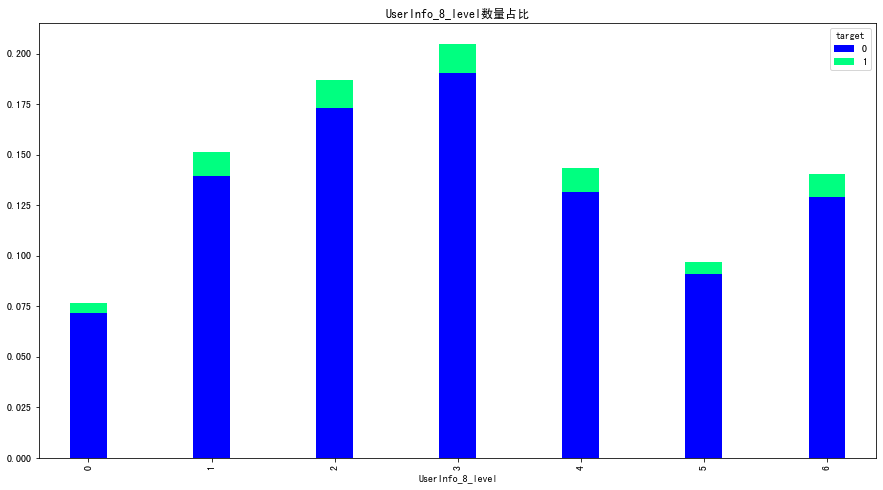

<Figure size 2880x2160 with 0 Axes>

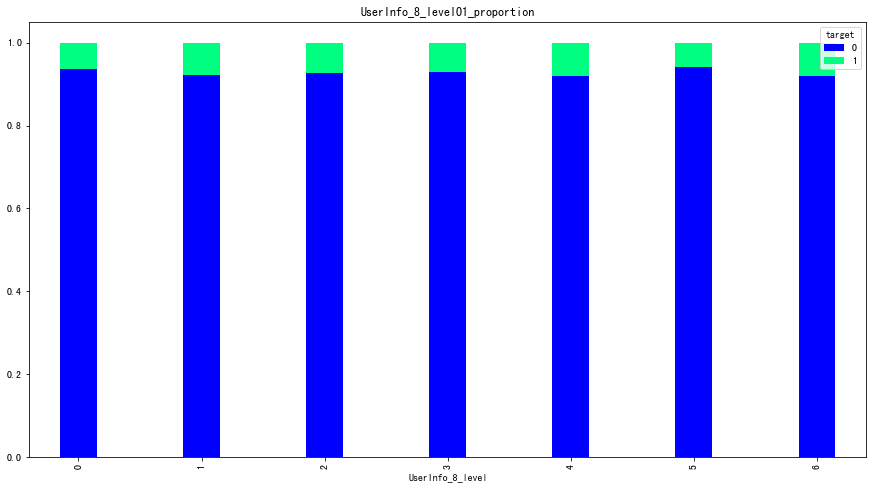

target                0     1   sum
UserInfo_20_level                  
0                 0.011 0.001   347
1                 0.052 0.005  1709
2                 0.119 0.010  3857
3                 0.252 0.021  8163
4                 0.165 0.014  5374
5                 0.105 0.008  3377
6                 0.223 0.016  7173


<Figure size 2880x2160 with 0 Axes>

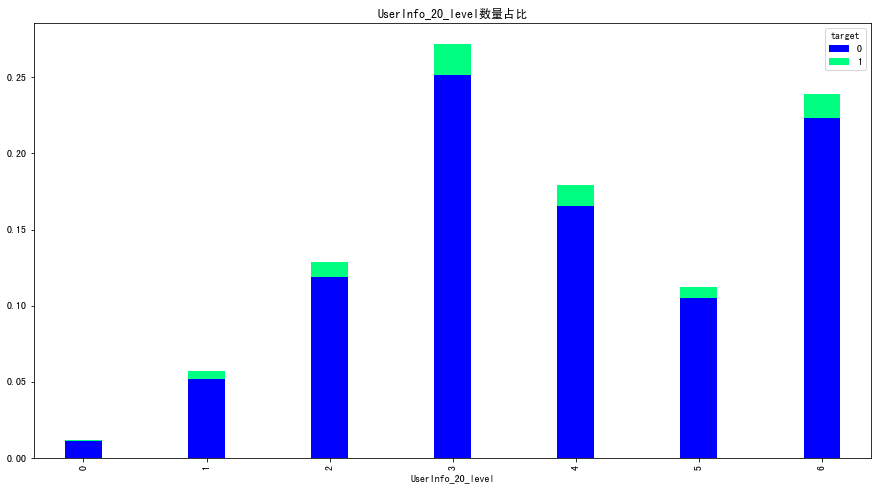

<Figure size 2880x2160 with 0 Axes>

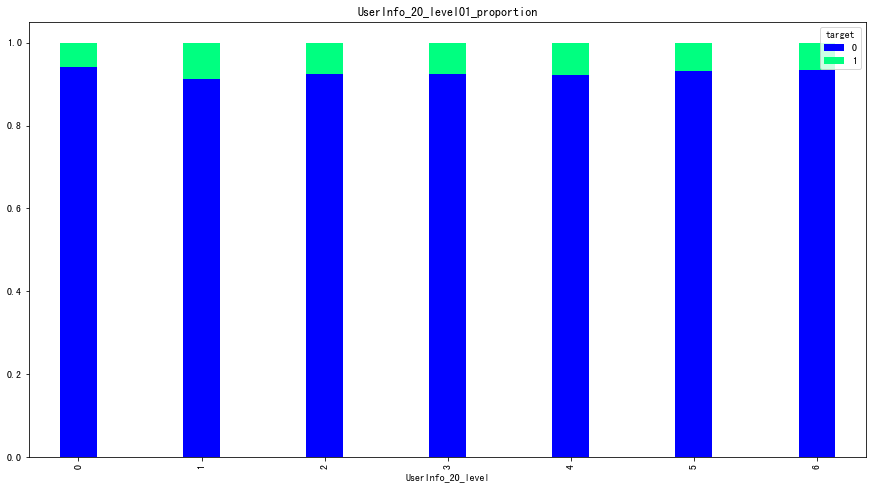

In [30]:
handle_list(plot_data=new_feature_list,title='01_proportion')

In [31]:
userinfo_category_list = ['UserInfo_2', 'UserInfo_4']
userinfo_category_list.extend(combine('UserInfo_', 7, 9))
userinfo_category_list.extend(combine('UserInfo_', 19, 20))
userinfo_category_list.extend(combine('UserInfo_', 22, 24))

# 2、将所有数值型特征名称存入userinfo_numerical_list
# 创建userinfo_numerical_list列表，用来存储UserInfo的数值型特征
userinfo_numerical_list = ['UserInfo_1', 'UserInfo_3', 'UserInfo_10', 'UserInfo_21']
userinfo_numerical_list.extend(combine('UserInfo_', 5, 6))
# 利用feature_list函数生成UserInfo_14-UserInfo_18这5个特征名称，并将结果合并入存入userinfo_numerical_list
userinfo_numerical_list.extend(combine('UserInfo_', 11, 13))
userinfo_numerical_list.extend(combine('UserInfo_', 14, 18))

target         0     1       sum
UserInfo_1                      
0.000      0.000   nan       nan
1.000      0.314 0.019 10013.000
2.000      0.003 0.000   106.000
3.000      0.183 0.017  5991.000
4.000      0.150 0.013  4867.000
5.000      0.180 0.016  5875.000
6.000      0.075 0.007  2450.000
7.000      0.021 0.002   691.000


<Figure size 2880x2160 with 0 Axes>

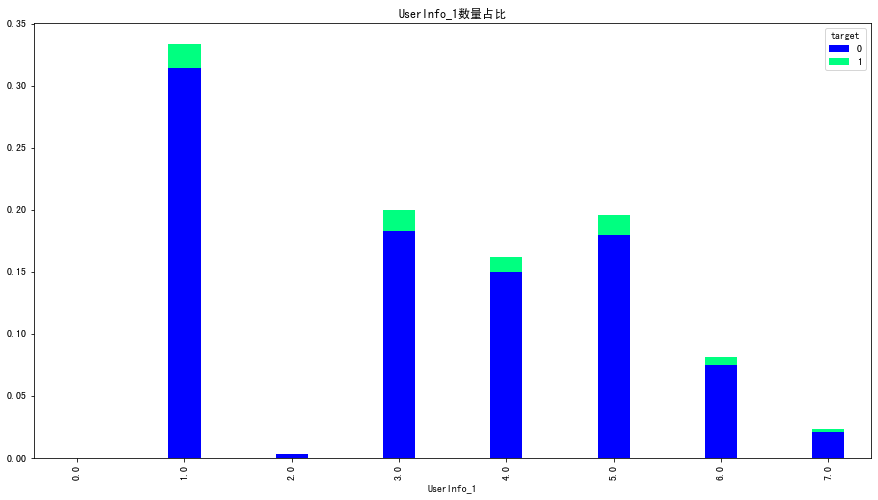

<Figure size 2880x2160 with 0 Axes>

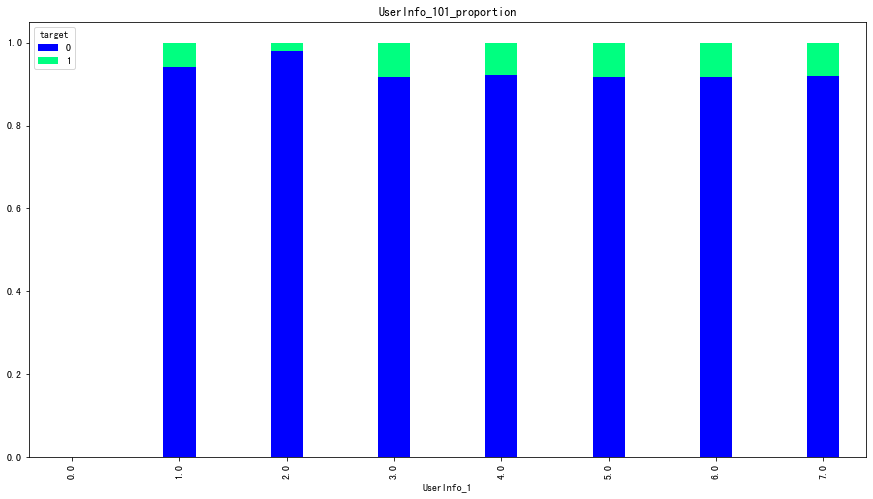

target         0     1       sum
UserInfo_3                      
0.000      0.000   nan       nan
1.000      0.052 0.004  1706.000
2.000      0.004 0.000   134.000
3.000      0.094 0.006  3001.000
4.000      0.130 0.009  4172.000
5.000      0.425 0.037 13860.000
6.000      0.186 0.014  6001.000
7.000      0.035 0.002  1118.000


<Figure size 2880x2160 with 0 Axes>

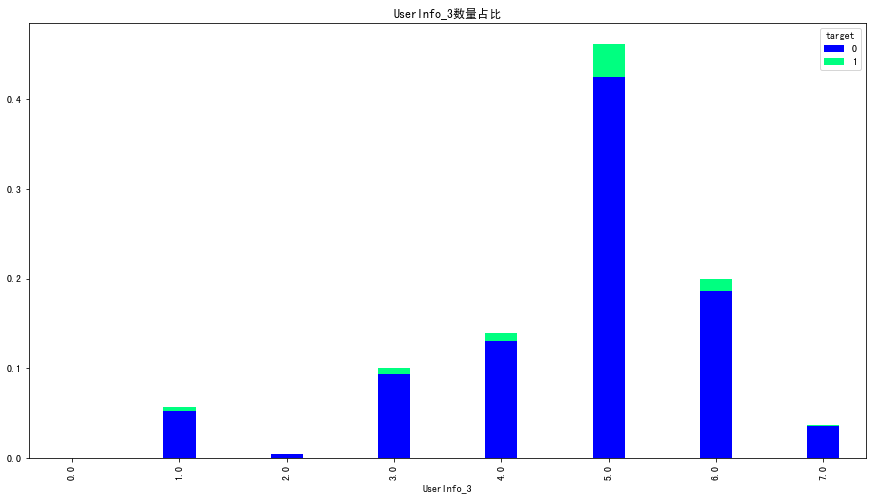

<Figure size 2880x2160 with 0 Axes>

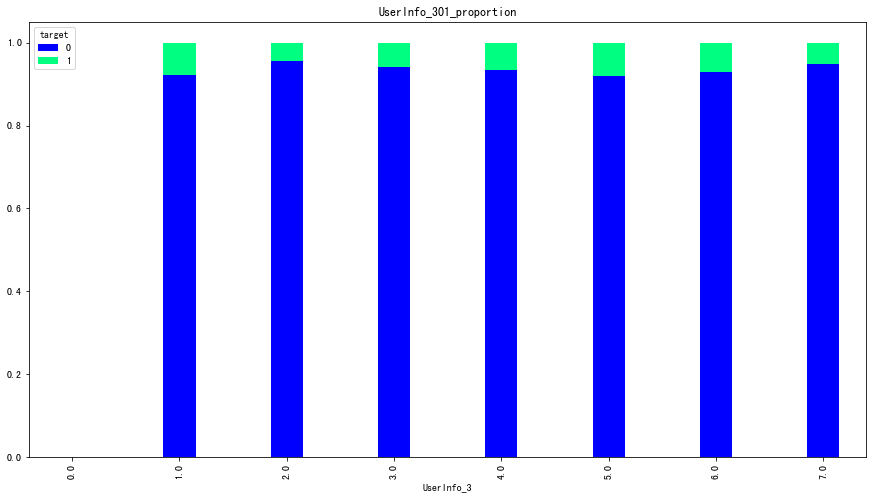

target          0     1    sum
UserInfo_10                   
0           0.706 0.057  22902
1           0.152 0.010   4851
2           0.069 0.006   2247


<Figure size 2880x2160 with 0 Axes>

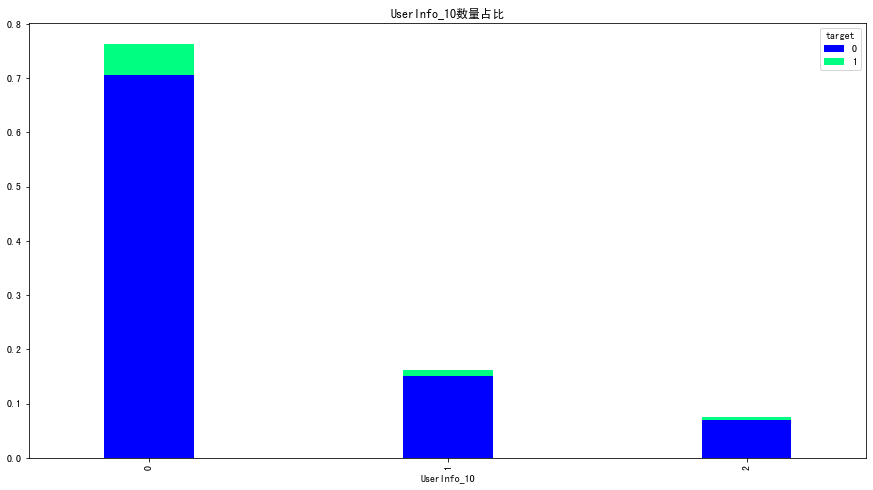

<Figure size 2880x2160 with 0 Axes>

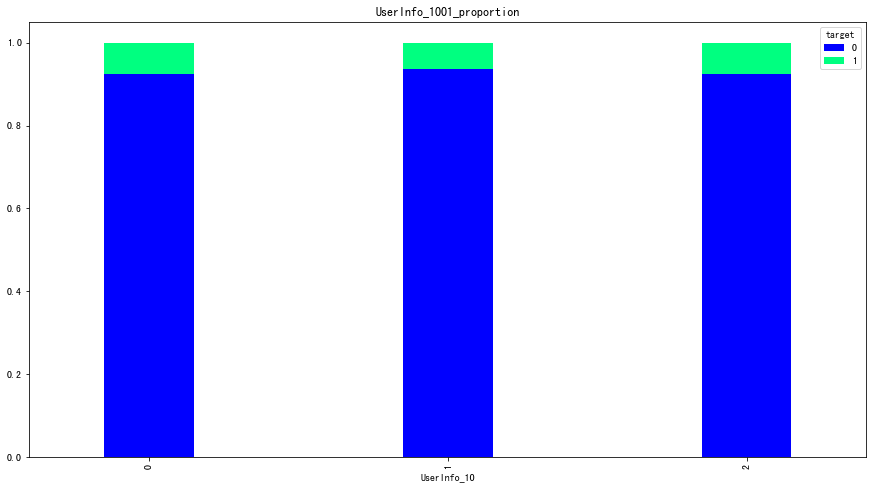

target          0     1    sum
UserInfo_21                   
0           0.860 0.069  27867
1           0.067 0.004   2133


<Figure size 2880x2160 with 0 Axes>

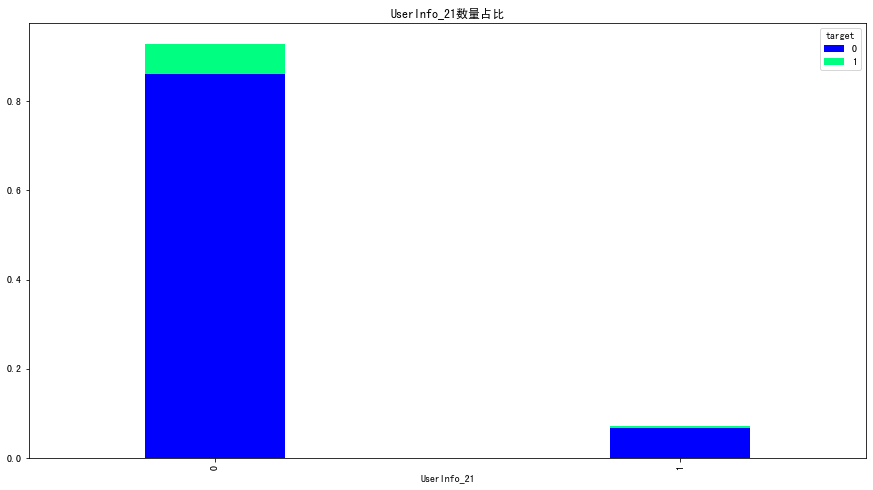

<Figure size 2880x2160 with 0 Axes>

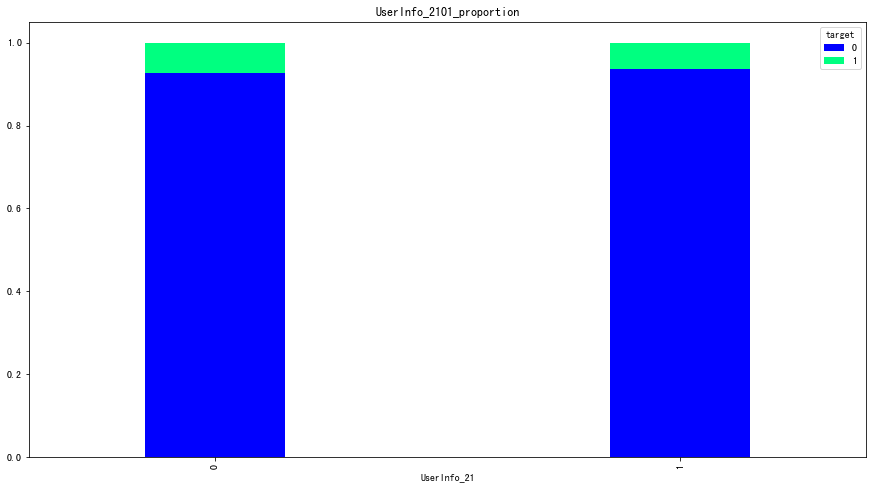

target         0     1    sum
UserInfo_5                   
1          0.373 0.031  12123
2          0.501 0.037  16141
3          0.052 0.006   1736


<Figure size 2880x2160 with 0 Axes>

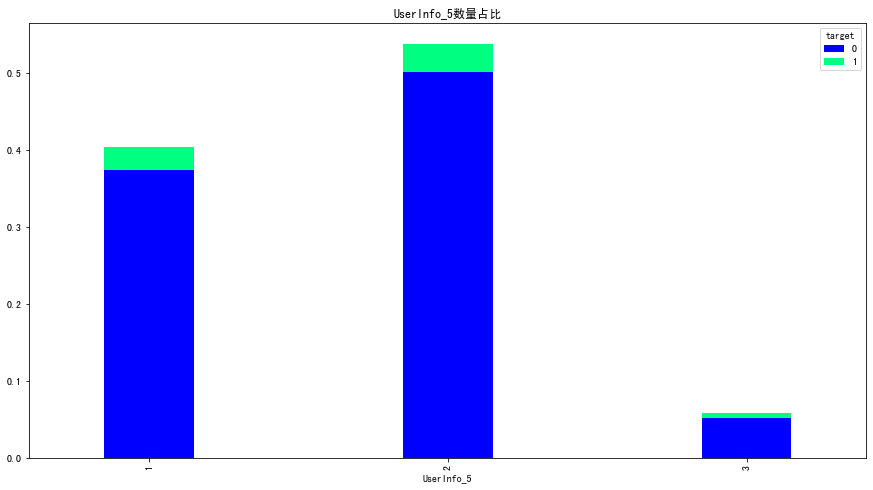

<Figure size 2880x2160 with 0 Axes>

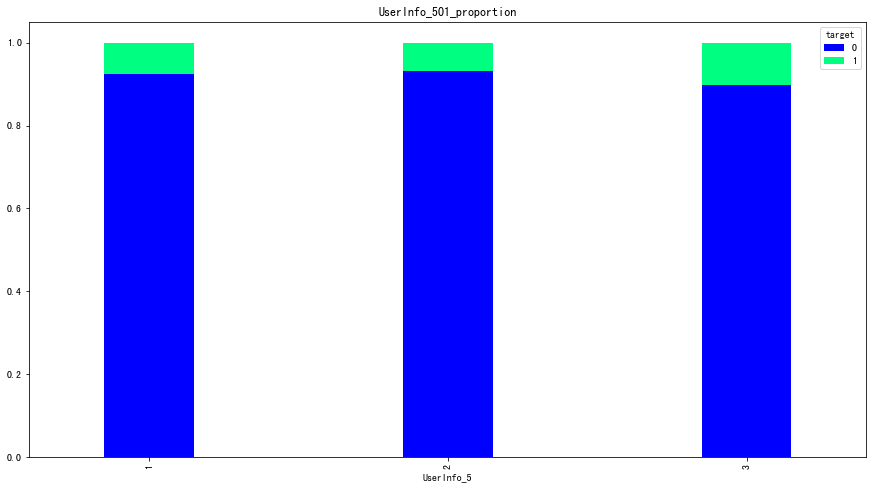

target         0     1    sum
UserInfo_6                   
1          0.373 0.030  12097
2          0.503 0.037  16184
3          0.051 0.006   1719


<Figure size 2880x2160 with 0 Axes>

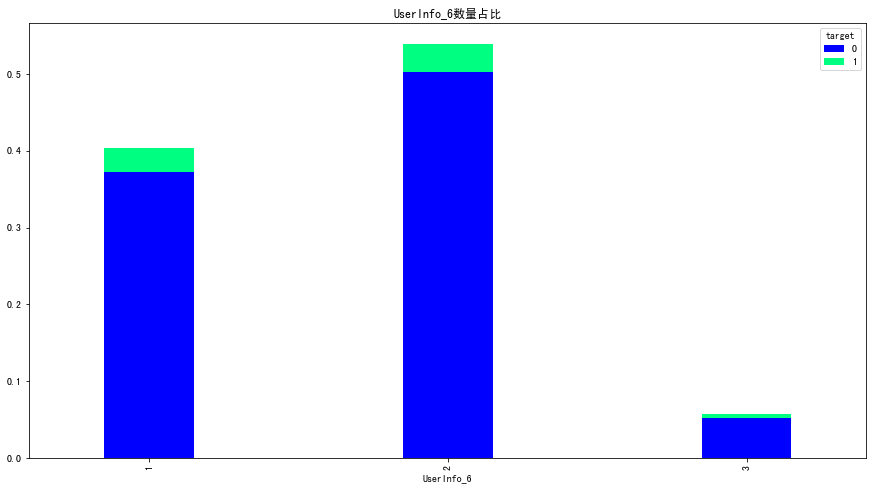

<Figure size 2880x2160 with 0 Axes>

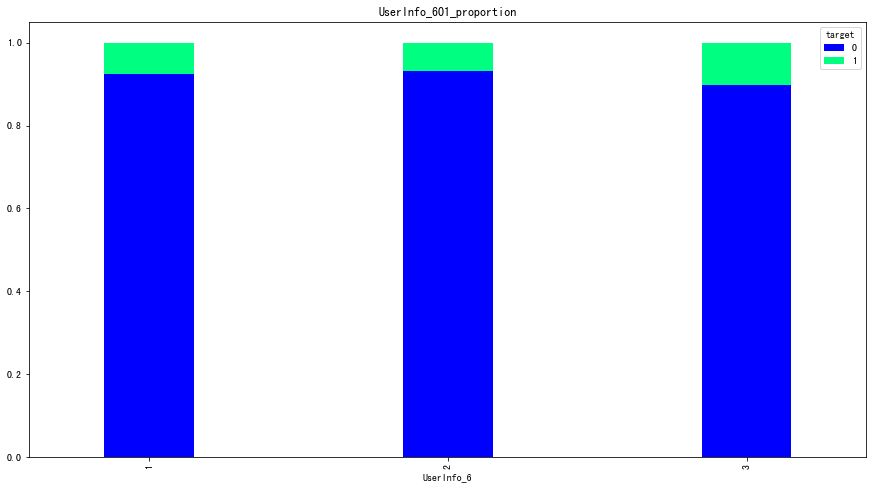

target          0     1    sum
UserInfo_11                   
0.000       0.896 0.071  29000
1.000       0.031 0.002   1000


<Figure size 2880x2160 with 0 Axes>

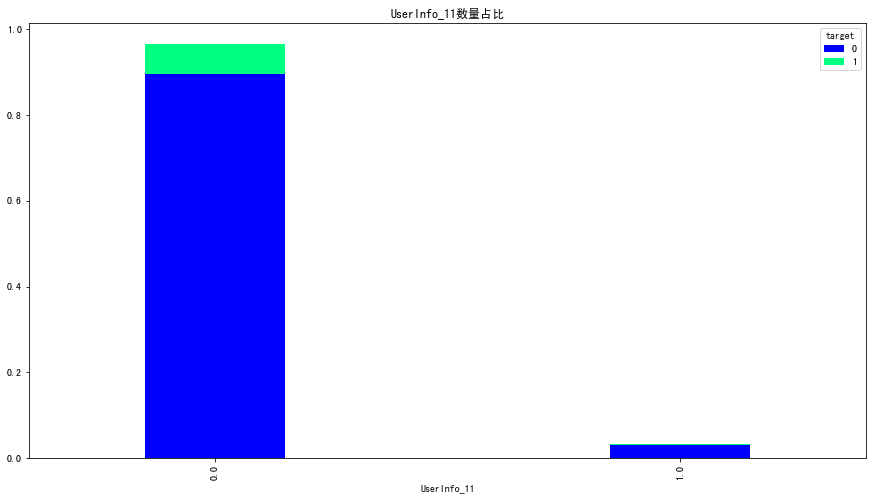

<Figure size 2880x2160 with 0 Axes>

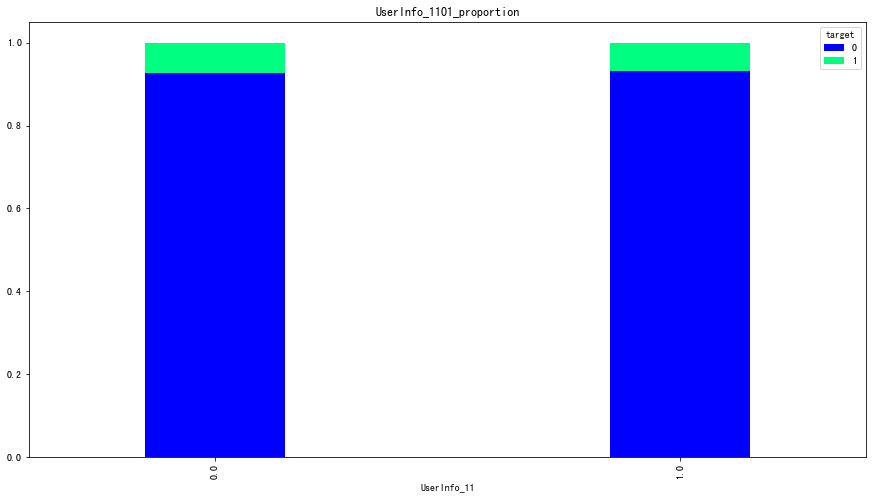

target          0     1    sum
UserInfo_12                   
0.000       0.804 0.066  26096
1.000       0.123 0.008   3904


<Figure size 2880x2160 with 0 Axes>

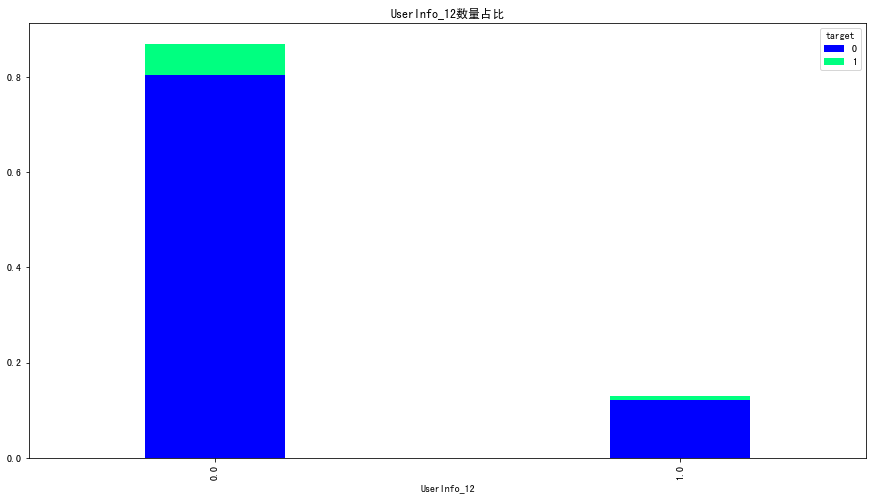

<Figure size 2880x2160 with 0 Axes>

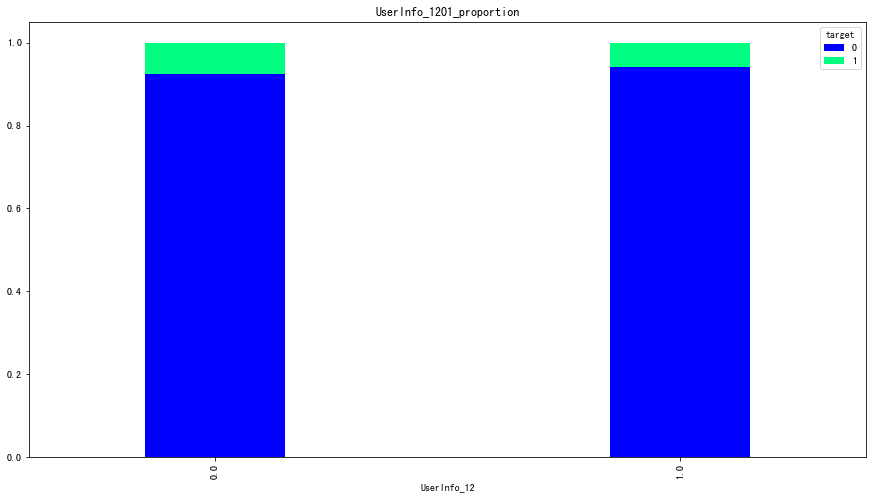

target          0     1    sum
UserInfo_13                   
0.000       0.703 0.059  22862
1.000       0.224 0.014   7138


<Figure size 2880x2160 with 0 Axes>

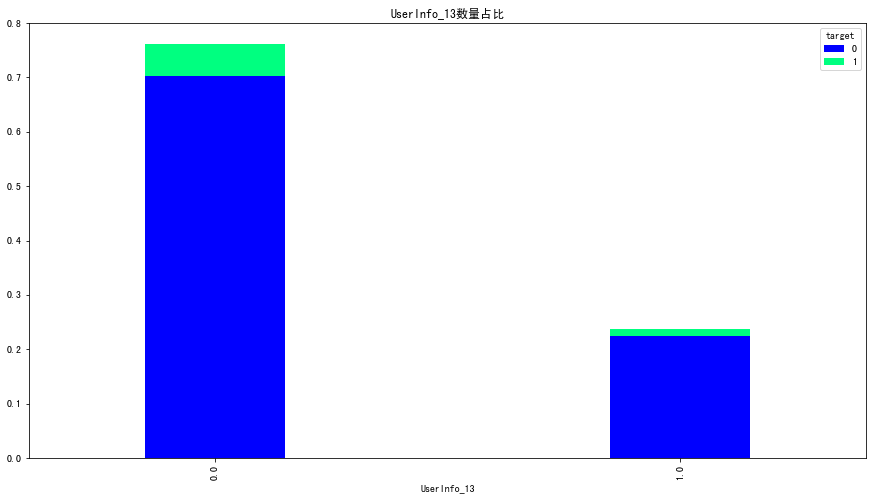

<Figure size 2880x2160 with 0 Axes>

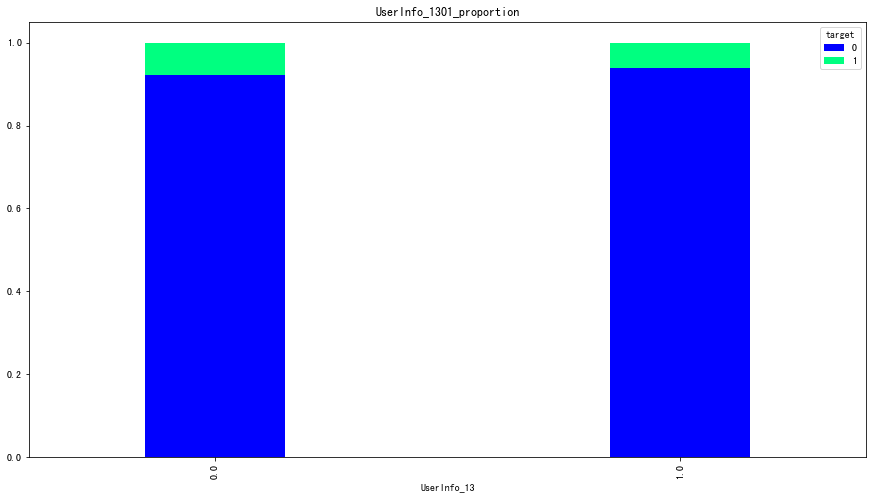

target          0     1    sum
UserInfo_14                   
0           0.007 0.001    246
1           0.009 0.000    275
2           0.185 0.007   5756
3           0.355 0.025  11423
4           0.200 0.021   6628
5           0.123 0.013   4083
6           0.048 0.005   1589


<Figure size 2880x2160 with 0 Axes>

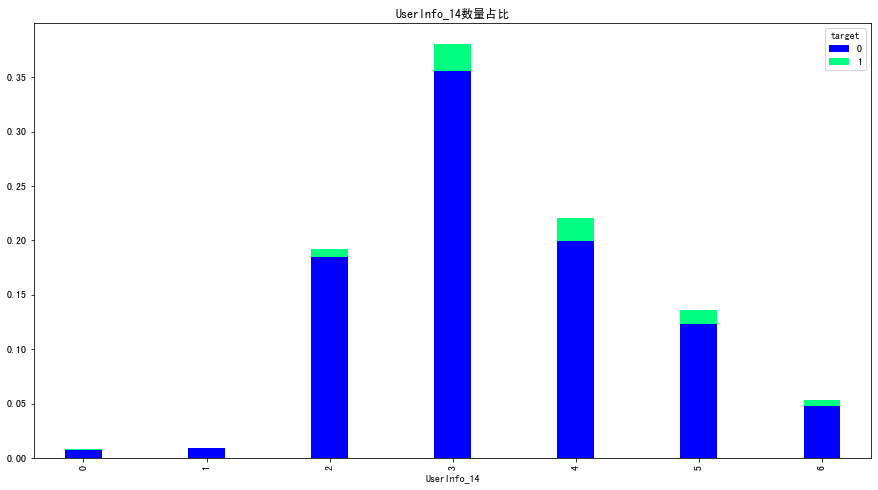

<Figure size 2880x2160 with 0 Axes>

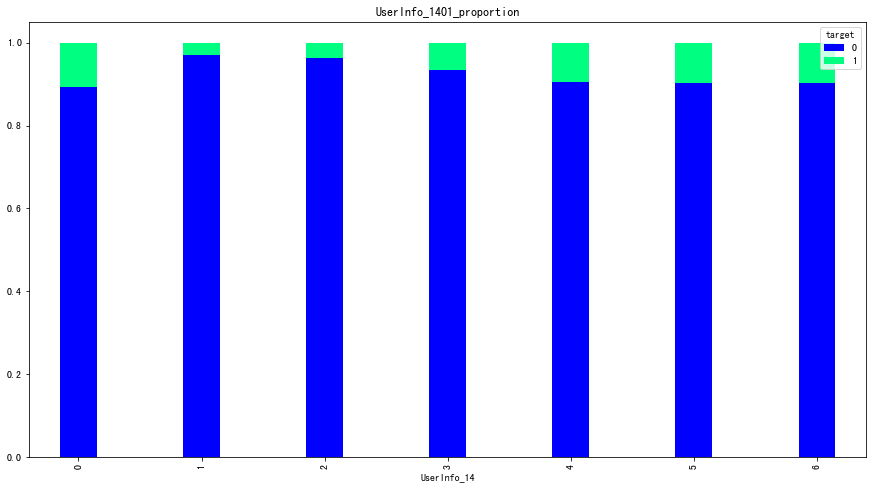

target          0     1    sum
UserInfo_15                   
0           0.007 0.001    246
1           0.009 0.000    266
2           0.183 0.007   5698
3           0.357 0.025  11473
4           0.199 0.021   6615
5           0.124 0.013   4130
6           0.047 0.005   1572


<Figure size 2880x2160 with 0 Axes>

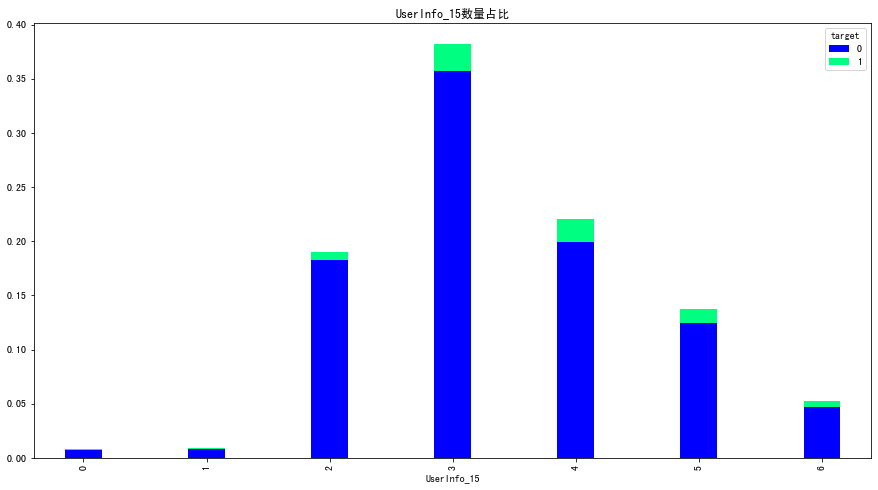

<Figure size 2880x2160 with 0 Axes>

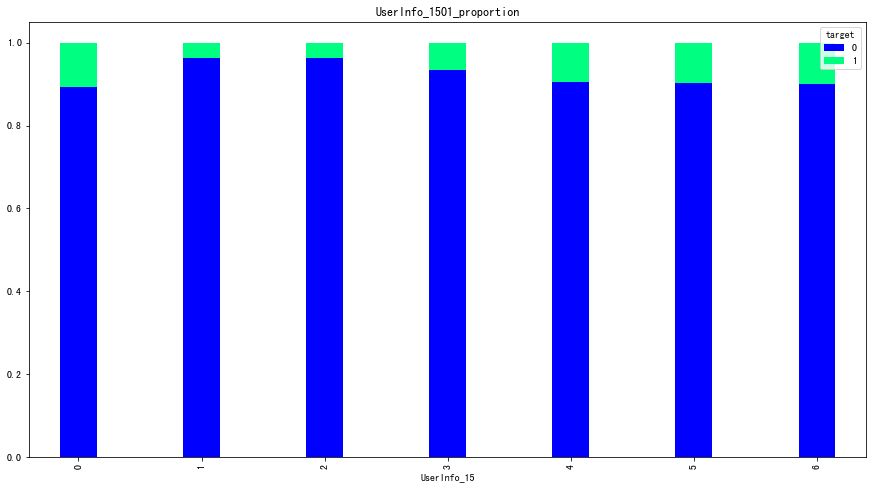

target          0     1       sum
UserInfo_16                      
0           0.000   nan       nan
1           0.551 0.050 18026.000
2           0.295 0.019  9412.000
3           0.026 0.001   797.000
4           0.024 0.000   735.000
6           0.031 0.003  1028.000


<Figure size 2880x2160 with 0 Axes>

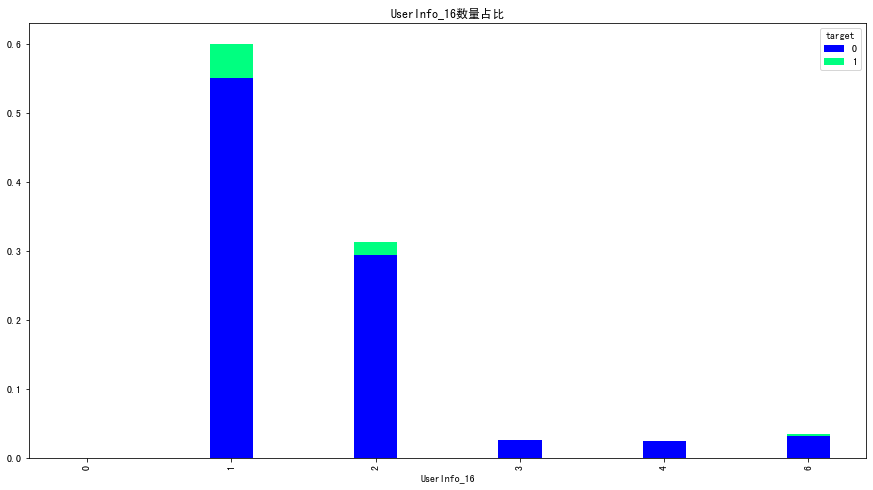

<Figure size 2880x2160 with 0 Axes>

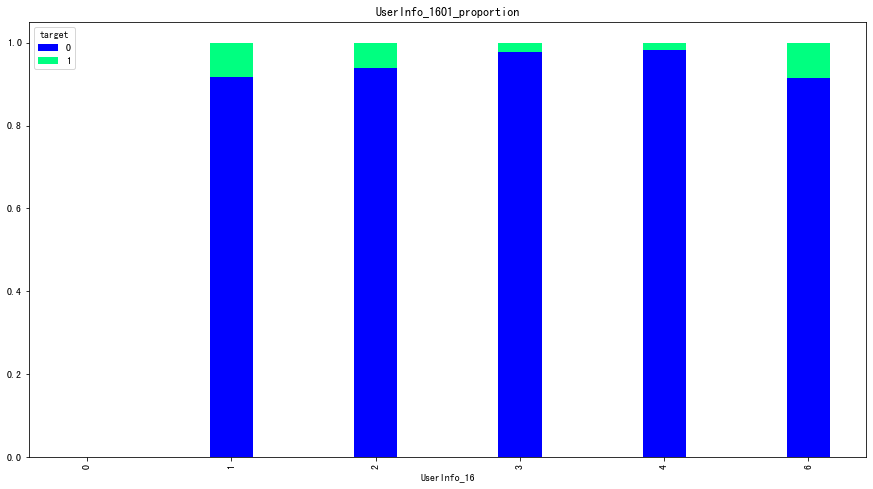

target          0     1    sum
UserInfo_17                   
1           0.802 0.068  26120
2           0.124 0.005   3880


<Figure size 2880x2160 with 0 Axes>

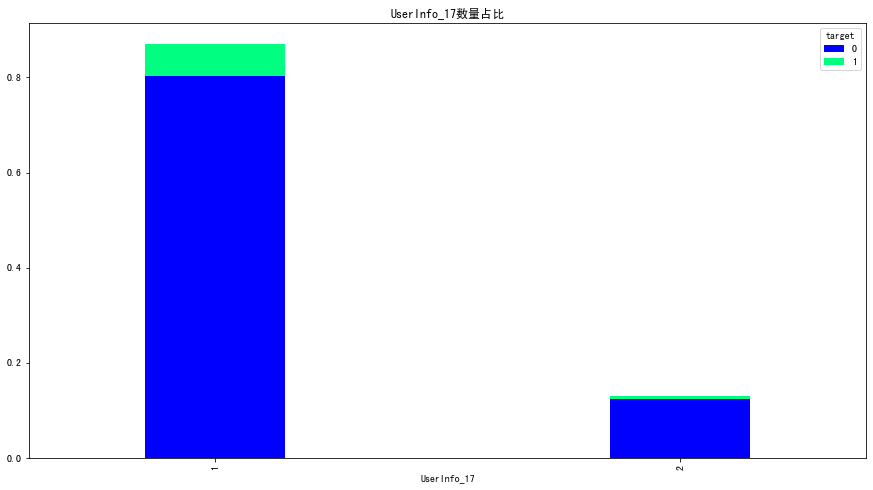

<Figure size 2880x2160 with 0 Axes>

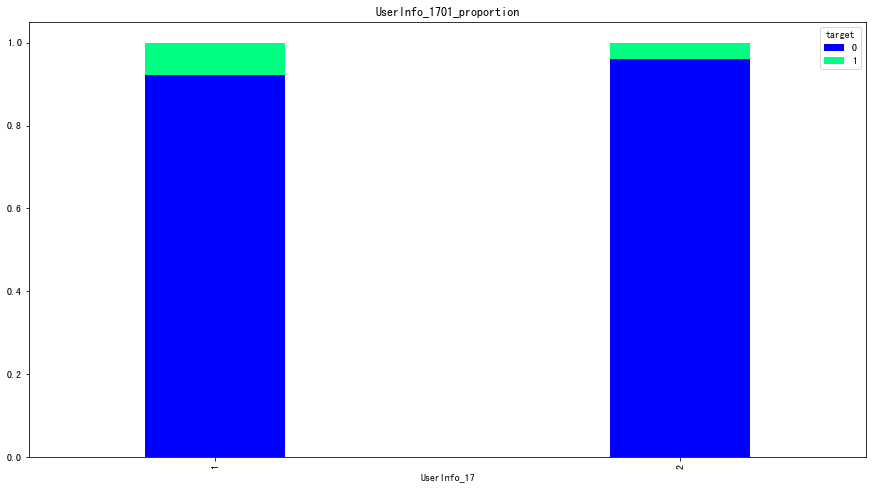

target          0     1      sum
UserInfo_18                     
0           0.000 0.000    2.000
18          0.000   nan      nan
19          0.002 0.000   53.000
20          0.008 0.000  251.000
21          0.032 0.001 1013.000
22          0.039 0.003 1259.000
23          0.052 0.004 1659.000
24          0.065 0.006 2128.000
25          0.069 0.006 2259.000
26          0.068 0.006 2231.000
27          0.073 0.006 2369.000
28          0.063 0.006 2061.000
29          0.053 0.004 1728.000
30          0.049 0.004 1586.000
31          0.048 0.004 1556.000
32          0.048 0.004 1550.000
33          0.036 0.004 1193.000
34          0.028 0.002  902.000
35          0.029 0.003  948.000
36          0.023 0.002  736.000
37          0.020 0.002  651.000
38          0.018 0.001  582.000
39          0.014 0.001  457.000
40          0.013 0.001  417.000
41          0.012 0.001  391.000
42          0.012 0.001  389.000
43          0.010 0.001  324.000
44          0.010 0.001  304.000
45        

<Figure size 2880x2160 with 0 Axes>

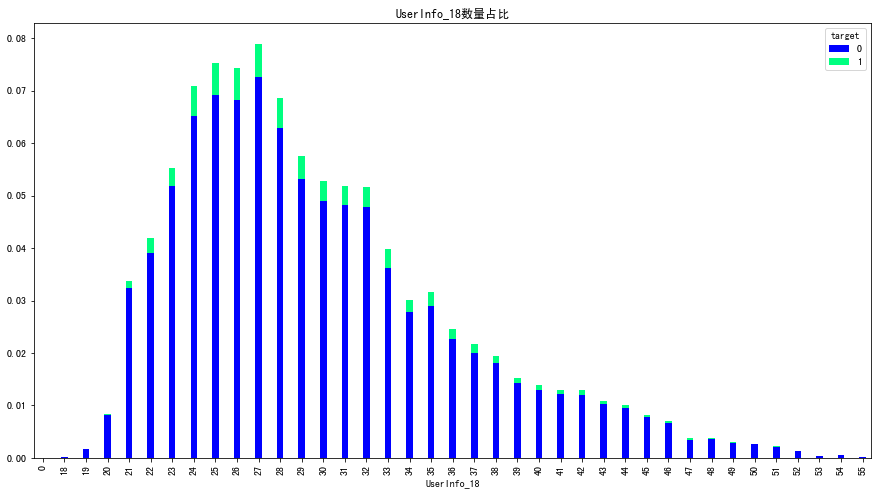

<Figure size 2880x2160 with 0 Axes>

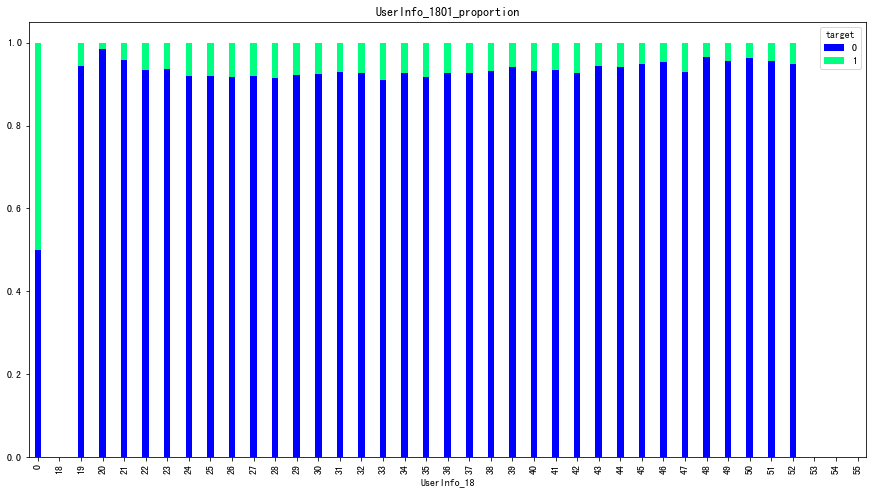

In [32]:
handle_list(plot_data=userinfo_numerical_list,title='01_proportion')

In [33]:
del userinfo_numerical_list[-1]
for i in userinfo_numerical_list:
    data[i]=data[i].astype(str)

In [34]:
data.head()

Idx UserInfo_1 UserInfo_2 UserInfo_3 UserInfo_4  WeblogInfo_2  \
0  10001        1.0         深圳        4.0         深圳         1.000   
1  10002        1.0         温州        4.0         温州         0.000   
2  10003        1.0         宜昌        3.0         宜昌         0.000   
3  10006        4.0         南平        1.0         南平         0.000   
4  10007        5.0         辽阳        1.0         辽阳         0.000   

   WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0         1.000         1.000         1.000            14             0   
1         1.000         1.000         1.000            14             0   
2         2.000         2.000         2.000             9             3   
3         0.000         0.000         0.000             2             0   
4         1.000         1.000         1.000             3             0   

   WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  WeblogInfo_12  WeblogInfo_13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0              6              6              0              6              2   
1              0              0              7              7              0   
2              0              0              3              4              2   
3              0              0              0              2              0   
4              0              0              0              3              0   

  UserInfo_5 UserInfo_6 UserInfo_7 UserInfo_8 UserInfo_9 UserInfo_10  \
0          2          2         广东         深圳       中国移动           0   
1          2          2         浙江         温州       中国移动           1   
2          2          2         湖北         宜昌       中国电信           0   
3          2          2         福建         南平       中国移动           0   
4          2          2         辽宁         辽阳       中国移动           0   

  UserInfo_11 UserInfo_12 UserInfo_13 UserInfo_14 UserInfo_15 UserInfo_16  \
0         0.0         0.0         0.0           2           2           1   
1         0.0         0.0         1.0           3           3           2   
2         0.0         0.0         1.0           4           4           2   
3         0.0         0.0         1.0           2           2           1   
4         0.0         0.0         0.0           3           3           1   

  UserInfo_17  UserInfo_18 UserInfo_19 UserInfo_20 UserInfo_21 UserInfo_22  \
0           1           29          四川          南充           0           D   
1           2           28          福建          不详           0           D   
2           1           32          湖北          宜昌           0           D   
3           1           33          江西          不详           0           D   
4           1           43          辽宁          锦州           0           D   

  UserInfo_23 UserInfo_24  Education_Info1 Education_Info2 Education_Info3  \
0           D           D                0               E               E   
1           D           D                0               E               E   
2           D           D                0               E               E   
3           D           D                0               E               E   
4           D           D                0               E               E   

  Education_Info4  Education_Info5 Education_Info6 Education_Info7  \
0               E                0               E               E   
1               E                0               E               E   
2               E                0               E               E   
3               E                0               E             

In [35]:
userinfo_location_list = ['UserInfo_2', 'UserInfo_4', 'UserInfo_7',
                          'UserInfo_8', 'UserInfo_19', 'UserInfo_20']
data.drop(userinfo_location_list,axis=1,inplace=True)
user_dummies_list = ['UserInfo_1', 'UserInfo_10', 'UserInfo_14', 'UserInfo_15', 'UserInfo_16', 'UserInfo_17', 
                    'UserInfo_2_level', 'UserInfo_20_level', 'UserInfo_21', 'UserInfo_22', 
                    'UserInfo_23', 'UserInfo_24', 'UserInfo_3', 'UserInfo_4_level', 'UserInfo_5', 'UserInfo_6', 
                    'UserInfo_8_level', 'UserInfo_9','UserInfo_11','UserInfo_12','UserInfo_13']
data = pd.get_dummies(data, columns=user_dummies_list)
# 展示结果
data.head()


Idx  WeblogInfo_2  WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  \
0  10001         1.000         1.000         1.000         1.000   
1  10002         0.000         1.000         1.000         1.000   
2  10003         0.000         2.000         2.000         2.000   
3  10006         0.000         0.000         0.000         0.000   
4  10007         0.000         1.000         1.000         1.000   

   WeblogInfo_7  WeblogInfo_8  WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  \
0            14             0             0              0              0   
1            14             0             0              0              0   
2             9             3             0              0              0   
3             2             0             0              0              0   
4             3             0             0              0              0   

   WeblogInfo_12  WeblogInfo_13  WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  \
0              0              0              6              6              0   
1              0              0              0              0              7   
2              0              0              0              0              3   
3              0              0              0              0              0   
4              0              0              0              0              0   

   WeblogInfo_17  WeblogInfo_18  UserInfo_18  Education_Info1 Education_Info2  \
0              6              2           29                0               E   
1              7              0           28                0               E   
2              4              2           32                0               E   
3              2              0           33                0               E   
4              3              0           43                0               E   

  Education_Info3 Education_Info4  Education_Info5 Education_Info6  \
0               E               E                0               E   
1               E               E                0               E   
2               E               E                0               E   
3               E               E                0               E   
4               E               E                0               E   

  Education_Info7 Education_Info8 WeblogInfo_19 WeblogInfo_20 WeblogInfo_21  \
0               E               E             I            I5             D   
1               E               E             I            I5             D   
2               E               E             I            I5             D   
3               E               E             I            I5             D   
4               E               E             I             0             D   

   WeblogInfo_23  WeblogInfo_24  WeblogInfo_25  WeblogInfo_26  WeblogInfo_27  \
0          0.000          0.000          0.000          0.000          0.000   
1          0.000          0.000          0.000          0.000          0.000   
2          0.000          0.000          0.000          0.000          0.000   
3          0.000          0.000          0.000          0.000          0.000   
4          0.000          0.000          0.000          0.000          0.000   

   WeblogInfo_28  WeblogInfo_29  WeblogInfo_30  WeblogInfo_31  WeblogInfo_32  \
0          0.000          0.000          1.000          0.000          0.000   
1          0.000          0.000          1.000          0.000          0.000   
2          0.000          0.000          1.000          0.000          0.000   
3          0.000          0.000          1.000          0.000          0.000   
4          0.000          0.000          0.000          0.000          0.000   

   WeblogInfo_33  WeblogInfo_34  WeblogInfo_35  WeblogInfo_36  WeblogInfo_37  \
0          0.000          0.000          0.000          0.000          0.000   
1          0.000          0.000          0.000          0.000          0.000   
2          0.000          0.000          0.000          0.000      

In [36]:
webinfo_list=['WeblogInfo_2','WeblogInfo_4']
webinfo_list.extend(combine('WeblogInfo_',5,18))
webinfo_list.extend(combine('WeblogInfo_',19,21))
webinfo_list.extend(combine('WeblogInfo_',23,58))
data[webinfo_list].describe(include='all')

WeblogInfo_2  WeblogInfo_4  WeblogInfo_5  WeblogInfo_6  WeblogInfo_7  \
count      30000.000     30000.000     30000.000     30000.000     30000.000   
unique           nan           nan           nan           nan           nan   
top              nan           nan           nan           nan           nan   
freq             nan           nan           nan           nan           nan   
mean           0.124         2.859         1.717         2.786        10.633   
std            0.350         3.732         1.705         3.726        16.098   
min            0.000         0.000         0.000         0.000         0.000   
25%            0.000         1.000         1.000         1.000         2.000   
50%            0.000         2.000         1.000         2.000         6.000   
75%            0.000         3.000         2.000         3.000        13.000   
max            4.000       165.000        73.000       165.000       722.000   

        WeblogInfo_8  WeblogInfo_9  WeblogInfo_10  WeblogInfo_11  \
count      30000.000     30000.000      30000.000      30000.000   
unique           nan           nan            nan            nan   
top              nan           nan            nan            nan   
freq             nan           nan            nan            nan   
mean           0.658         0.121          0.000          0.003   
std            2.622         1.338          0.000          0.185   
min            0.000         0.000          0.000          0.000   
25%            0.000         0.000          0.000          0.000   
50%            0.000         0.000          0.000          0.000   
75%            0.000         0.000          0.000          0.000   
max           81.000        46.000          0.000         18.000   

        WeblogInfo_12  WeblogInfo_13  WeblogInfo_14  WeblogInfo_15  \
count       30000.000      30000.000      30000.000      30000.000   
unique            nan            nan            nan            nan   
top               nan            nan            nan            nan   
freq              nan            nan            nan            nan   
mean            0.012          0.002          0.762          1.020   
std             0.414          0.180          4.292          2.846   
min             0.000          0.000          0.000          0.000   
25%             0.000          0.000          0.000          0.000   
50%             0.000          0.000          0.000          0.000   
75%             0.000          0.000          0.000          1.000   
max            27.000         29.000        335.000        134.000   

        WeblogInfo_16  WeblogInfo_17  WeblogInfo_18 WeblogInfo_19  \
count       30000.000      30000.000      30000.000         30000   
unique            nan            nan            nan             8   
top               nan            nan            nan             I   
freq              nan            nan            nan         21977   
mean            2.622          5.346          1.645           NaN   
std             4.749          8.221          3.552           NaN   
min             0.000          0.000          0.000           NaN   
25%             0.000          1.000          0.000           NaN   
50%             1.000          3.000          0.000           NaN   
75%             3.000          7.000          2.000           NaN   
max           182.000        356.000        136.000           NaN   

       WeblogInfo_20 WeblogInfo_21  WeblogInfo_23  WeblogInfo_24  \
count          30000         30000      30000.000      30000.000   
unique            37             5            nan            nan   
top               I5             D            nan            nan   
freq           11142         21678            nan            nan   
mean             NaN           NaN          0.007          0.353   
std              NaN           NaN          0.087          1.309   
min              NaN           NaN          0.000          0.000   
25%             

In [37]:
webinfo_num_list=[]
webinfo_category_list=['WeblogInfo_19','WeblogInfo_20','WeblogInfo_21']
for item in webinfo_list:
    if item not in webinfo_category_list:
        webinfo_num_list.append(item)
# print(webinfo_num_list)

target            0     1    sum
WeblogInfo_19                   
0             0.092 0.006   2963
D             0.107 0.010   3539
E             0.006 0.000    180
F             0.036 0.003   1160
G             0.003 0.000     79
H             0.000 0.000      5
I             0.680 0.053  21977
J             0.003 0.000     97


<Figure size 2880x2160 with 0 Axes>

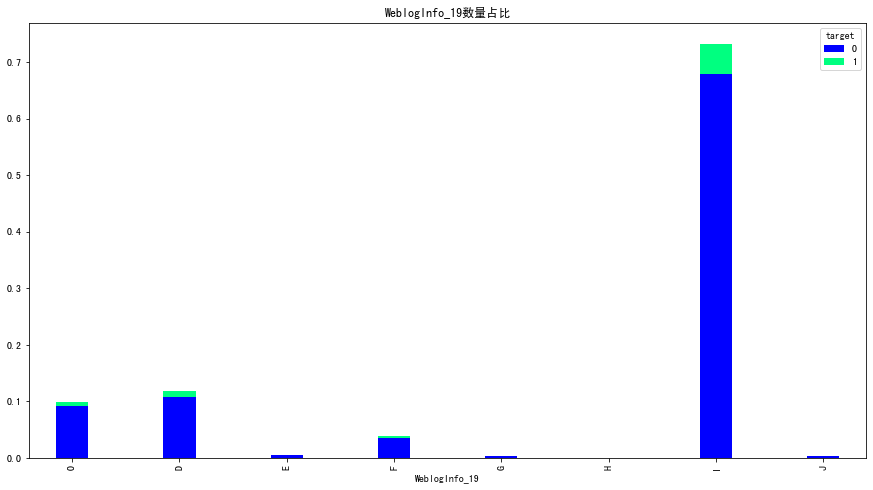

<Figure size 2880x2160 with 0 Axes>

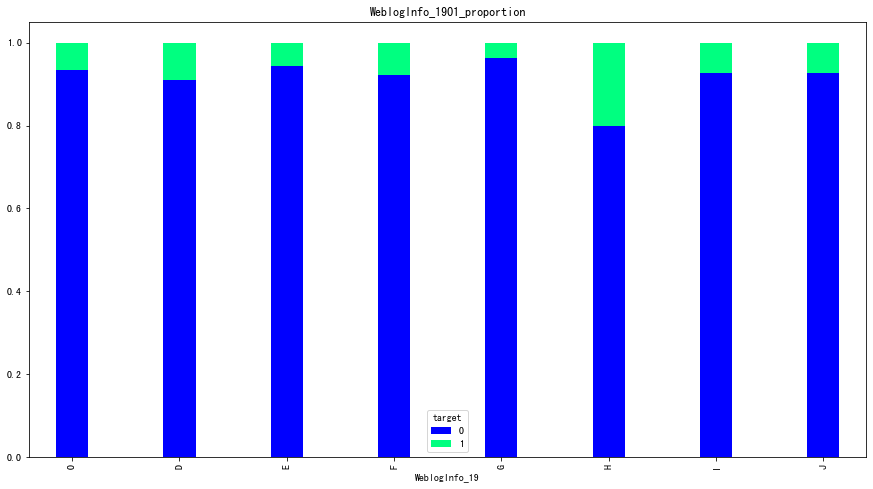

target            0     1       sum
WeblogInfo_20                      
0             0.252 0.016  8050.000
C1            0.007 0.001   227.000
C11           0.007 0.000   225.000
C12           0.002 0.000    59.000
C13           0.000   nan       nan
C14           0.000   nan       nan
C15           0.003 0.000   110.000
C16           0.000 0.000    14.000
C17           0.001 0.000    44.000
C18           0.003 0.000    97.000
C19           0.023 0.002   753.000
C20           0.017 0.001   540.000
C21           0.079 0.004  2503.000
C32           0.000   nan       nan
C38           0.000   nan       nan
C39           0.000   nan       nan
F10           0.000   nan       nan
F11           0.001   nan       nan
F12           0.000   nan       nan
F13           0.001   nan       nan
F14           0.001   nan       nan
F15           0.001   nan       nan
F16           0.004 0.000   121.000
F3            0.000   nan       nan
F6            0.000   nan       nan
F7            0.000   nan   

<Figure size 2880x2160 with 0 Axes>

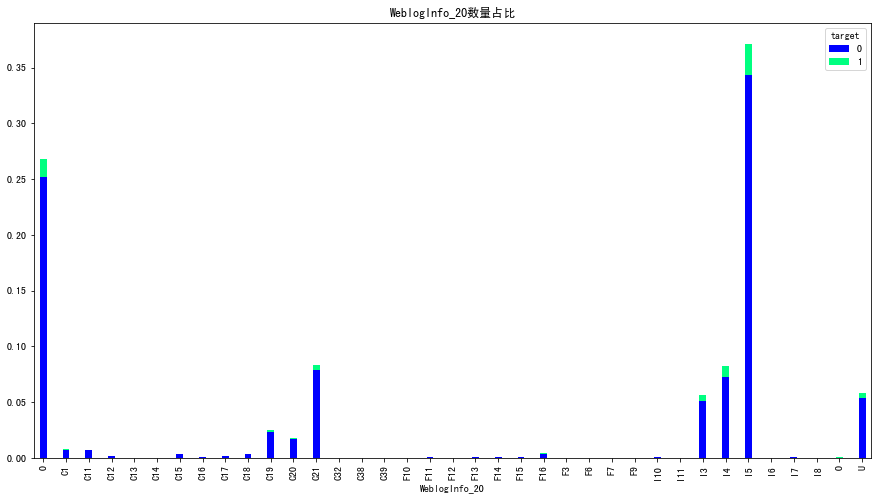

<Figure size 2880x2160 with 0 Axes>

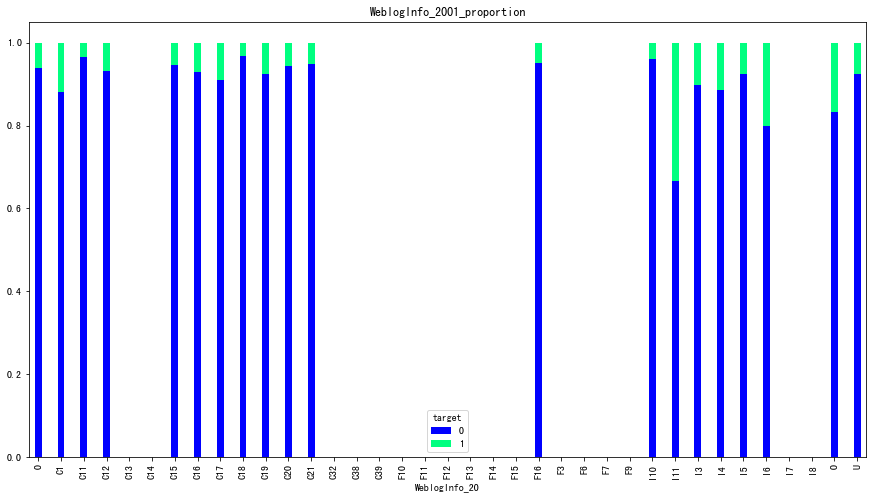

target            0     1    sum
WeblogInfo_21                   
0             0.096 0.007   3074
A             0.112 0.011   3684
B             0.001 0.000     49
C             0.047 0.004   1515
D             0.671 0.052  21678


<Figure size 2880x2160 with 0 Axes>

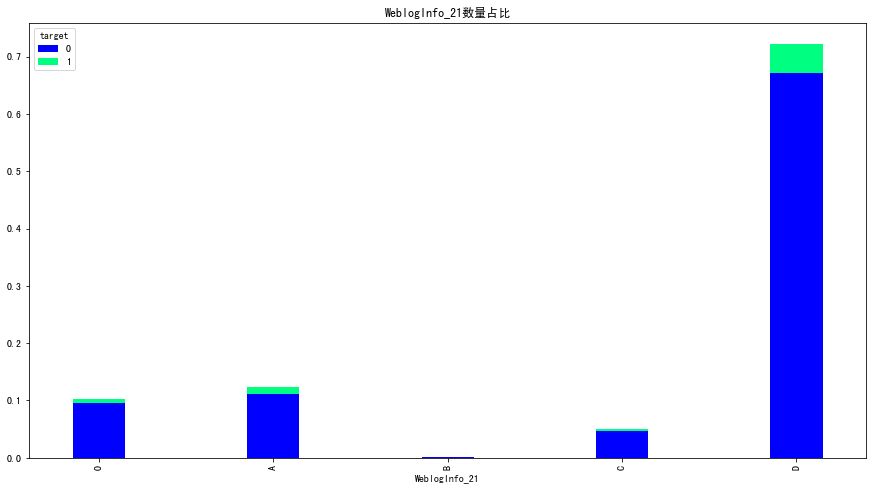

<Figure size 2880x2160 with 0 Axes>

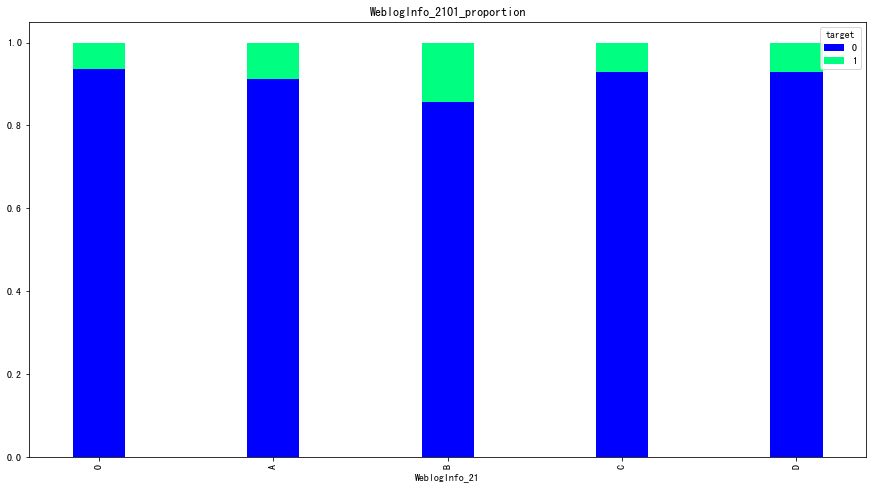

In [38]:
handle_list(plot_data=webinfo_category_list,title='WeblogInfo_')

target            0     1    sum
WeblogInfo_19                   
0             0.092 0.006   2963
D             0.107 0.010   3539
F             0.036 0.003   1160
I             0.680 0.053  21977
other         0.011 0.001    361


<Figure size 2880x2160 with 0 Axes>

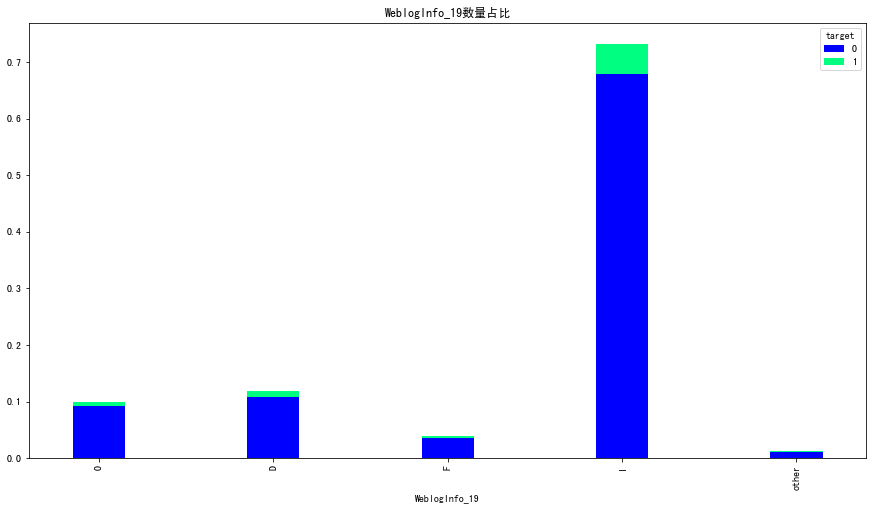

<Figure size 2880x2160 with 0 Axes>

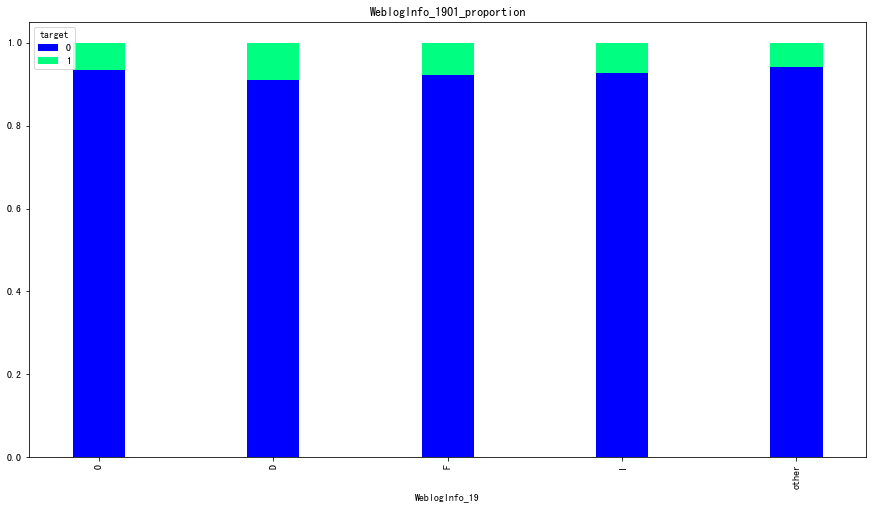

target            0     1    sum
WeblogInfo_20                   
0             0.252 0.016   8050
C19           0.023 0.002    753
C20           0.017 0.001    540
C21           0.079 0.004   2503
I3            0.051 0.006   1693
I4            0.073 0.009   2465
I5            0.343 0.028  11142
U             0.054 0.004   1752
other         0.035 0.002   1102


<Figure size 2880x2160 with 0 Axes>

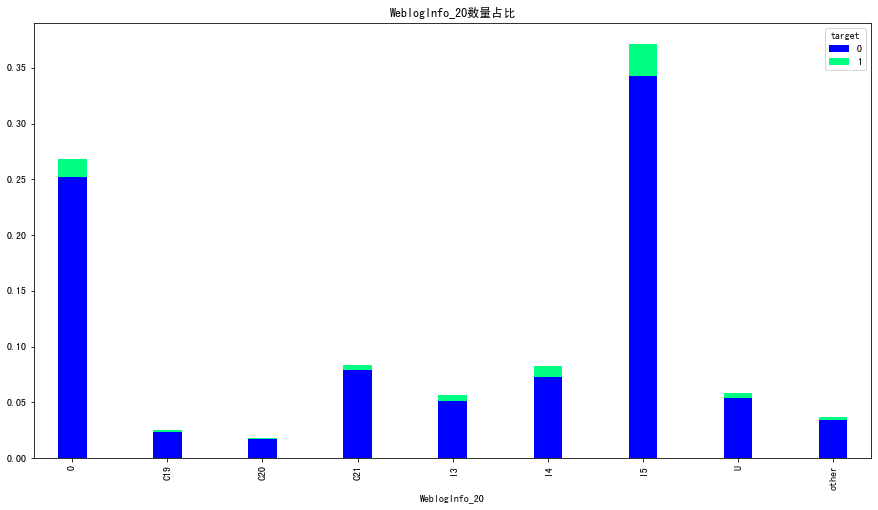

<Figure size 2880x2160 with 0 Axes>

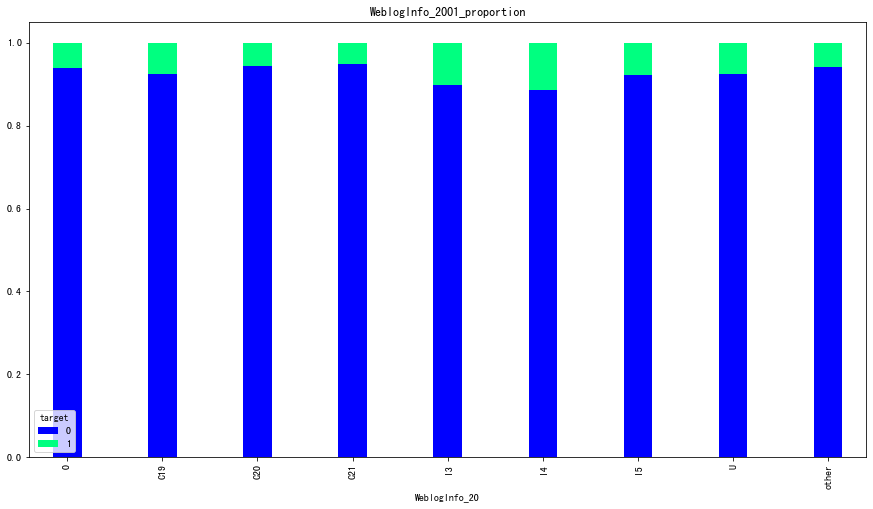

target            0     1    sum
WeblogInfo_21                   
0             0.096 0.007   3074
A             0.112 0.011   3684
C             0.047 0.004   1515
D             0.671 0.052  21678
other         0.001 0.000     49


<Figure size 2880x2160 with 0 Axes>

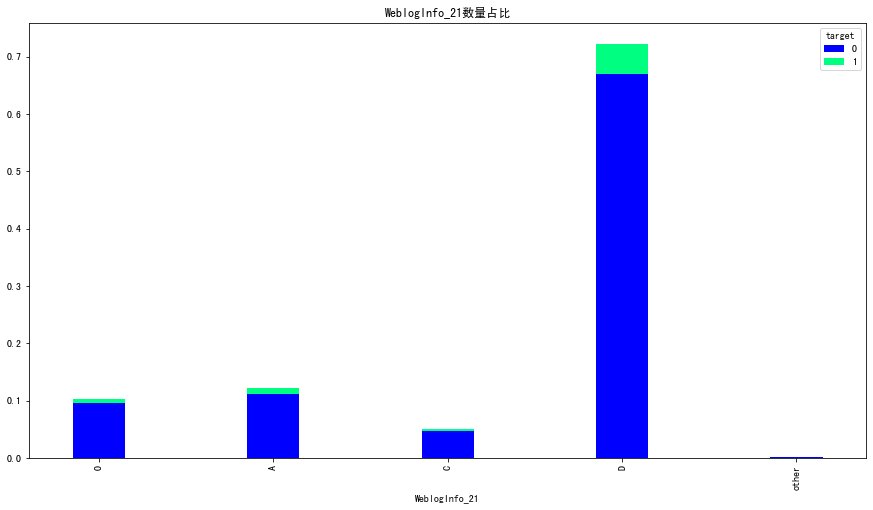

<Figure size 2880x2160 with 0 Axes>

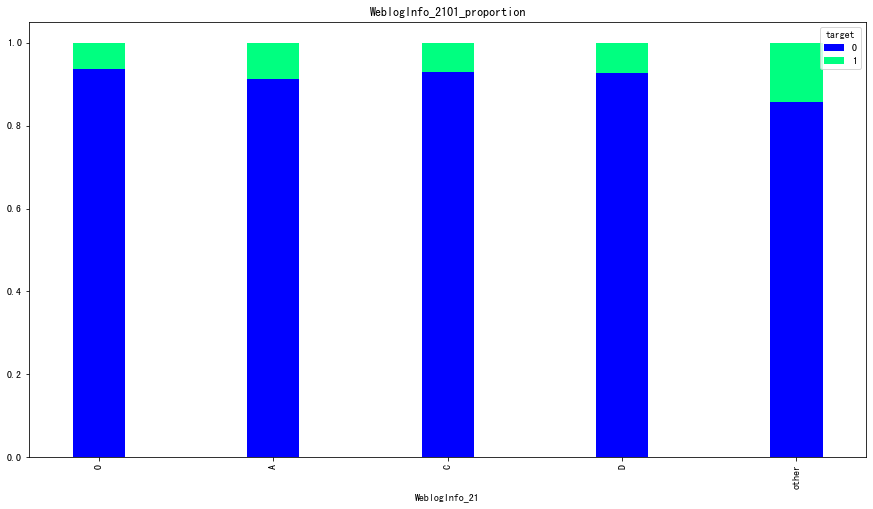

In [39]:
def webinfo_categoty(webinfo_category_list):
    for i in webinfo_category_list:
        webname=data[i].value_counts()
        webname=webname/len(data)
        dic_webinfo={}
        for j in webname.index:
            if webname[j]>0.01:
                dic_webinfo[j]=j
            else:
                dic_webinfo[j]='other'
        data[i]=data[i].map(dic_webinfo)
    handle_list(plot_data=webinfo_category_list,title='WeblogInfo_')
webinfo_categoty(webinfo_category_list=webinfo_category_list)

<AxesSubplot:>

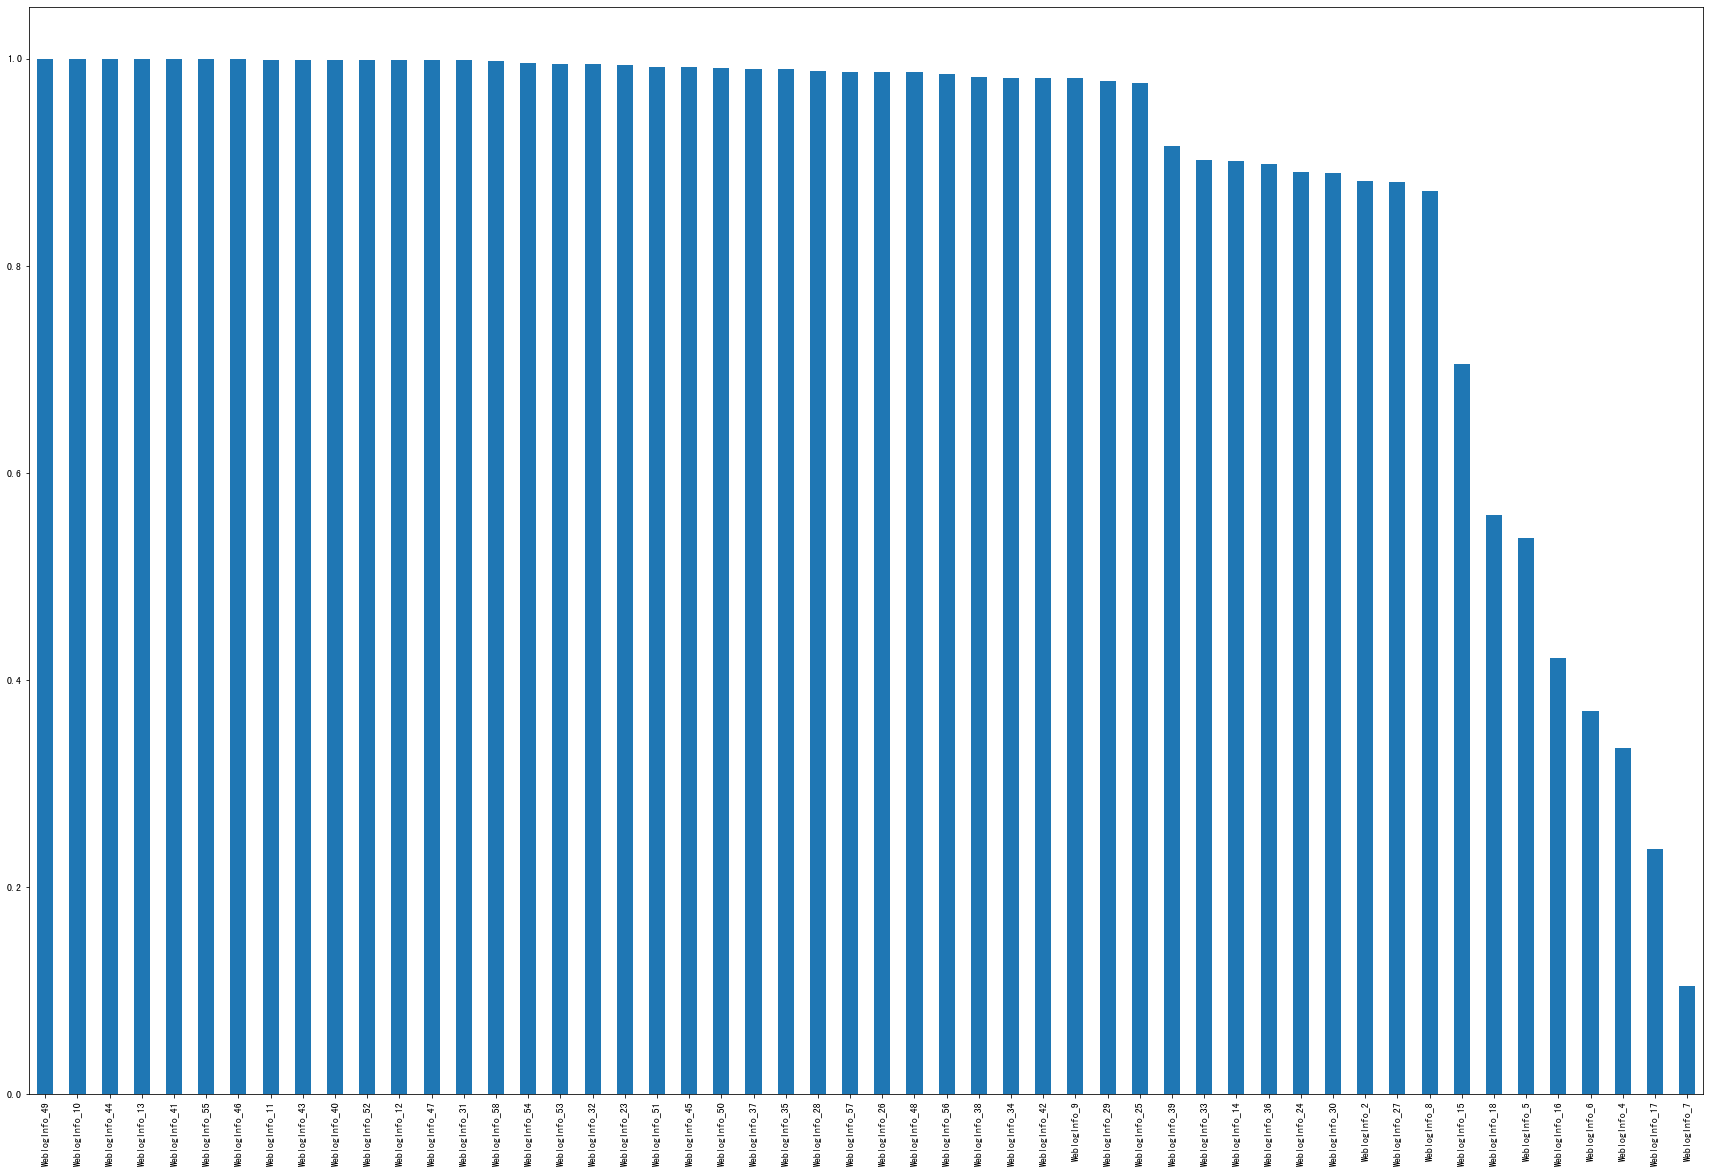

In [40]:
dic={}
value_counts_list=[]
mean_list=[]
std_list=[]
for i in webinfo_num_list:
    value_counts_list.append(data[i].value_counts().values[0]/len(data))
    mean_list.append(data[i].mean())
    std_list.append(data[i].std())
dic['数量占比']=value_counts_list
dic['均值']=mean_list
dic['标准差']=std_list
webinfo_num=pd.DataFrame(data=dic,index=webinfo_num_list)
webinfo_num.sort_values(by='数量占比', axis=0, ascending=False, inplace=True)
webinfo_num['数量占比'].plot(kind='bar',figsize=(30,20))
# plt.show()


<AxesSubplot:>

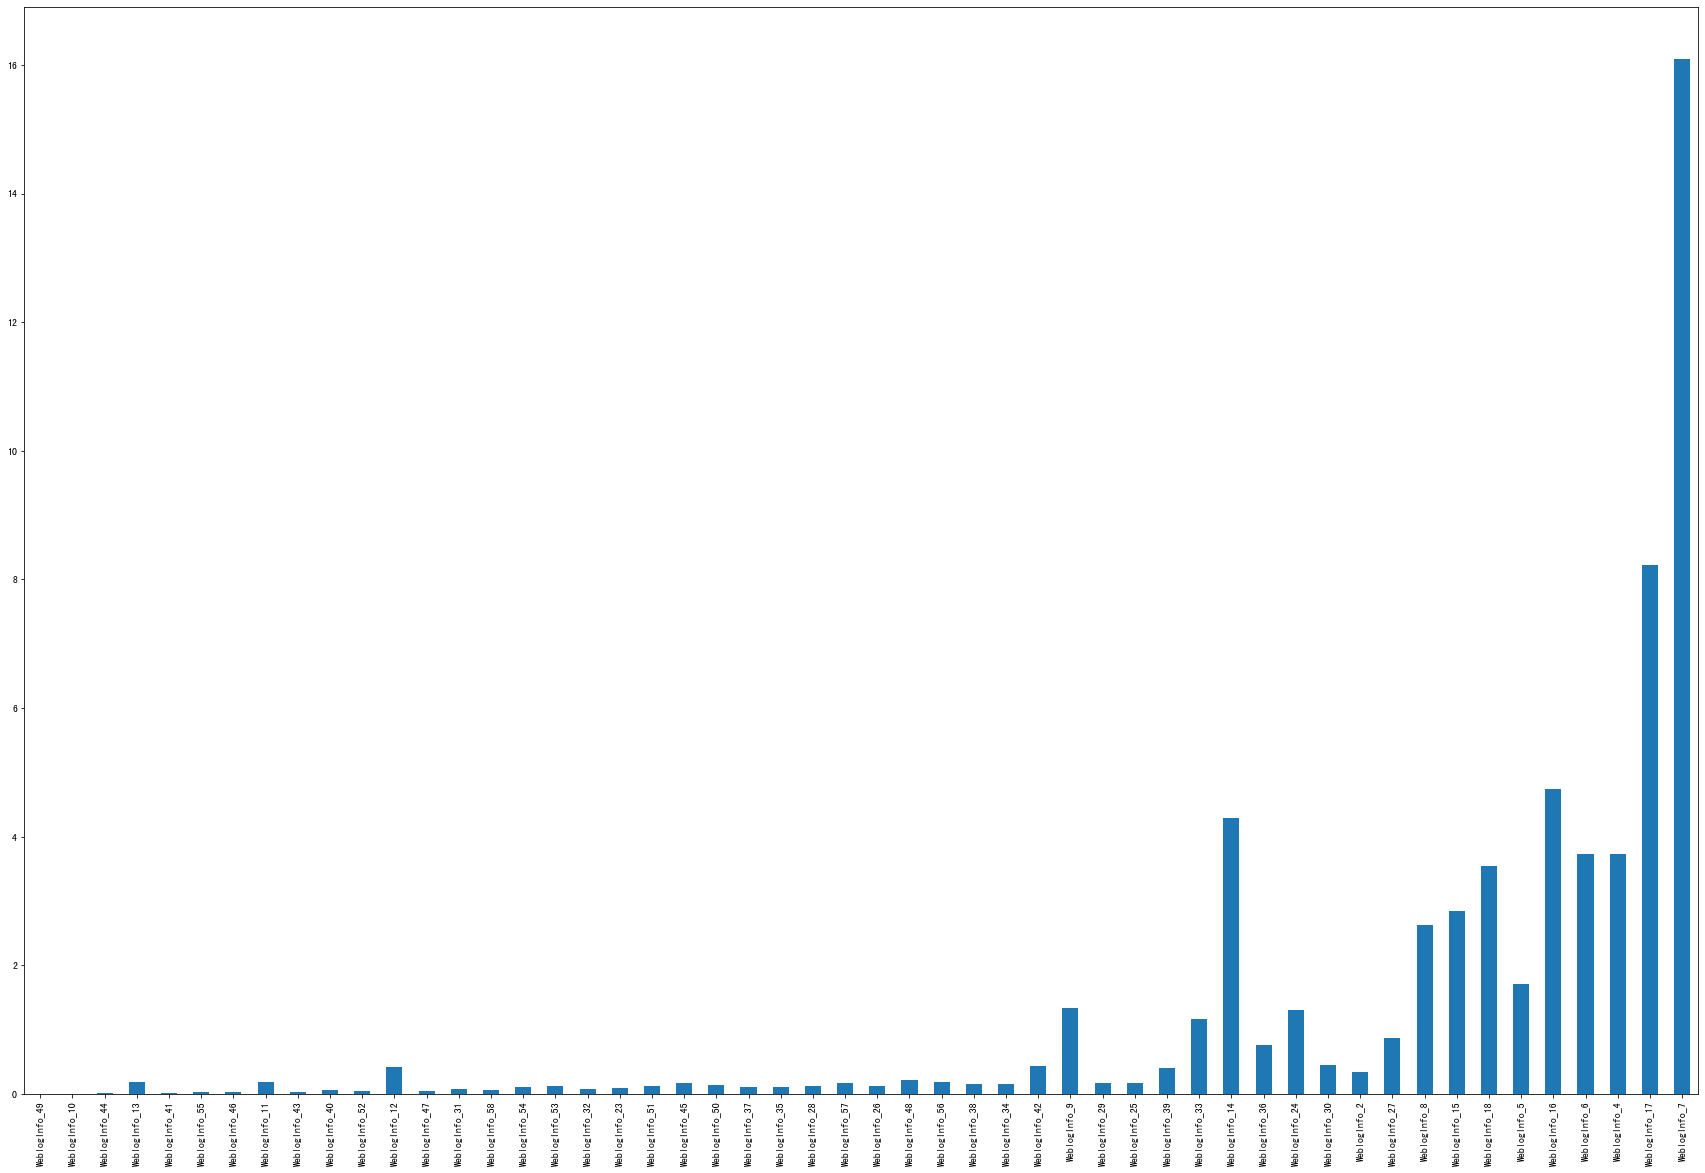

In [41]:
webinfo_num['标准差'].plot(kind='bar',figsize=(30,20))

In [42]:
drop_feature_list = ['WeblogInfo_23', 'WeblogInfo_25', 'WeblogInfo_26', 'WeblogInfo_28', 
                     'WeblogInfo_29', 'WeblogInfo_31', 'WeblogInfo_32', 'WeblogInfo_34', 
                     'WeblogInfo_35', 'WeblogInfo_37', 'WeblogInfo_38']
# 使用feature_list函数生成WeblogInfo_9-13这5个特征名，并加入drop_feature_list内
drop_feature_list.extend(combine('WeblogInfo_', 9, 13))
# 使用feature_list函数生成WeblogInfo_40-58这19个特征名，并加入drop_feature_list内
drop_feature_list.extend(combine('WeblogInfo_', 40, 58))
# 使用drop方法将drop_feature_list内的所有特征删除
data.drop(drop_feature_list, axis=1, inplace=True)

WeblogInfo_2       5
WeblogInfo_30      9
WeblogInfo_39      9
WeblogInfo_36     17
WeblogInfo_33     18
WeblogInfo_27     19
WeblogInfo_24     20
WeblogInfo_5      35
WeblogInfo_8      48
WeblogInfo_15     51
WeblogInfo_6      59
WeblogInfo_18     59
WeblogInfo_4      60
WeblogInfo_14     63
WeblogInfo_16     65
WeblogInfo_17    104
WeblogInfo_7     168
dtype: int64


<BarContainer object of 17 artists>

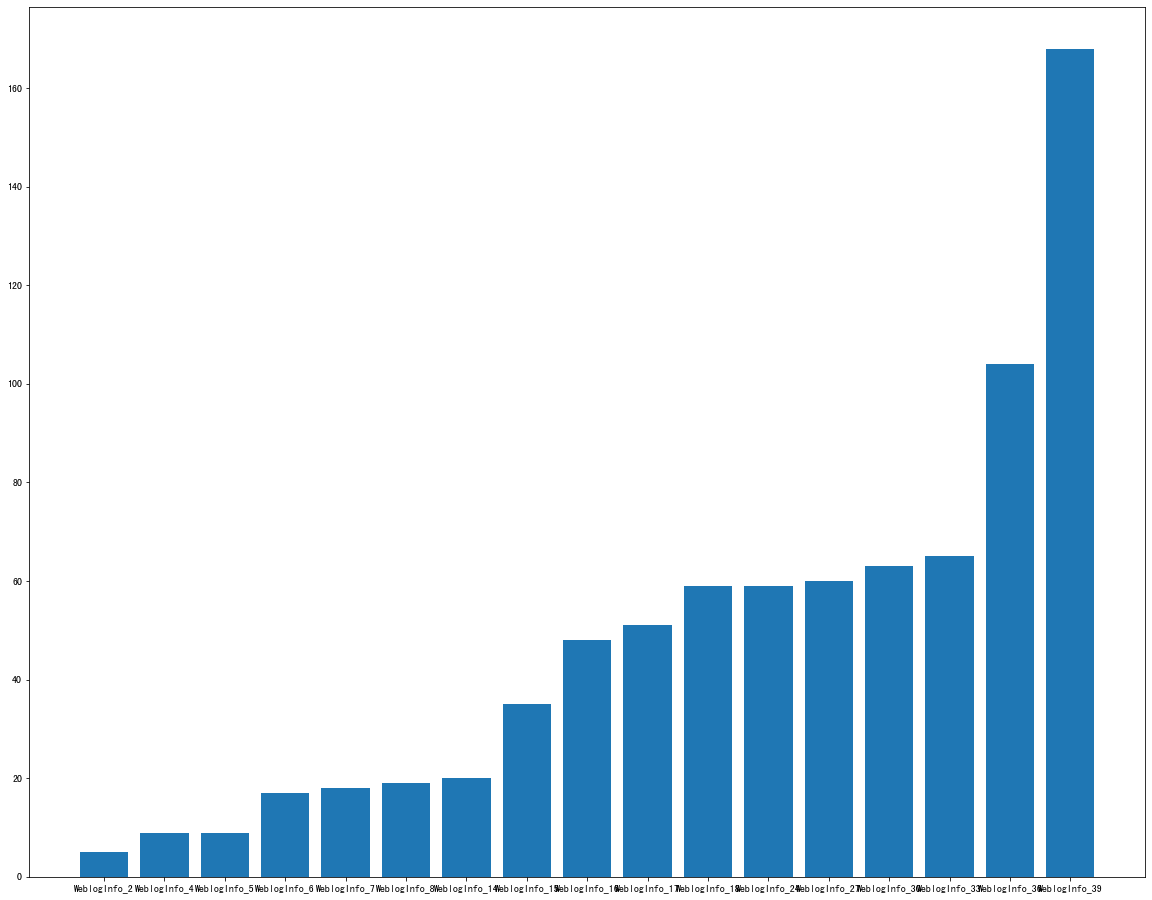

In [43]:
webloginfo_numlist_new=['WeblogInfo_2','WeblogInfo_4','WeblogInfo_5','WeblogInfo_6','WeblogInfo_7','WeblogInfo_8',
                        'WeblogInfo_14','WeblogInfo_15','WeblogInfo_16','WeblogInfo_17','WeblogInfo_18','WeblogInfo_24',
                       'WeblogInfo_27','WeblogInfo_30','WeblogInfo_33','WeblogInfo_36','WeblogInfo_39']
dic_webinfo_num={}
for i in webloginfo_numlist_new:
    dic_webinfo_num[i]=len(data[i].unique())
df_webloginfo_numerical=pd.Series(data=dic_webinfo_num,index=webloginfo_numlist_new)
df_webloginfo_numerical.sort_values(ascending=True)
print(df_webloginfo_numerical.sort_values(ascending=True))

plt.figure(figsize=(20,16))
plt.bar(x=df_webloginfo_numerical.index,height=df_webloginfo_numerical.sort_values())

target           0     1       sum
WeblogInfo_2                      
0.0          0.822 0.060 26465.000
1.0          0.099 0.012  3354.000
2.0          0.005 0.001   173.000
3.0          0.000 0.000     6.000
4.0          0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

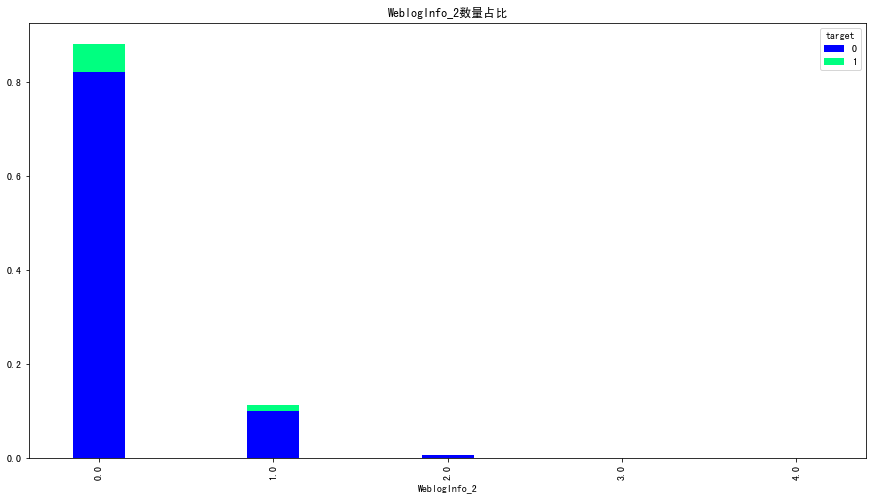

<Figure size 2880x2160 with 0 Axes>

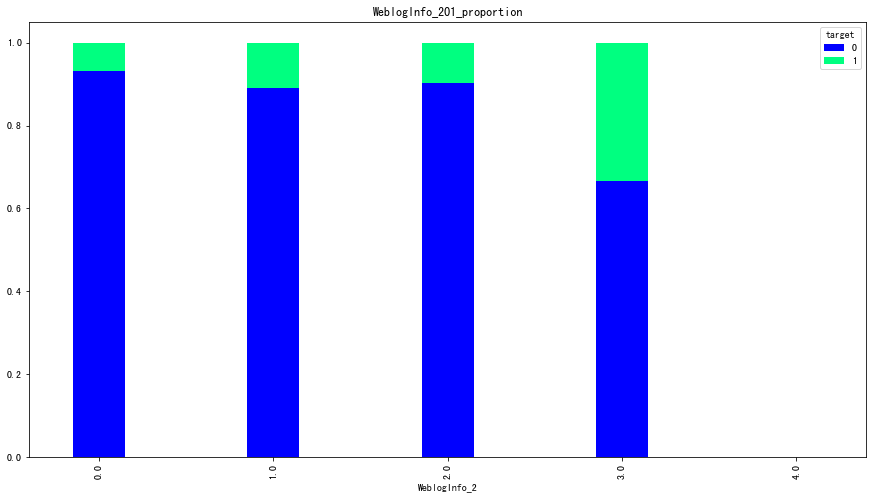

target            0     1       sum
WeblogInfo_30                      
0.0           0.827 0.062 26678.000
1.0           0.084 0.009  2804.000
12.0          0.000   nan       nan
2.0           0.010 0.001   338.000
3.0           0.003 0.000   103.000
4.0           0.001 0.000    47.000
5.0           0.001 0.000    22.000
6.0           0.000 0.000     5.000
8.0           0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

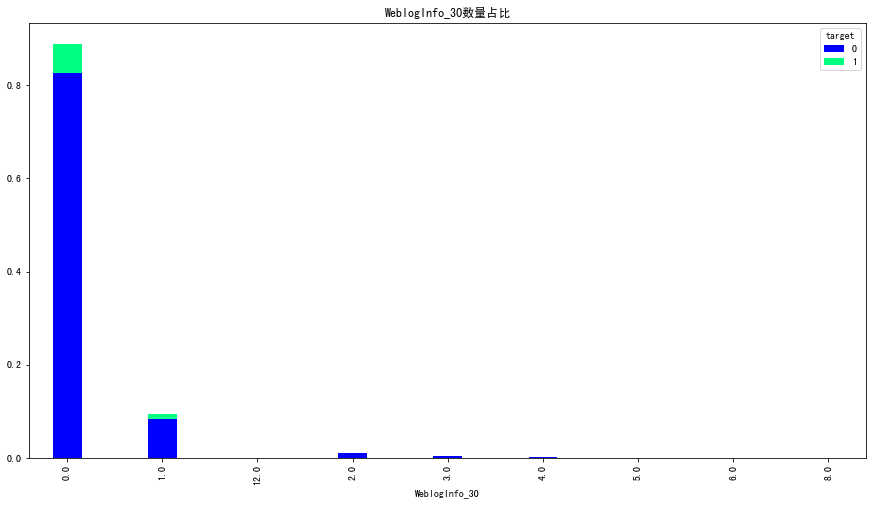

<Figure size 2880x2160 with 0 Axes>

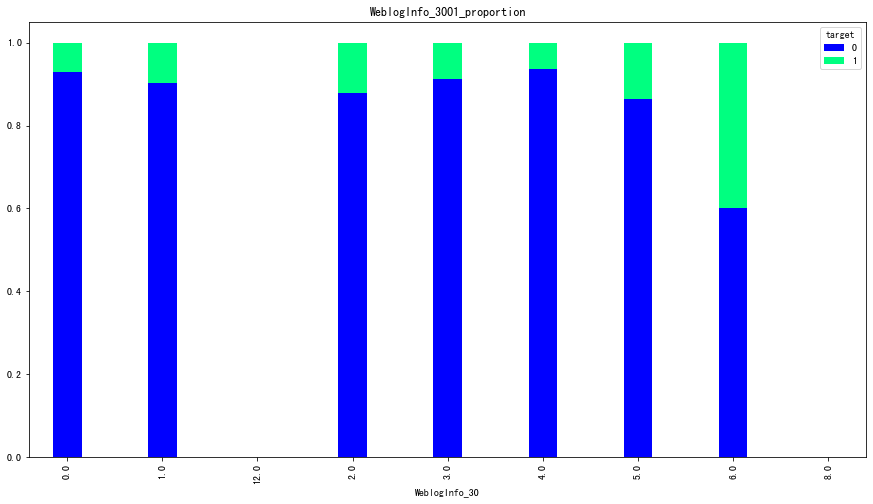

target            0     1       sum
WeblogInfo_39                      
0.0           0.851 0.065 27477.000
1.0           0.065 0.007  2154.000
12.0          0.000   nan       nan
2.0           0.007 0.001   240.000
3.0           0.002 0.000    72.000
4.0           0.001 0.000    34.000
5.0           0.000 0.000    15.000
6.0           0.000 0.000     5.000
8.0           0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

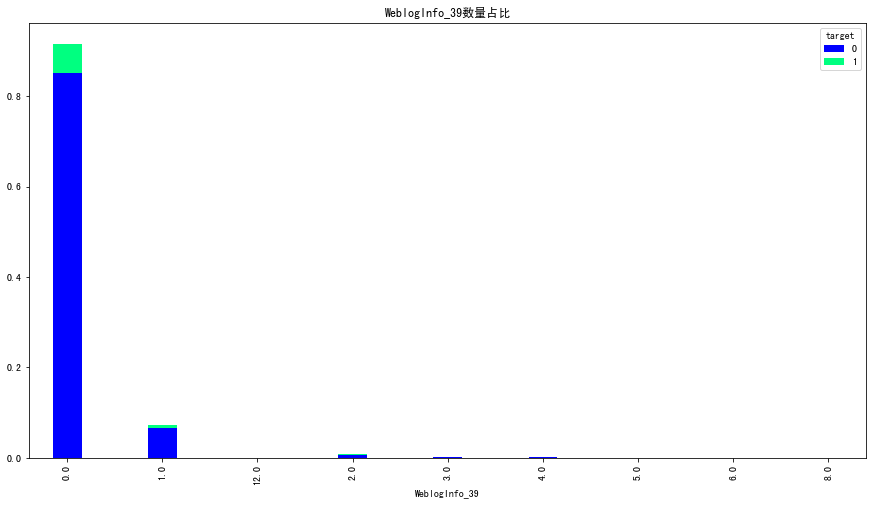

<Figure size 2880x2160 with 0 Axes>

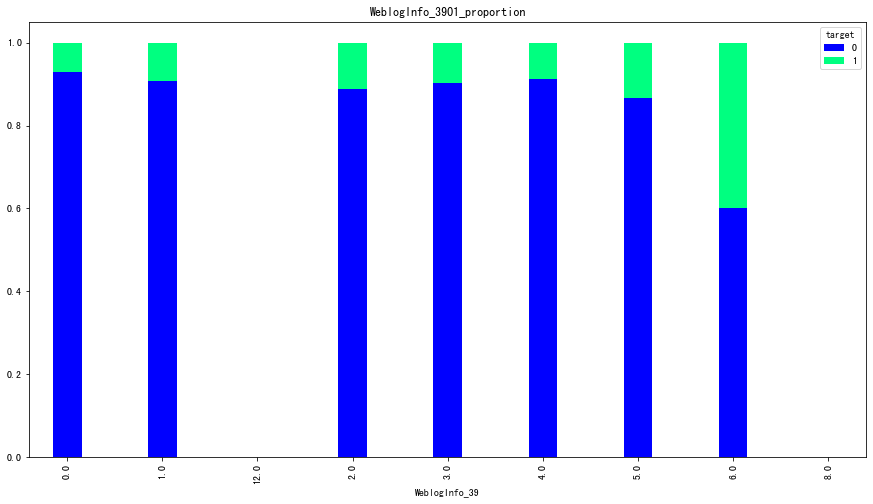

In [44]:
str_webinfo=['WeblogInfo_2','WeblogInfo_30','WeblogInfo_39']
for i in str_webinfo:
    data[i]=data[i].astype(str)
handle_list(plot_data=str_webinfo,title='01_proportion')

target           0     1    sum
WeblogInfo_2                   
0.0          0.822 0.060  26465
1.0          0.099 0.012   3354
other        0.005 0.001    181


<Figure size 2880x2160 with 0 Axes>

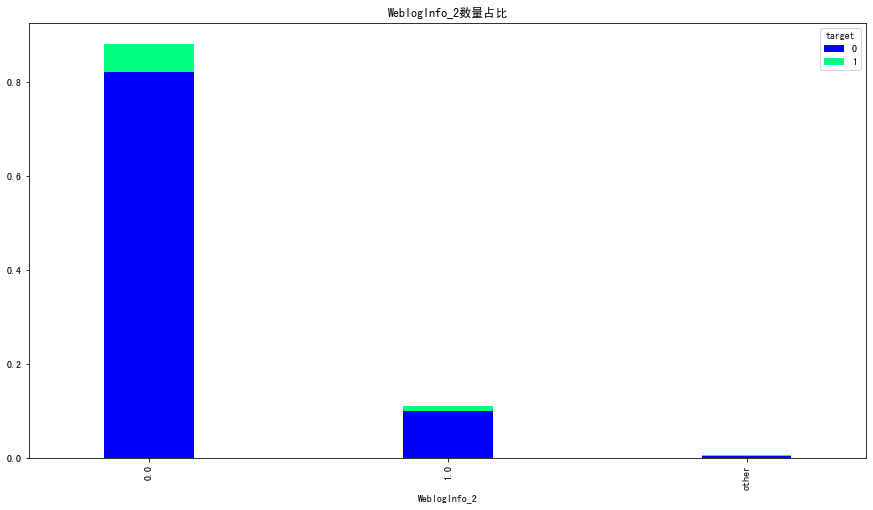

<Figure size 2880x2160 with 0 Axes>

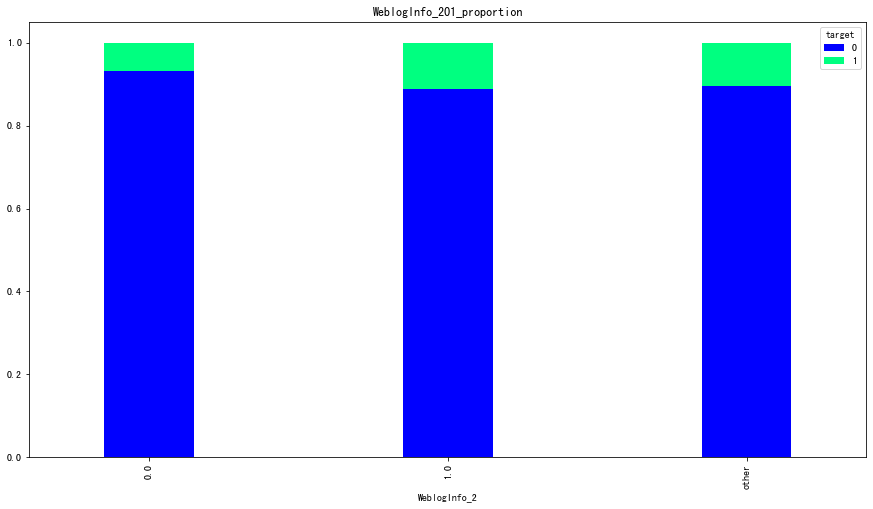

target            0     1    sum
WeblogInfo_30                   
0.0           0.827 0.062  26678
1.0           0.084 0.009   2804
2.0           0.010 0.001    338
other         0.005 0.001    180


<Figure size 2880x2160 with 0 Axes>

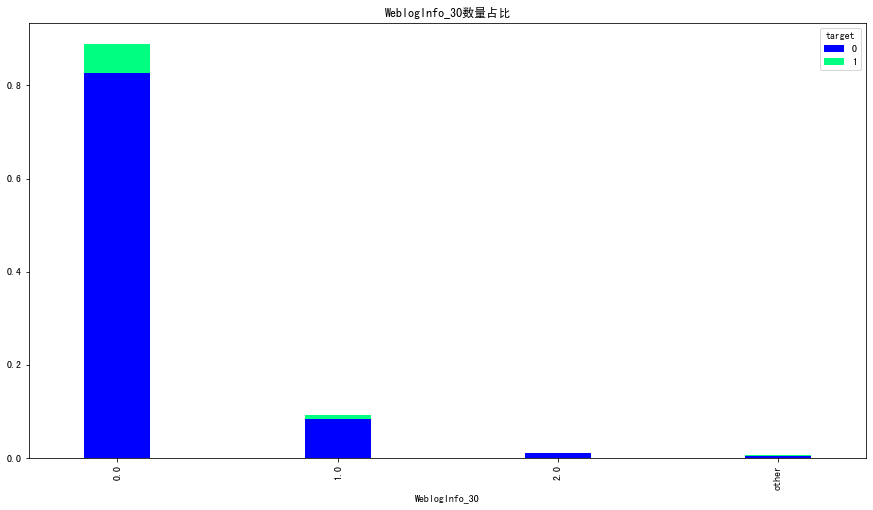

<Figure size 2880x2160 with 0 Axes>

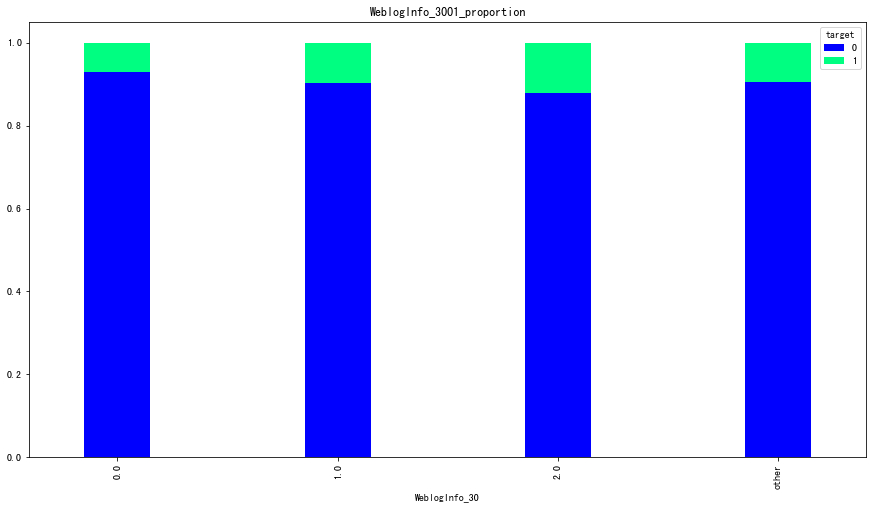

target            0     1    sum
WeblogInfo_39                   
0.0           0.851 0.065  27477
1.0           0.065 0.007   2154
other         0.011 0.001    369


<Figure size 2880x2160 with 0 Axes>

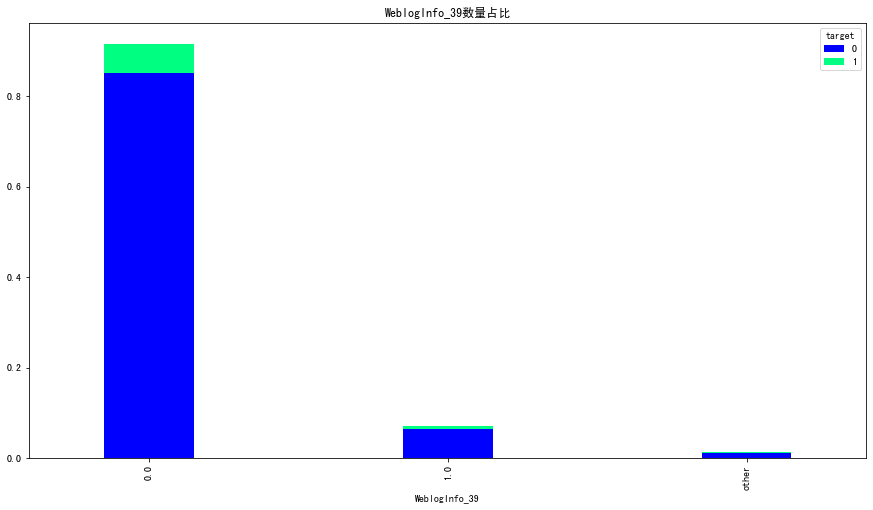

<Figure size 2880x2160 with 0 Axes>

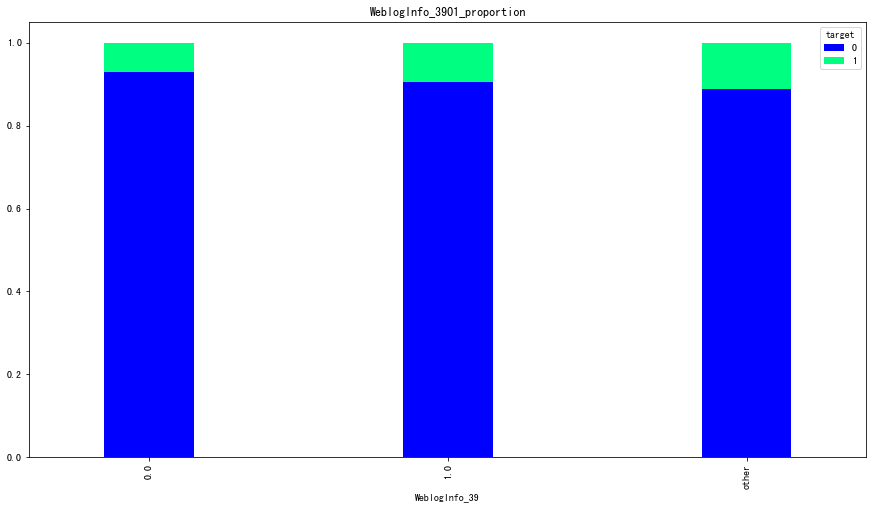

In [45]:
webinfo_categoty(str_webinfo)

target           0     1       sum
WeblogInfo_4                      
0.000        0.051 0.004  1651.000
1.000        0.313 0.021 10023.000
2.000        0.231 0.014  7356.000
3.000        0.127 0.010  4110.000
4.000        0.069 0.006  2259.000
5.000        0.040 0.005  1359.000
6.000        0.026 0.003   854.000
7.000        0.017 0.002   573.000
8.000        0.012 0.002   394.000
9.000        0.008 0.001   283.000
10.000       0.006 0.001   230.000
11.000       0.005 0.001   174.000
12.000       0.003 0.001   128.000
13.000       0.003 0.000    98.000
14.000       0.002 0.001    89.000
15.000       0.002 0.000    62.000
16.000       0.002 0.000    52.000
17.000       0.001 0.000    46.000
18.000       0.001 0.000    26.000
19.000       0.001 0.000    27.000
20.000       0.001 0.000    34.000
21.000       0.001 0.000    21.000
22.000       0.000 0.000    17.000
23.000       0.001 0.000    20.000
24.000       0.000 0.000    10.000
25.000       0.000 0.000    12.000
26.000       0.000  

<Figure size 2880x2160 with 0 Axes>

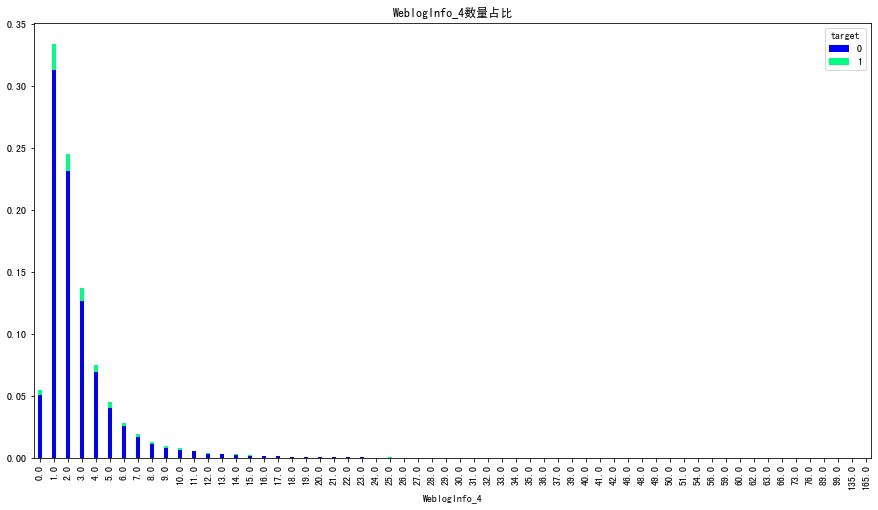

<Figure size 2880x2160 with 0 Axes>

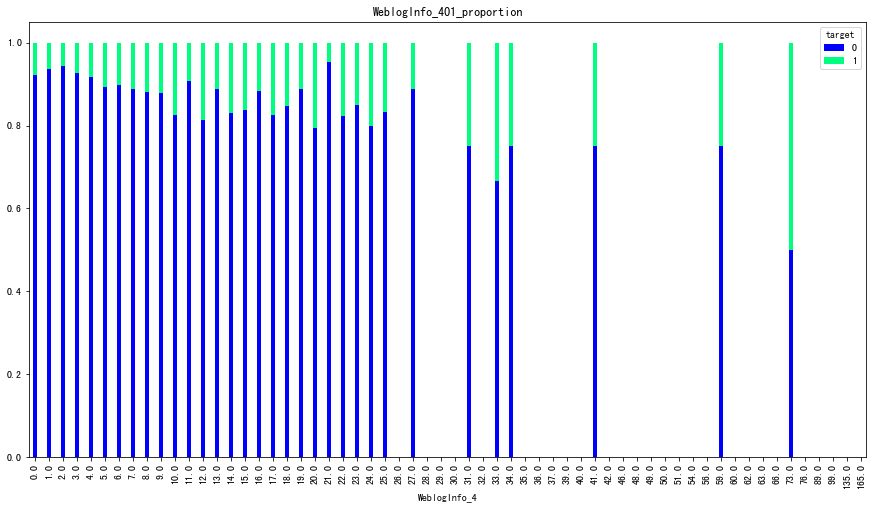

target           0     1       sum
WeblogInfo_5                      
0.000        0.051 0.004  1651.000
1.000        0.501 0.036 16103.000
2.000        0.230 0.018  7432.000
3.000        0.080 0.008  2622.000
4.000        0.031 0.003  1026.000
5.000        0.014 0.002   464.000
6.000        0.007 0.001   245.000
7.000        0.004 0.001   147.000
8.000        0.003 0.000    90.000
9.000        0.001 0.000    46.000
10.000       0.001 0.000    42.000
11.000       0.001 0.000    31.000
12.000       0.001 0.000    21.000
13.000       0.000 0.000    10.000
14.000       0.000 0.000    12.000
15.000       0.000 0.000     8.000
16.000       0.000 0.000    10.000
17.000       0.000 0.000    10.000
18.000       0.000   nan       nan
19.000       0.000   nan       nan
20.000       0.000 0.000     4.000
21.000       0.000   nan       nan
23.000       0.000   nan       nan
24.000       0.000   nan       nan
25.000       0.000   nan       nan
26.000         nan 0.000       nan
28.000       0.000  

<Figure size 2880x2160 with 0 Axes>

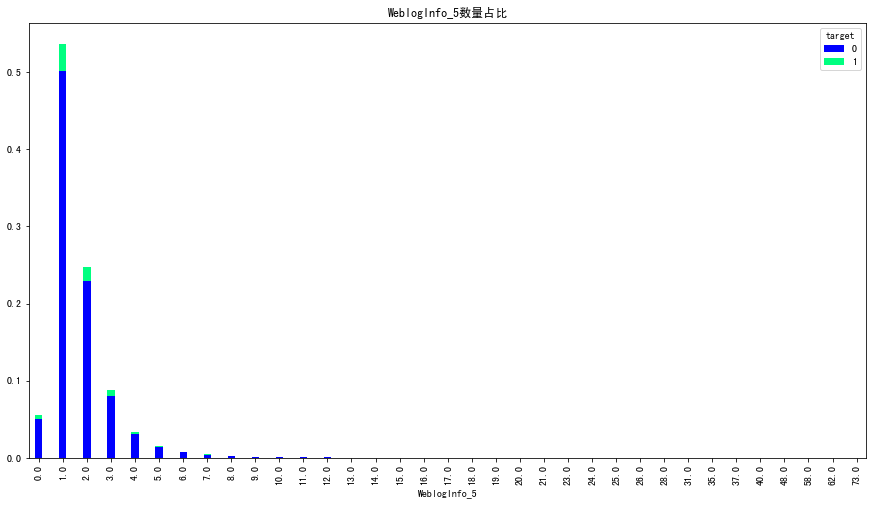

<Figure size 2880x2160 with 0 Axes>

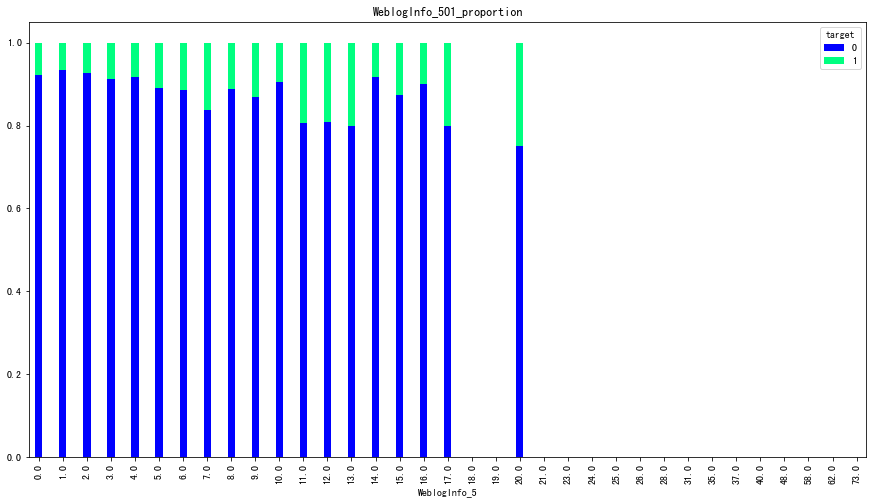

target           0     1       sum
WeblogInfo_6                      
0.000        0.051 0.004  1651.000
1.000        0.347 0.023 11088.000
2.000        0.215 0.013  6857.000
3.000        0.116 0.009  3770.000
4.000        0.066 0.006  2154.000
5.000        0.039 0.005  1300.000
6.000        0.025 0.003   827.000
7.000        0.017 0.002   563.000
8.000        0.011 0.002   385.000
9.000        0.008 0.001   281.000
10.000       0.006 0.001   226.000
11.000       0.005 0.001   170.000
12.000       0.003 0.001   127.000
13.000       0.003 0.000    96.000
14.000       0.003 0.001    90.000
15.000       0.002 0.000    63.000
16.000       0.002 0.000    51.000
17.000       0.001 0.000    44.000
18.000       0.001 0.000    26.000
19.000       0.001 0.000    27.000
20.000       0.001 0.000    34.000
21.000       0.001 0.000    20.000
22.000       0.000 0.000    17.000
23.000       0.001 0.000    19.000
24.000       0.000 0.000    10.000
25.000       0.000 0.000    12.000
26.000       0.000  

<Figure size 2880x2160 with 0 Axes>

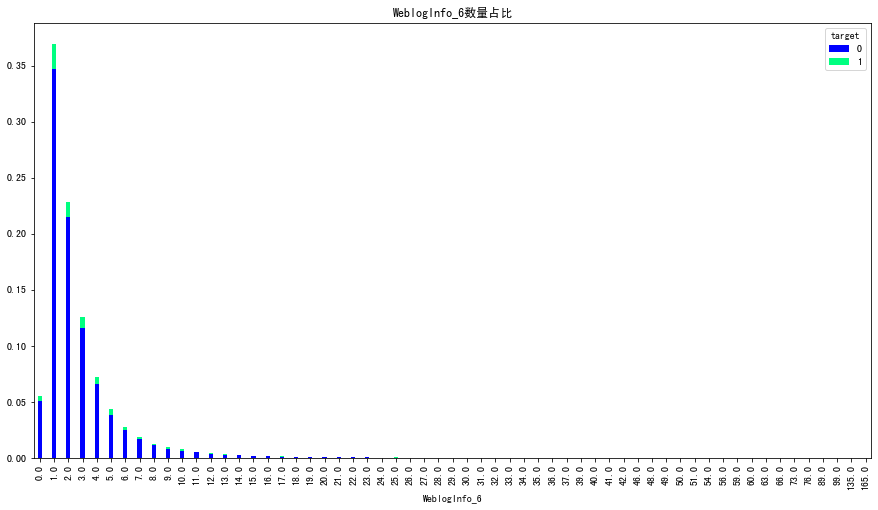

<Figure size 2880x2160 with 0 Axes>

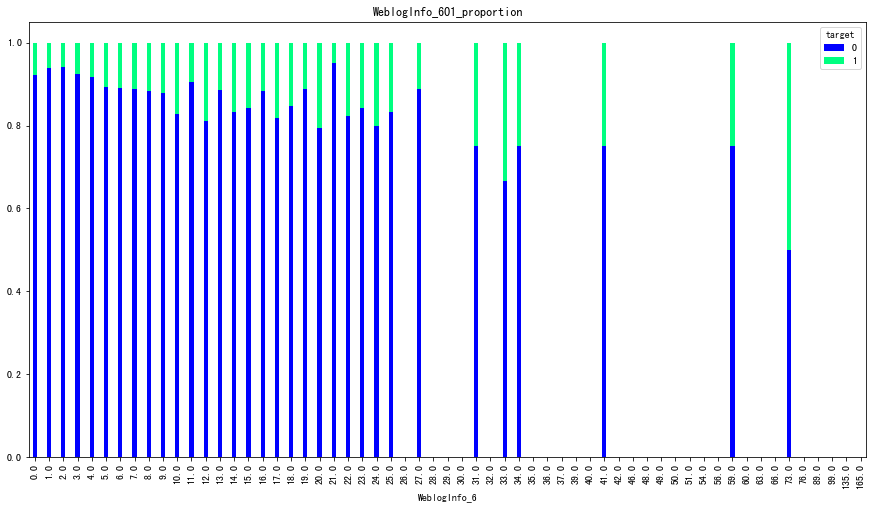

target           0     1      sum
WeblogInfo_7                     
0.000        0.095 0.010 3136.000
1.000        0.061 0.003 1931.000
2.000        0.096 0.008 3126.000
3.000        0.074 0.005 2354.000
4.000        0.067 0.004 2129.000
...            ...   ...      ...
334.000      0.000   nan      nan
342.000        nan 0.000      nan
399.000      0.000   nan      nan
448.000      0.000   nan      nan
722.000      0.000   nan      nan

[168 rows x 3 columns]


<Figure size 2880x2160 with 0 Axes>

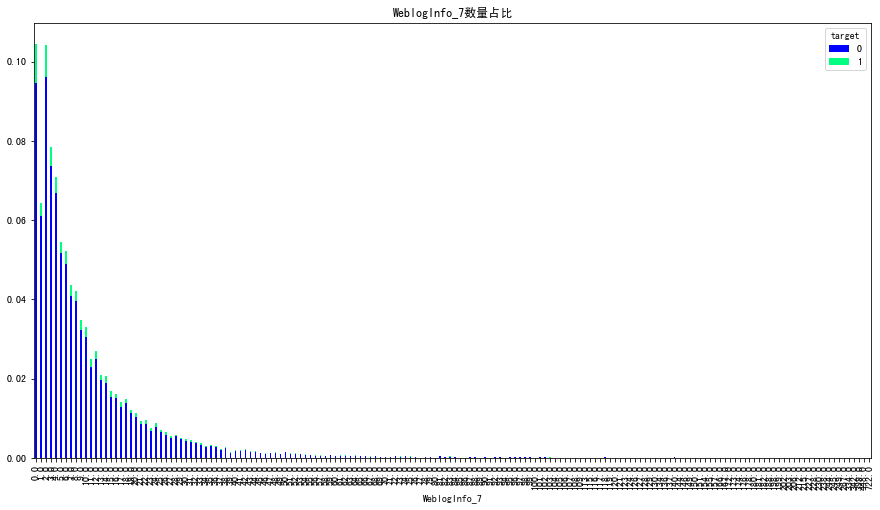

<Figure size 2880x2160 with 0 Axes>

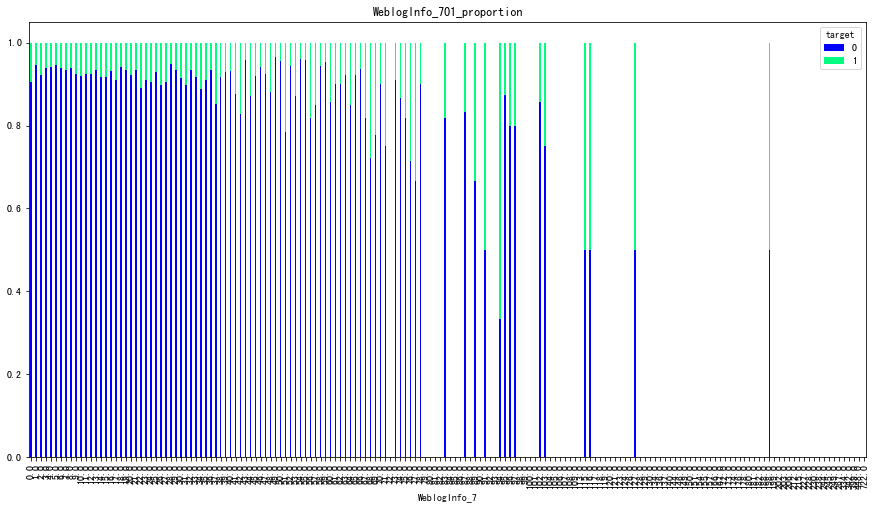

target           0     1       sum
WeblogInfo_8                      
0.000        0.809 0.063 26171.000
1.000        0.022 0.002   700.000
2.000        0.022 0.002   696.000
3.000        0.016 0.001   531.000
4.000        0.013 0.001   415.000
5.000        0.009 0.001   295.000
6.000        0.009 0.001   282.000
7.000        0.005 0.001   163.000
8.000        0.004 0.001   141.000
9.000        0.003 0.000   111.000
10.000       0.002 0.000    78.000
11.000       0.002 0.000    78.000
12.000       0.002 0.000    62.000
13.000       0.001 0.000    37.000
14.000       0.001 0.000    34.000
15.000       0.001 0.000    23.000
16.000       0.001 0.000    30.000
17.000       0.001 0.000    24.000
18.000       0.001 0.000    16.000
19.000       0.000 0.000    15.000
20.000       0.000   nan       nan
21.000       0.000   nan       nan
22.000       0.000 0.000    13.000
23.000       0.000 0.000    10.000
24.000       0.000   nan       nan
25.000       0.000   nan       nan
26.000       0.000  

<Figure size 2880x2160 with 0 Axes>

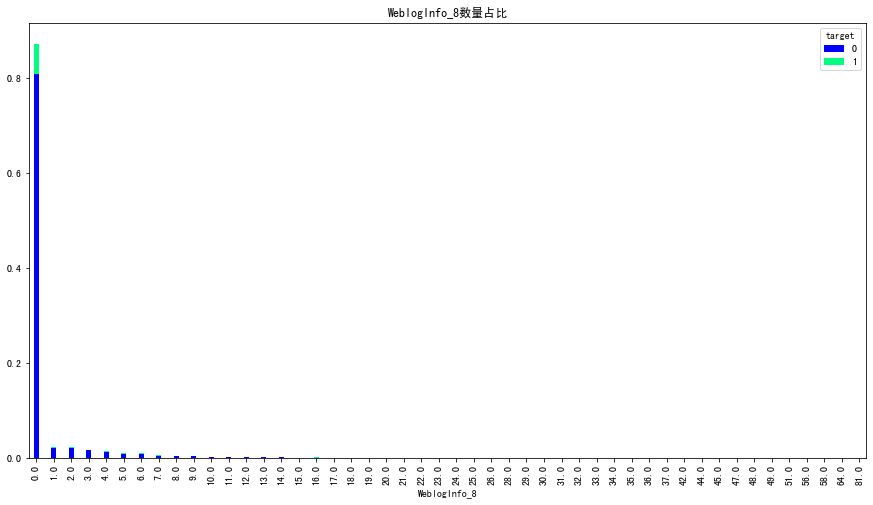

<Figure size 2880x2160 with 0 Axes>

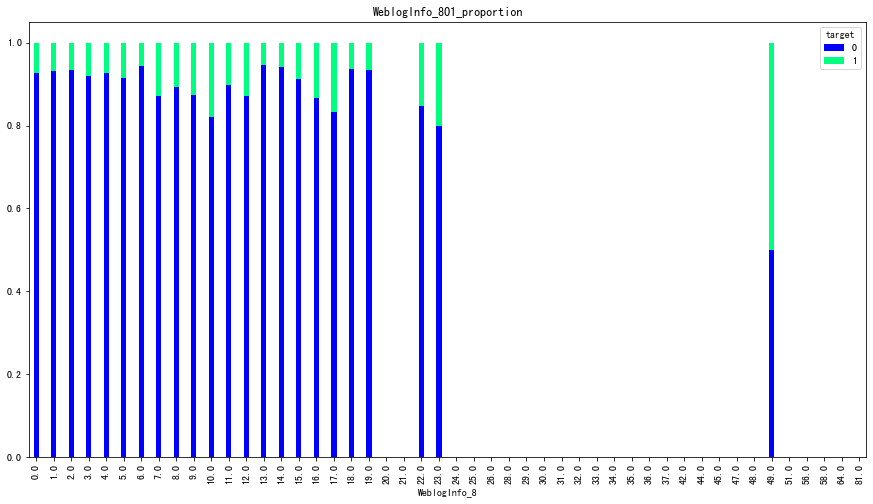

target            0     1       sum
WeblogInfo_14                      
0.000         0.835 0.066 27036.000
1.000         0.018 0.001   556.000
2.000         0.011 0.001   364.000
3.000         0.009 0.000   282.000
4.000         0.008 0.001   252.000
...             ...   ...       ...
103.000       0.000   nan       nan
127.000       0.000   nan       nan
132.000       0.000   nan       nan
139.000         nan 0.000       nan
335.000       0.000   nan       nan

[63 rows x 3 columns]


<Figure size 2880x2160 with 0 Axes>

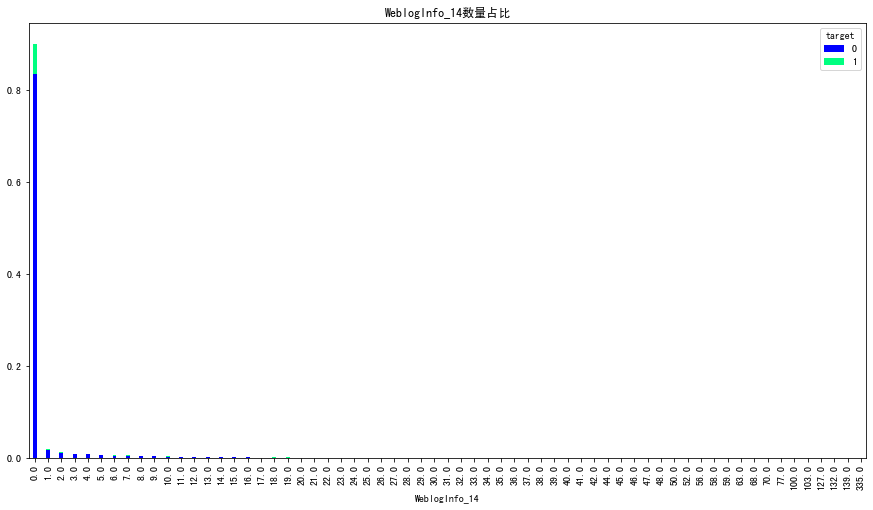

<Figure size 2880x2160 with 0 Axes>

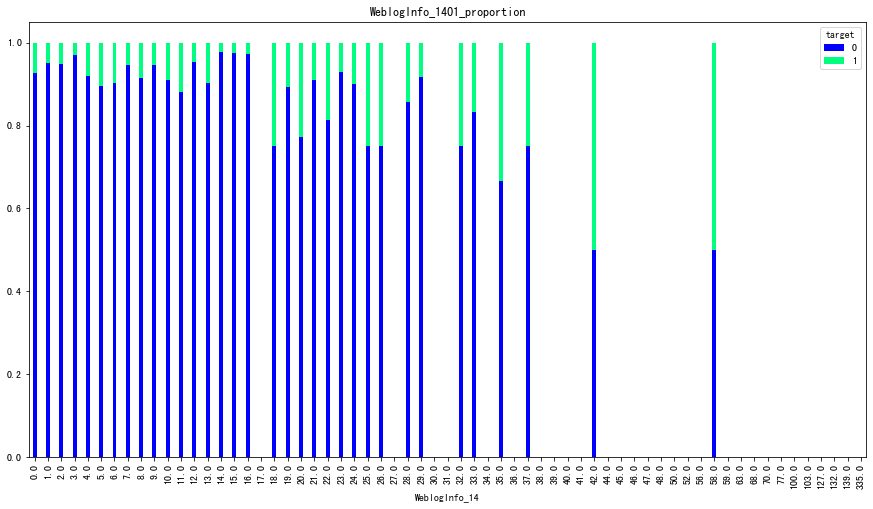

target            0     1       sum
WeblogInfo_15                      
0.000         0.659 0.046 21159.000
1.000         0.084 0.007  2750.000
2.000         0.075 0.007  2472.000
3.000         0.033 0.003  1078.000
4.000         0.023 0.003   767.000
5.000         0.012 0.001   381.000
6.000         0.010 0.001   347.000
7.000         0.006 0.001   209.000
8.000         0.005 0.001   184.000
9.000         0.003 0.000   110.000
10.000        0.003 0.000   114.000
11.000        0.002 0.000    62.000
12.000        0.002 0.000    73.000
13.000        0.001 0.000    38.000
14.000        0.001 0.000    42.000
15.000        0.001 0.000    27.000
16.000        0.001 0.000    31.000
17.000        0.001 0.000    21.000
18.000        0.001 0.000    21.000
19.000        0.000 0.000    13.000
20.000        0.000 0.000    13.000
21.000        0.000 0.000    10.000
22.000        0.000 0.000     9.000
23.000        0.000 0.000     6.000
24.000        0.000   nan       nan
25.000        0.000   nan   

<Figure size 2880x2160 with 0 Axes>

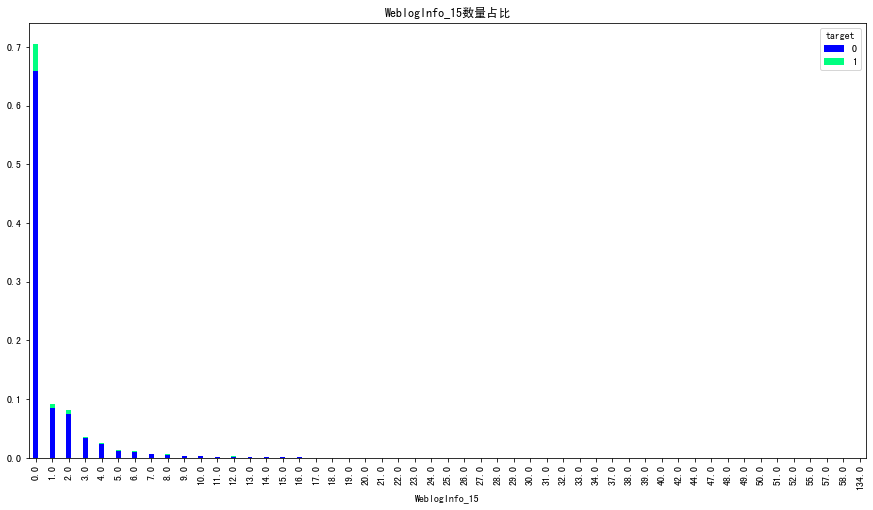

<Figure size 2880x2160 with 0 Axes>

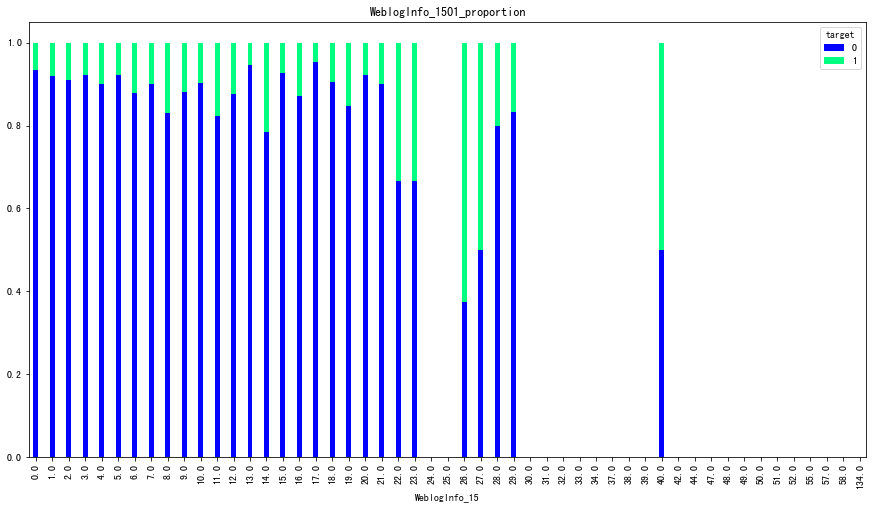

target            0     1       sum
WeblogInfo_16                      
0.000         0.389 0.032 12622.000
1.000         0.119 0.009  3829.000
2.000         0.127 0.009  4090.000
3.000         0.065 0.005  2113.000
4.000         0.057 0.004  1845.000
...             ...   ...       ...
96.000        0.000   nan       nan
97.000        0.000   nan       nan
117.000       0.000   nan       nan
167.000       0.000   nan       nan
182.000       0.000   nan       nan

[65 rows x 3 columns]


<Figure size 2880x2160 with 0 Axes>

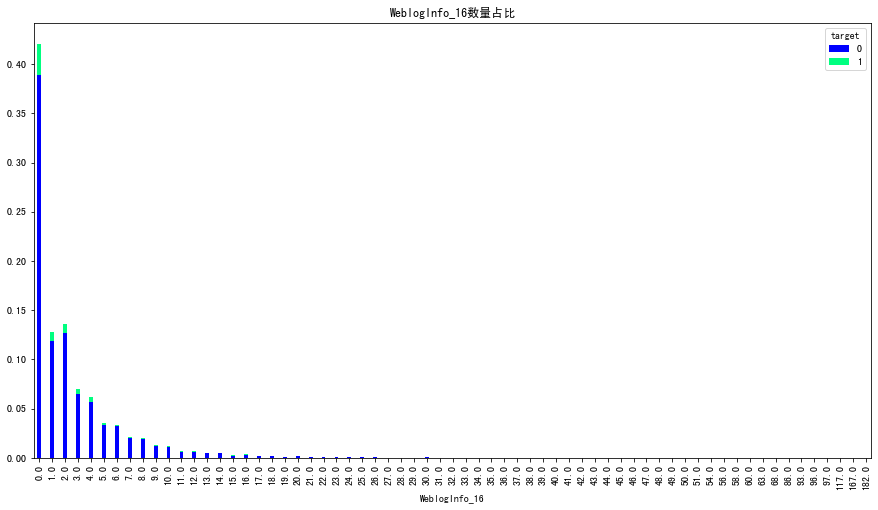

<Figure size 2880x2160 with 0 Axes>

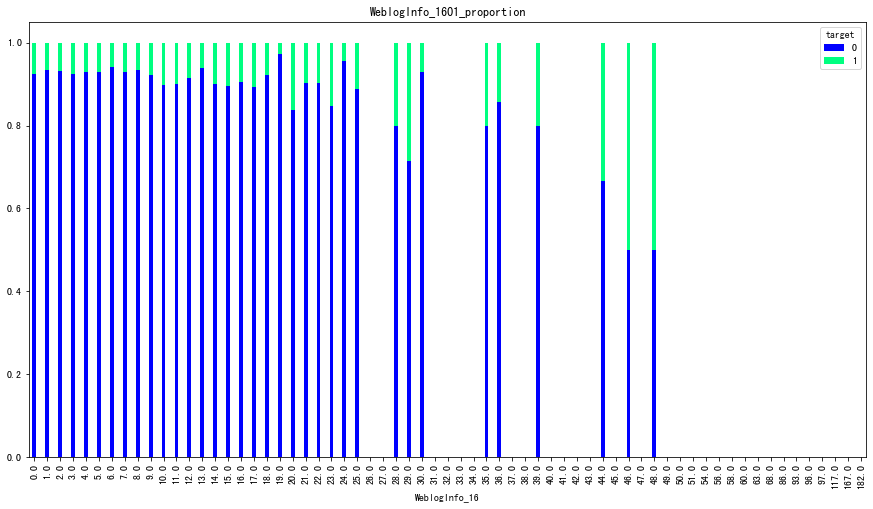

target            0     1      sum
WeblogInfo_17                     
0.000         0.218 0.019 7114.000
1.000         0.094 0.006 2989.000
2.000         0.121 0.009 3908.000
3.000         0.081 0.005 2591.000
4.000         0.074 0.004 2351.000
...             ...   ...      ...
145.000       0.000   nan      nan
156.000         nan 0.000      nan
167.000       0.000   nan      nan
184.000       0.000   nan      nan
356.000       0.000   nan      nan

[104 rows x 3 columns]


<Figure size 2880x2160 with 0 Axes>

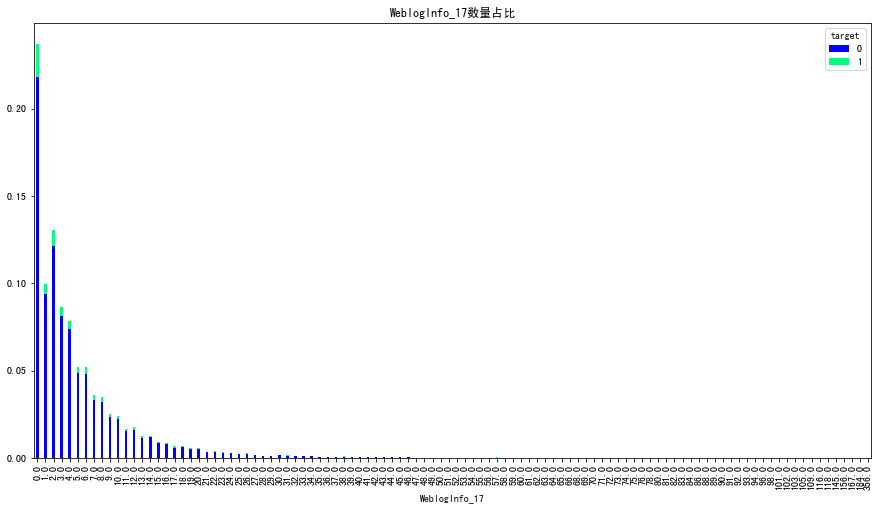

<Figure size 2880x2160 with 0 Axes>

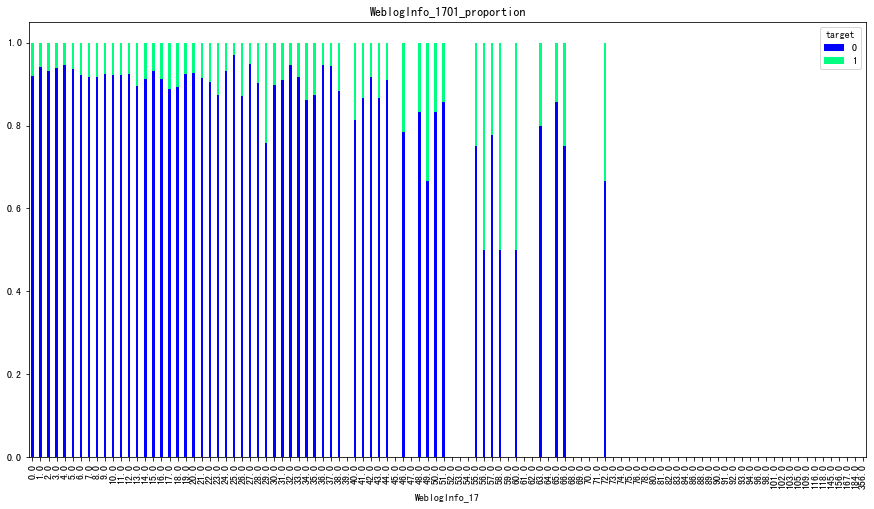

target            0     1       sum
WeblogInfo_18                      
0.000         0.518 0.042 16779.000
1.000         0.111 0.009  3586.000
2.000         0.110 0.009  3563.000
3.000         0.050 0.004  1614.000
4.000         0.041 0.003  1331.000
5.000         0.021 0.002   701.000
6.000         0.020 0.002   643.000
7.000         0.011 0.001   357.000
8.000         0.011 0.001   339.000
9.000         0.006 0.001   205.000
10.000        0.007 0.000   206.000
11.000        0.003 0.000   105.000
12.000        0.002 0.000    80.000
13.000        0.002 0.000    67.000
14.000        0.002 0.000    77.000
15.000        0.002 0.000    52.000
16.000        0.002 0.000    53.000
17.000        0.001 0.000    32.000
18.000        0.001 0.000    28.000
19.000        0.000 0.000    19.000
20.000        0.001 0.000    20.000
21.000        0.001 0.000    17.000
22.000        0.001   nan       nan
23.000        0.000 0.000    13.000
24.000        0.000   nan       nan
25.000        0.000 0.000   

<Figure size 2880x2160 with 0 Axes>

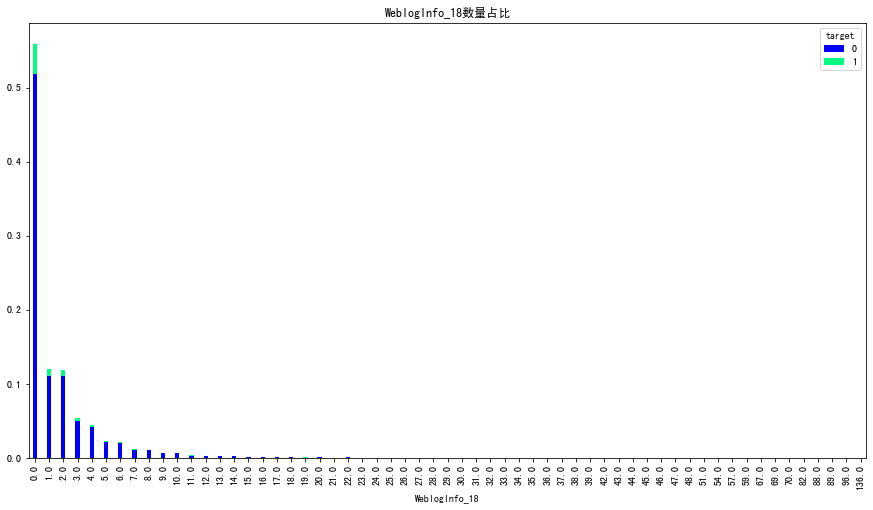

<Figure size 2880x2160 with 0 Axes>

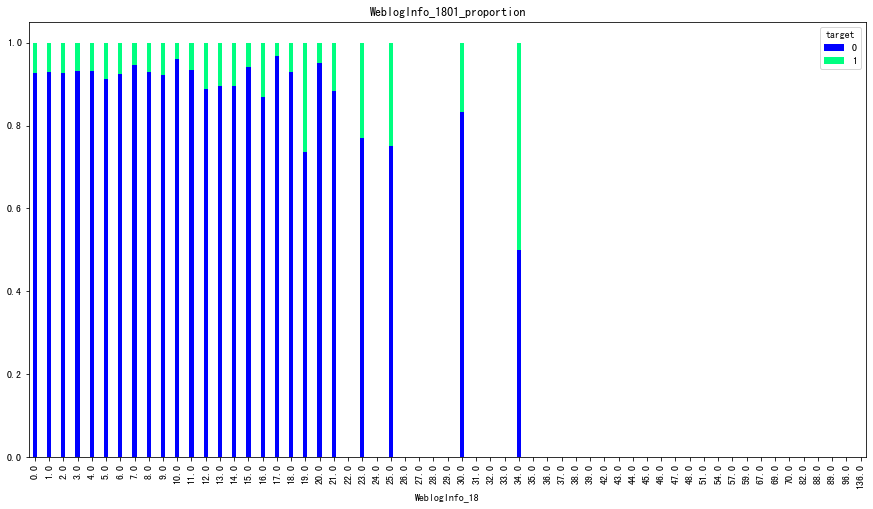

target            0     1       sum
WeblogInfo_24                      
0.000         0.826 0.064 26707.000
1.000         0.033 0.003  1063.000
2.000         0.015 0.002   502.000
3.000         0.020 0.002   660.000
4.000         0.010 0.001   321.000
5.000         0.006 0.001   206.000
6.000         0.006 0.001   214.000
7.000         0.003 0.000    97.000
8.000         0.002 0.000    67.000
9.000         0.002 0.000    66.000
10.000        0.001 0.000    40.000
11.000        0.000 0.000    16.000
12.000        0.000 0.000    11.000
13.000        0.000 0.000    15.000
14.000        0.000 0.000     7.000
15.000        0.000   nan       nan
16.000        0.000   nan       nan
17.000        0.000   nan       nan
19.000        0.000   nan       nan
21.000          nan 0.000       nan


<Figure size 2880x2160 with 0 Axes>

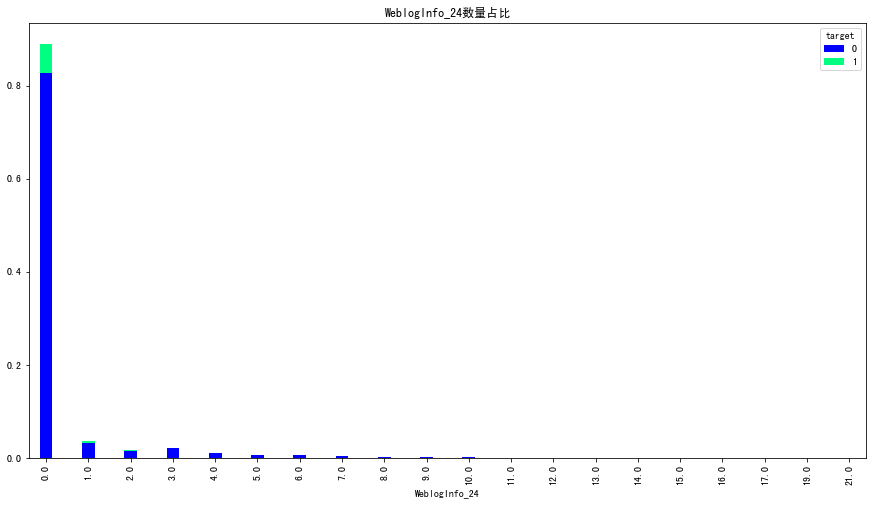

<Figure size 2880x2160 with 0 Axes>

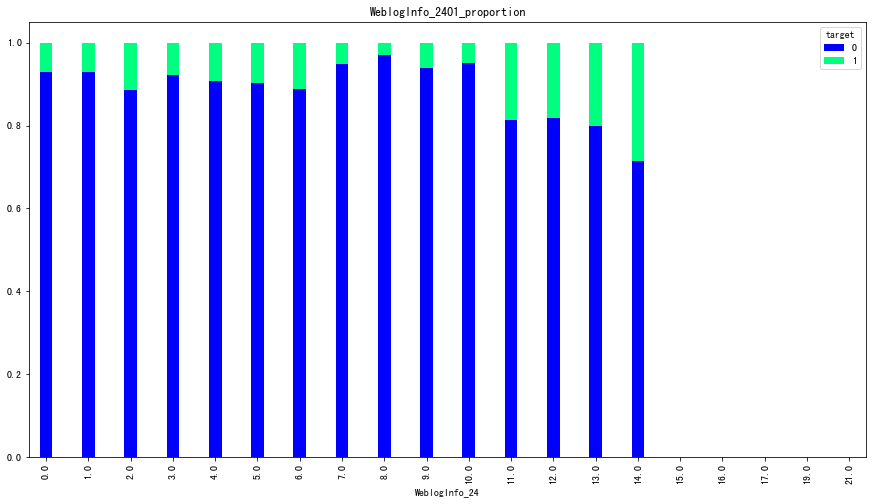

target            0     1       sum
WeblogInfo_27                      
0.000         0.817 0.064 26437.000
1.000         0.066 0.005  2123.000
2.000         0.019 0.002   613.000
3.000         0.010 0.001   311.000
4.000         0.006 0.001   199.000
5.000         0.004 0.001   147.000
6.000         0.002 0.000    71.000
7.000         0.001 0.000    49.000
8.000         0.001 0.000    23.000
9.000         0.000 0.000     6.000
10.000        0.000 0.000     6.000
11.000        0.000   nan       nan
12.000        0.000   nan       nan
13.000        0.000   nan       nan
14.000        0.000   nan       nan
15.000        0.000   nan       nan
16.000        0.000   nan       nan
18.000        0.000   nan       nan
23.000        0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

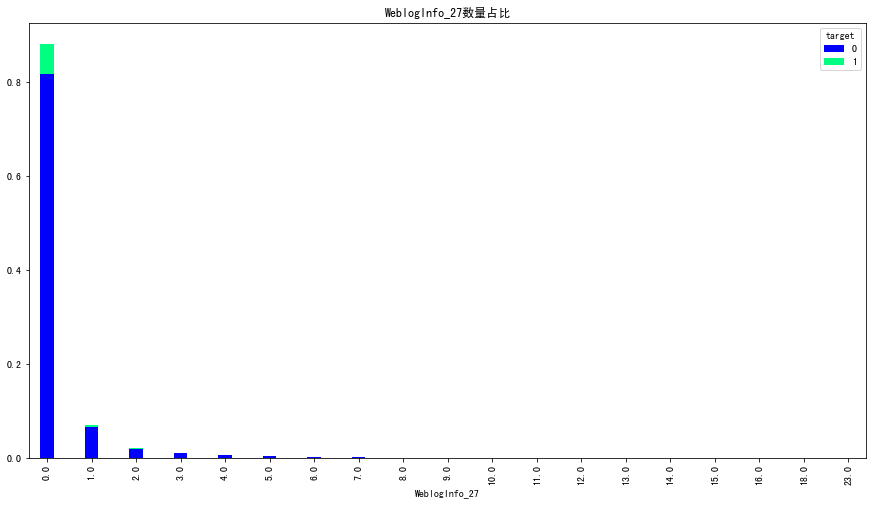

<Figure size 2880x2160 with 0 Axes>

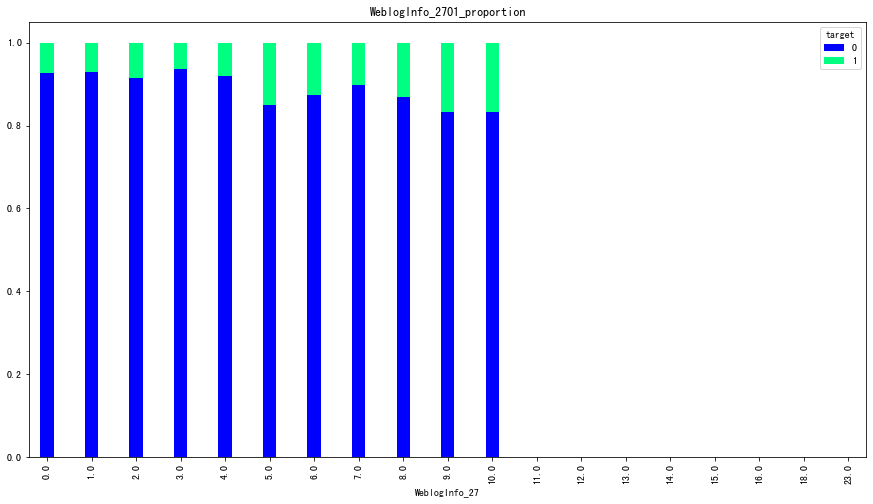

target            0     1       sum
WeblogInfo_33                      
0.000         0.837 0.065 27057.000
1.000         0.030 0.002   966.000
2.000         0.014 0.002   463.000
3.000         0.019 0.002   626.000
4.000         0.009 0.001   287.000
5.000         0.005 0.001   174.000
6.000         0.006 0.001   189.000
7.000         0.002 0.000    77.000
8.000         0.002 0.000    50.000
9.000         0.002 0.000    55.000
10.000        0.001 0.000    26.000
11.000        0.000 0.000    10.000
12.000        0.000 0.000     5.000
13.000        0.000   nan       nan
14.000        0.000 0.000     4.000
15.000        0.000   nan       nan
19.000        0.000   nan       nan
21.000          nan 0.000       nan


<Figure size 2880x2160 with 0 Axes>

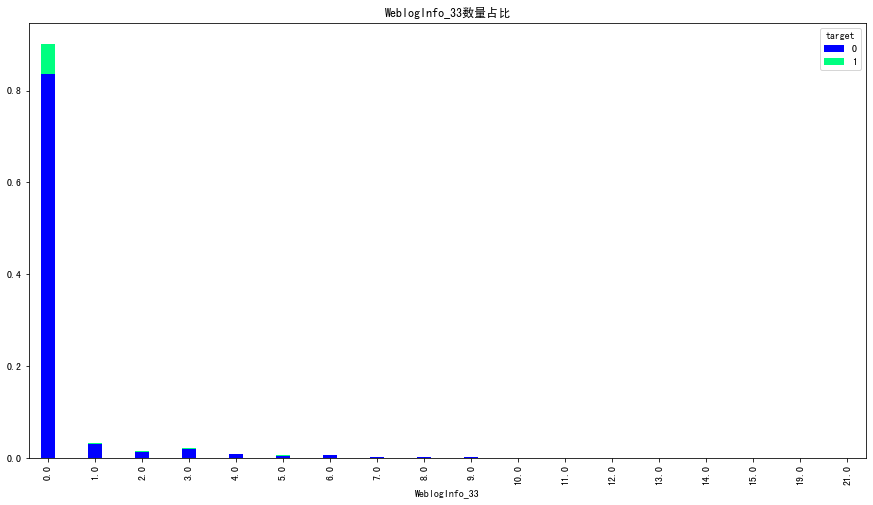

<Figure size 2880x2160 with 0 Axes>

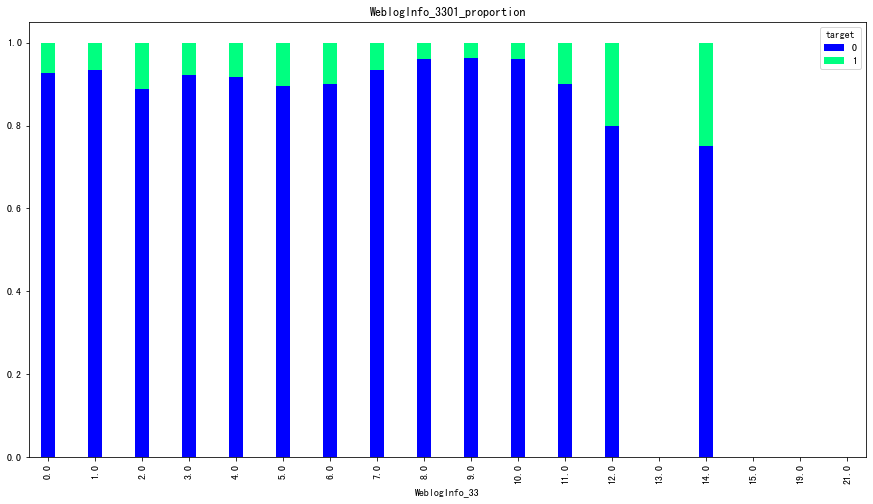

target            0     1       sum
WeblogInfo_36                      
0.000         0.833 0.066 26961.000
1.000         0.058 0.005  1880.000
2.000         0.016 0.001   522.000
3.000         0.008 0.001   245.000
4.000         0.005 0.000   160.000
5.000         0.003 0.001   114.000
6.000         0.002 0.000    51.000
7.000         0.001 0.000    35.000
8.000         0.000 0.000    15.000
9.000         0.000 0.000     6.000
10.000        0.000 0.000     3.000
11.000        0.000   nan       nan
12.000        0.000   nan       nan
13.000        0.000   nan       nan
14.000        0.000   nan       nan
15.000        0.000   nan       nan
23.000        0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

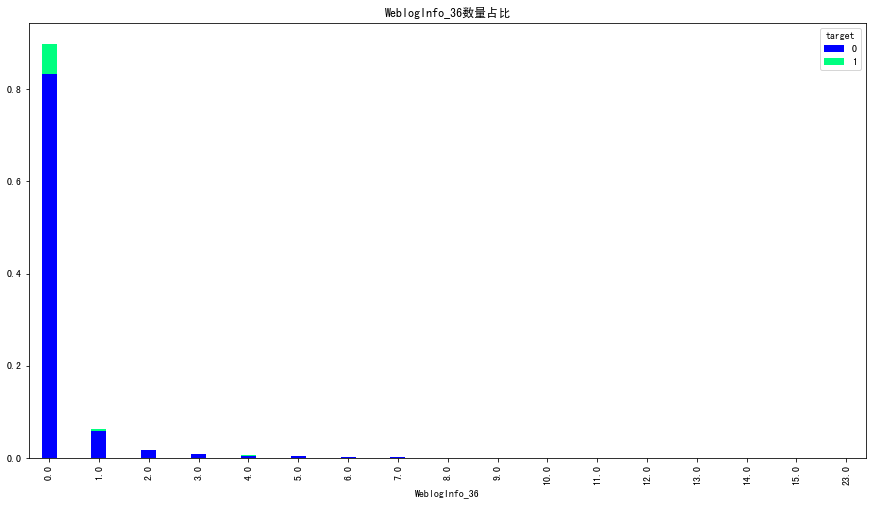

<Figure size 2880x2160 with 0 Axes>

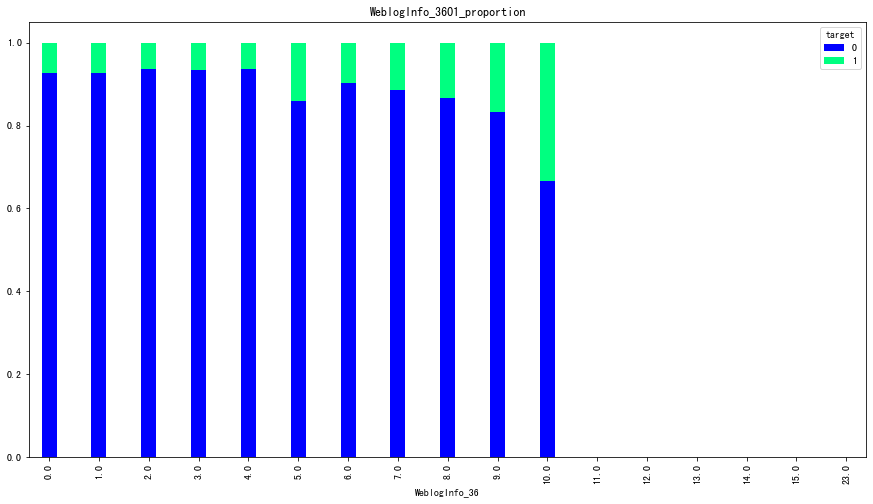

In [46]:
# for feature in str_webinfo:
#     webloginfo_numlist_new.remove(feature)
# data.head(30)
def outlier(handle_data):
    hdata=np.array(handle_data)
    median_data=np.median(hdata)
    q1=0.25*(len(hdata)+1)
    q3=0.75*(len(hdata)+1)
    iqr=q3-q1
    outlier=q3+1.5*iqr
    handle_data=np.where(handle_data>outlier,outlier,handle_data)
    return handle_data
for feature in str_webinfo:
    webloginfo_numlist_new.remove(feature)
for feature in webloginfo_numlist_new:
    data[feature]=outlier(data[feature])
handle_list(webloginfo_numlist_new,title='WeblogInfo_')

In [47]:
webloginfo_num2cat_handle = ['WeblogInfo_5', 'WeblogInfo_24', 'WeblogInfo_27', 
                             'WeblogInfo_33', 'WeblogInfo_36']
for feature in webloginfo_num2cat_handle:
    data[feature]=data[feature].astype(str)

In [48]:
web_dum_list=['WeblogInfo_2', 'WeblogInfo_5', 'WeblogInfo_19', 'WeblogInfo_20', 'WeblogInfo_21', 
                   'WeblogInfo_24', 'WeblogInfo_27', 'WeblogInfo_30', 'WeblogInfo_33', 'WeblogInfo_36', 
                   'WeblogInfo_39']
data=pd.get_dummies(data, columns=web_dum_list)
data.head()

Idx  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0  10001         1.000         1.000        14.000         0.000   
1  10002         1.000         1.000        14.000         0.000   
2  10003         2.000         2.000         9.000         3.000   
3  10006         0.000         0.000         2.000         0.000   
4  10007         1.000         1.000         3.000         0.000   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0          6.000          6.000          0.000          6.000          2.000   
1          0.000          0.000          7.000          7.000          0.000   
2          0.000          0.000          3.000          4.000          2.000   
3          0.000          0.000          0.000          2.000          0.000   
4          0.000          0.000          0.000          3.000          0.000   

   UserInfo_18  Education_Info1 Education_Info2 Education_Info3  \
0           29                0               E               E   
1           28                0               E               E   
2           32                0               E               E   
3           33                0               E               E   
4           43                0               E               E   

  Education_Info4  Education_Info5 Education_Info6 Education_Info7  \
0               E                0               E               E   
1               E                0               E               E   
2               E                0               E               E   
3               E                0               E               E   
4               E                0               E               E   

  Education_Info8  ThirdParty_Info_Period1_1  ThirdParty_Info_Period1_2  \
0               E                         10                         47   
1               E                          0                          0   
2               E                          1                          2   
3               E                          9                         54   
4               E                          1                          5   

   ThirdParty_Info_Period1_3  ThirdParty_Info_Period1_4  \
0                        167                          0   
1                         68                        105   
2                         50                         50   
3                         56                        125   
4                         39                         34   

   ThirdParty_Info_Period1_5  ThirdParty_Info_Period1_6  \
0                         25                         65   
1                         40                          2   
2                         49                          0   
3                         38                          0   
4                         36                         73   

   ThirdParty_Info_Period1_7  ThirdParty_Info_Period1_8  \
0                         68                         34   
1                        132                         39   
2                         78                         22   
3                        136                         45   
4                          0                          0   

   ThirdParty_Info_Period1_9  ThirdParty_Info_Period1_10  \
0                          2                           1   
1                          2                           1   
2                          0                           0   
3                          2                           1   
4                          1                           1   

   ThirdParty_Info_Period1_11  ThirdParty_Info_Period1_12  \
0                          10                          63   
1                           8                           0   
2                           7                           0   
3                           9                           0   
4                           5                           0   

   ThirdParty_Info_Period1_13  ThirdParty_Info_

In [49]:
education_infonum_list=['Education_Info1','Education_Info5']
education_infocategory_list=[]
education_infocategory_list.extend(combine('Education_Info',2,4))
education_infocategory_list.extend(combine('Education_Info',6,8))

target              0     1    sum
Education_Info1                   
0               0.865 0.072  28110
1               0.061 0.002   1890


<Figure size 2880x2160 with 0 Axes>

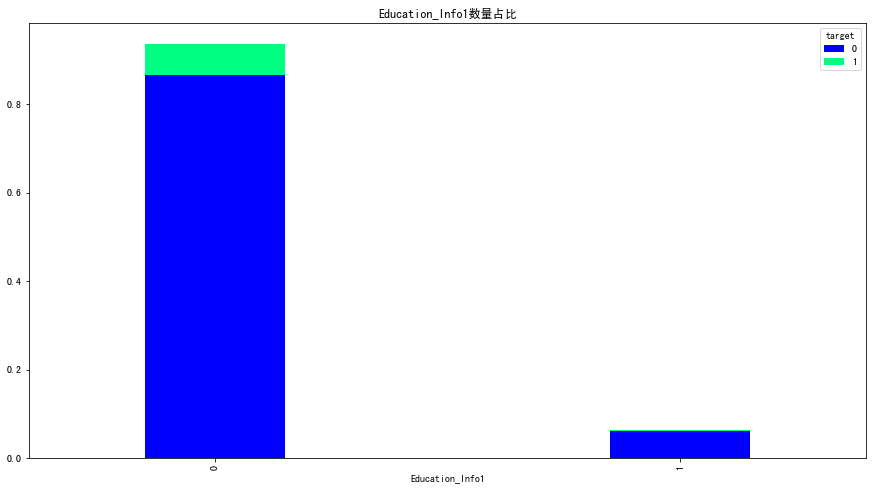

<Figure size 2880x2160 with 0 Axes>

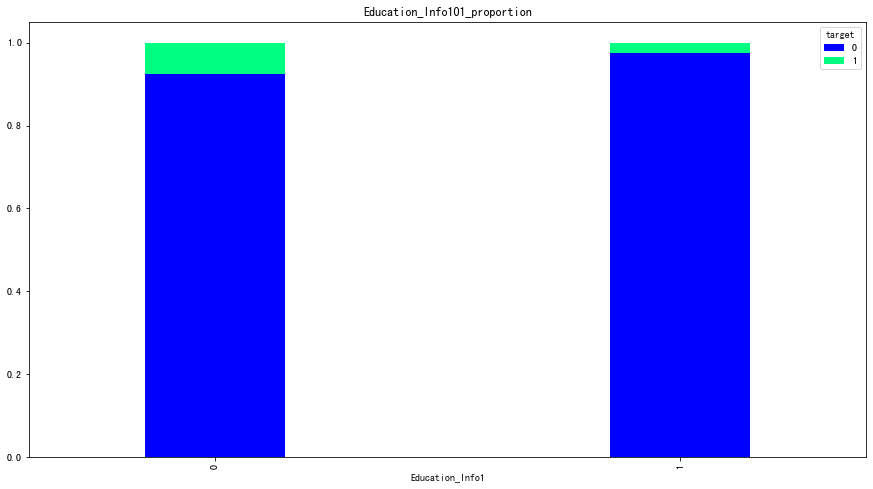

target              0     1    sum
Education_Info5                   
0               0.895 0.073  29026
1               0.032 0.001    974


<Figure size 2880x2160 with 0 Axes>

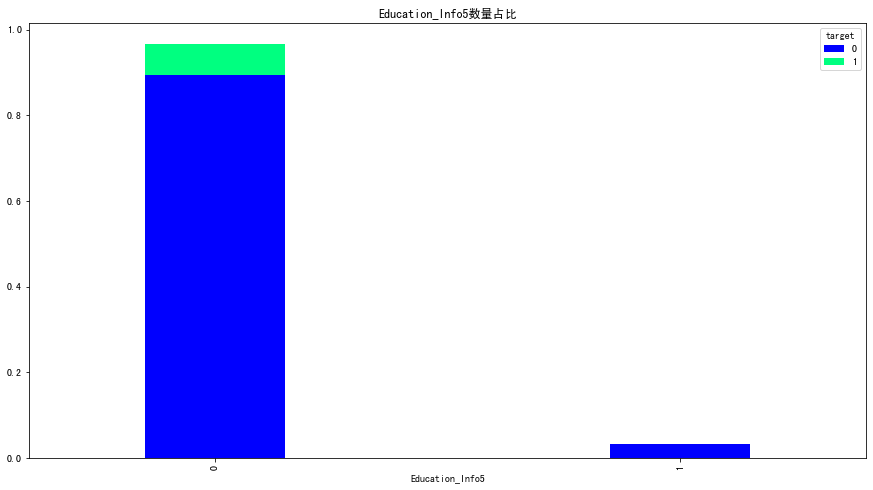

<Figure size 2880x2160 with 0 Axes>

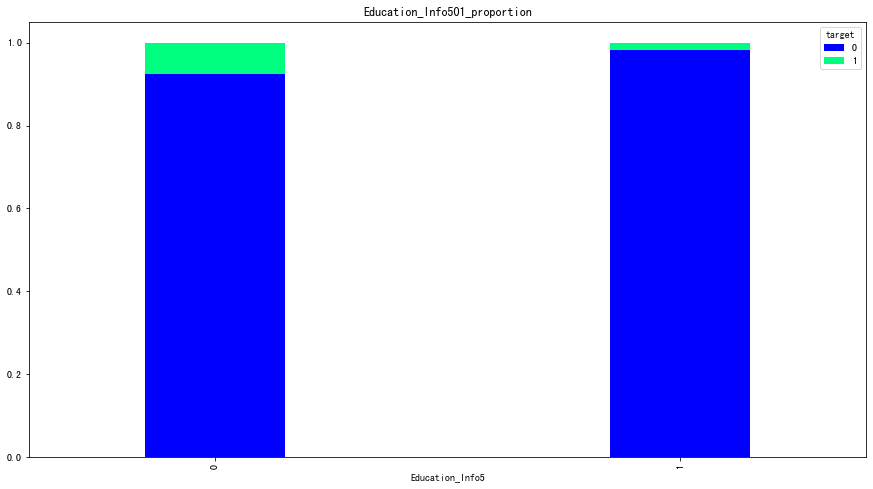

target              0     1       sum
Education_Info2                      
A               0.031 0.001   957.000
AM              0.023 0.001   706.000
AN              0.002 0.000    75.000
AQ              0.003 0.000   103.000
B               0.000   nan       nan
E               0.865 0.072 28110.000
U               0.001 0.000    44.000


<Figure size 2880x2160 with 0 Axes>

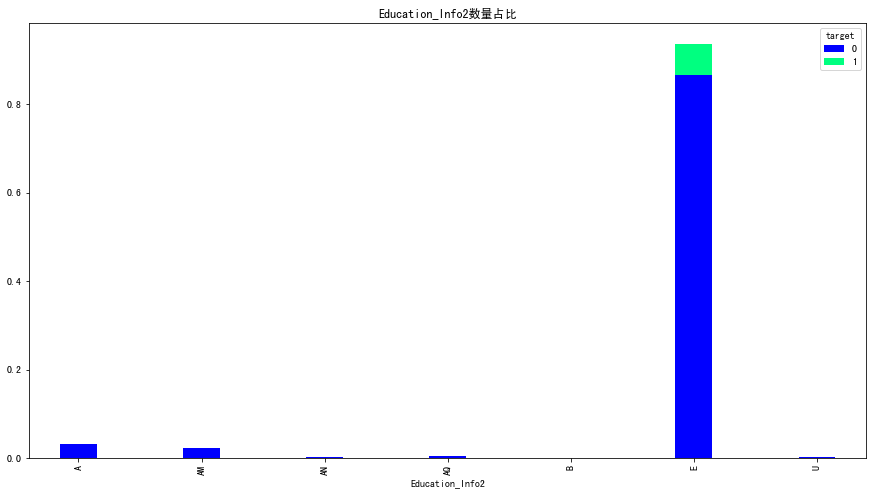

<Figure size 2880x2160 with 0 Axes>

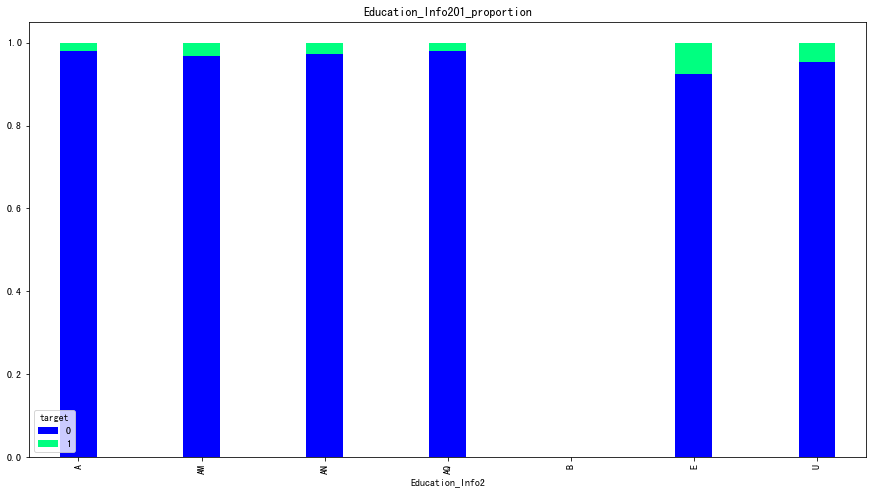

target              0     1       sum
Education_Info3                      
E               0.865 0.072 28110.000
毕业              0.060 0.002  1837.000
结业              0.002   nan       nan


<Figure size 2880x2160 with 0 Axes>

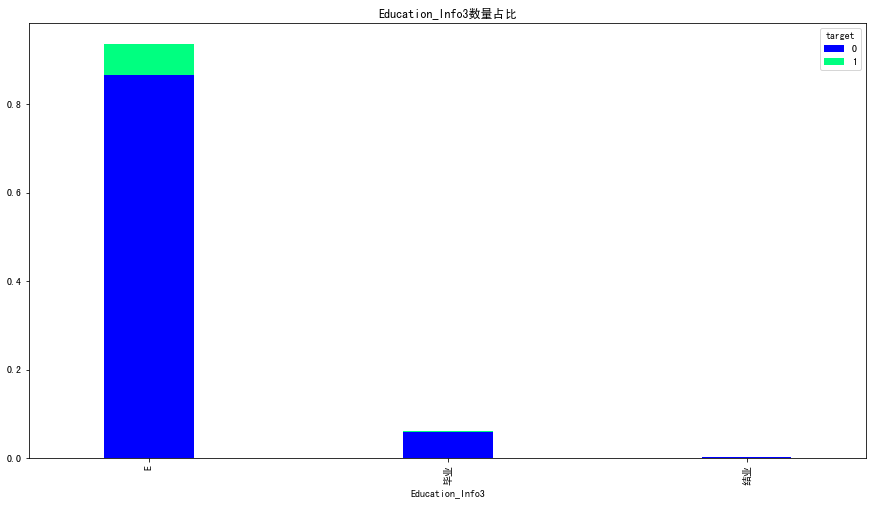

<Figure size 2880x2160 with 0 Axes>

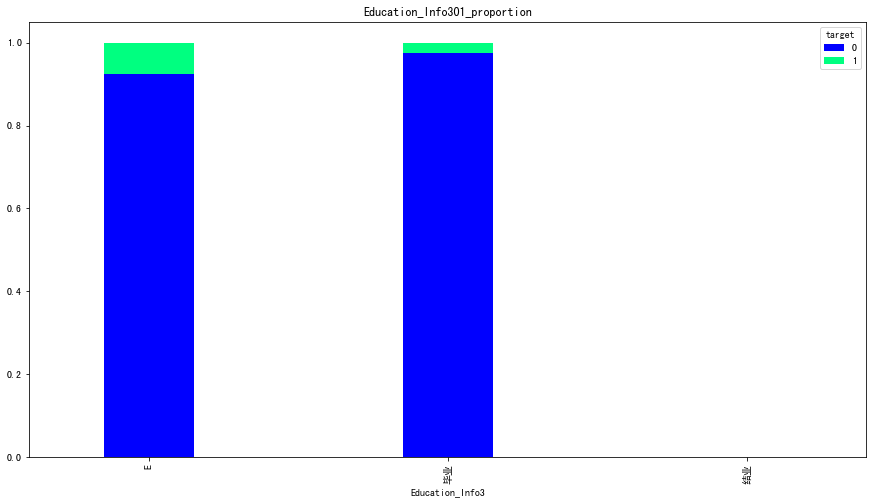

target              0     1    sum
Education_Info4                   
AE              0.002 0.000     49
AR              0.002 0.000     72
E               0.865 0.072  28110
F               0.010 0.000    302
T               0.046 0.001   1401
V               0.002 0.000     66


<Figure size 2880x2160 with 0 Axes>

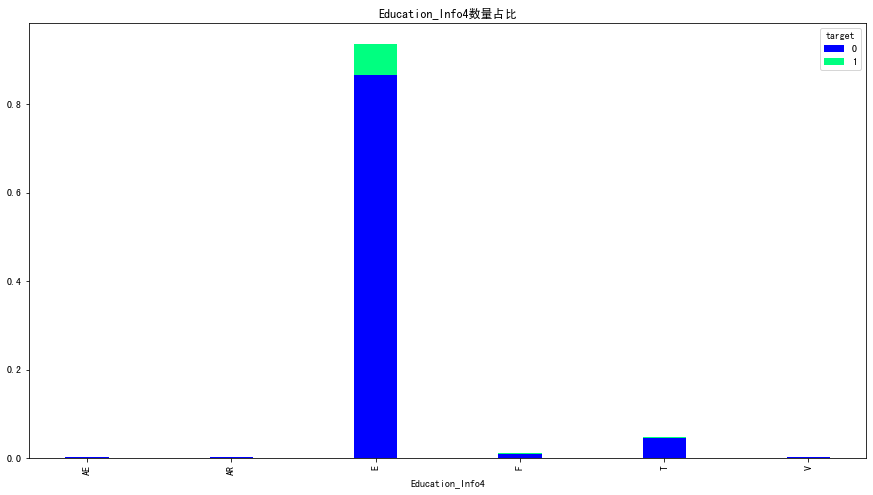

<Figure size 2880x2160 with 0 Axes>

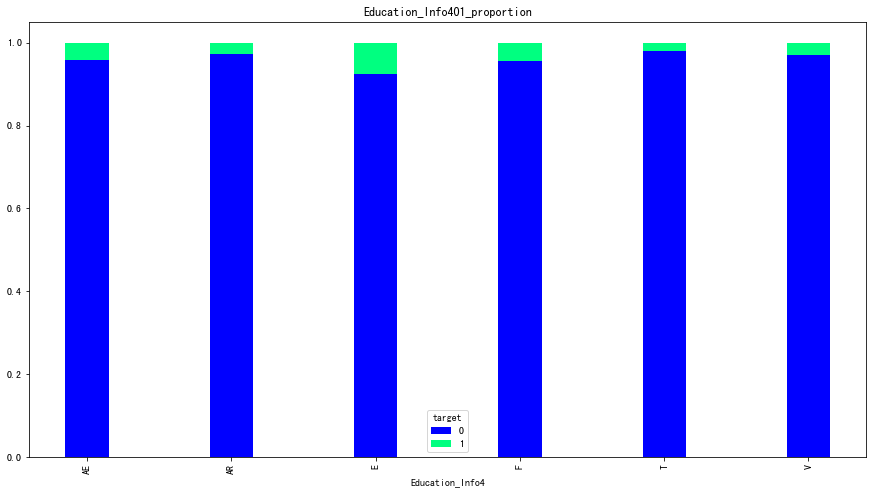

target              0     1       sum
Education_Info6                      
A               0.019 0.000   574.000
AM              0.011 0.000   319.000
AQ              0.002 0.000    53.000
B               0.000   nan       nan
E               0.895 0.073 29026.000
U               0.001   nan       nan


<Figure size 2880x2160 with 0 Axes>

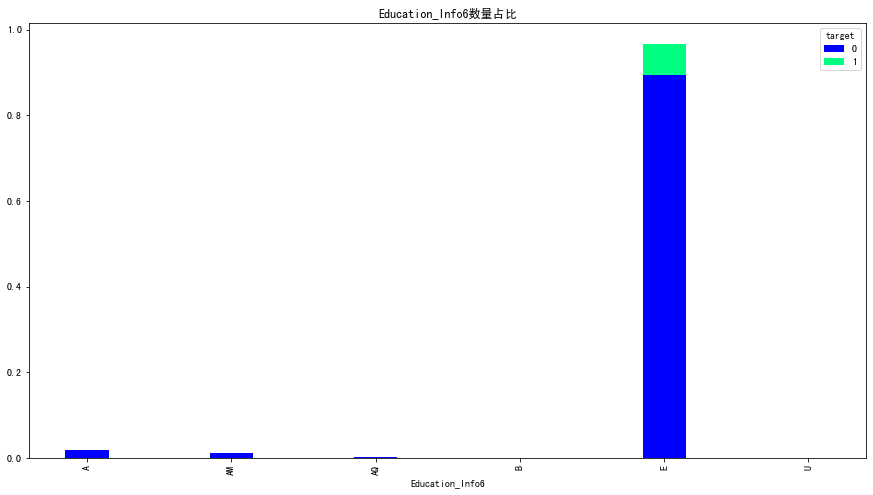

<Figure size 2880x2160 with 0 Axes>

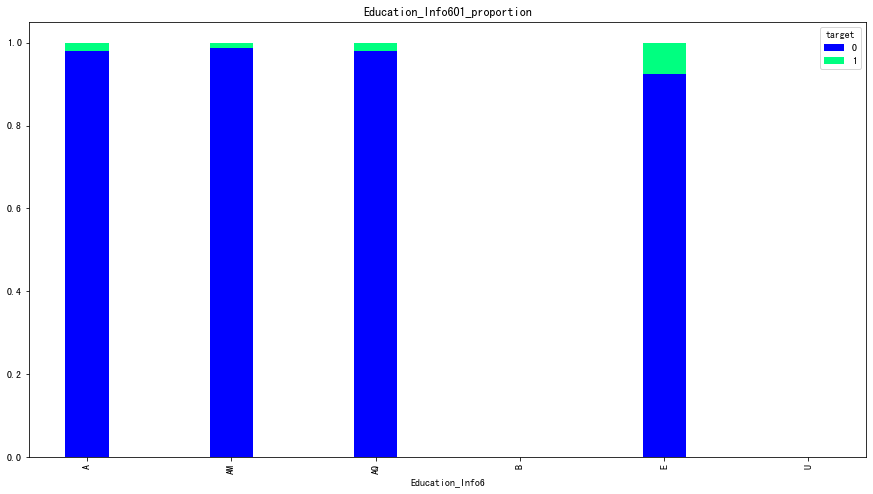

target              0     1    sum
Education_Info7                   
E               0.895 0.073  29026
不详              0.032 0.001    974


<Figure size 2880x2160 with 0 Axes>

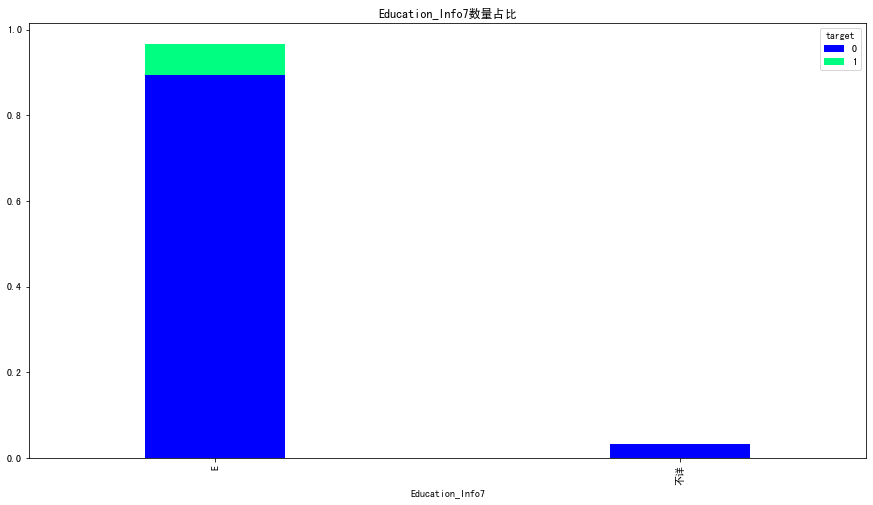

<Figure size 2880x2160 with 0 Axes>

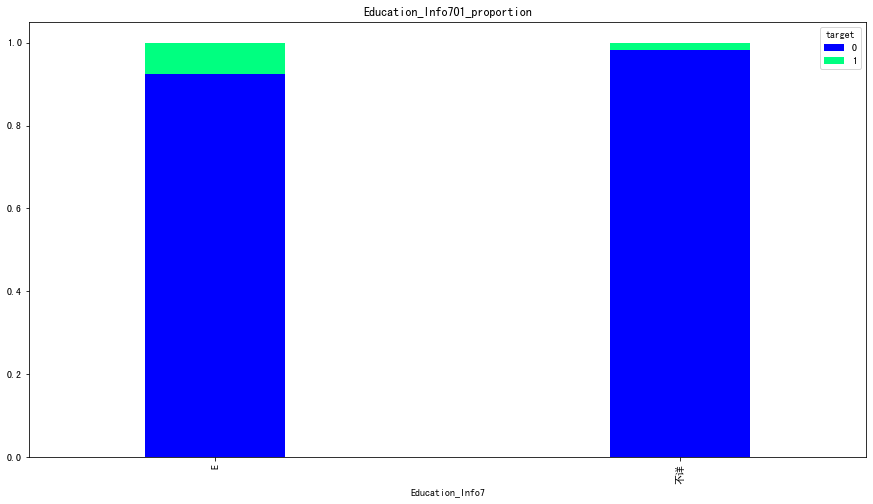

target              0     1       sum
Education_Info8                      
80              0.000   nan       nan
AE              0.001   nan       nan
E               0.895 0.073 29026.000
F               0.002 0.000    61.000
T               0.024 0.000   745.000
V               0.001   nan       nan
不详              0.004 0.000   117.000


<Figure size 2880x2160 with 0 Axes>

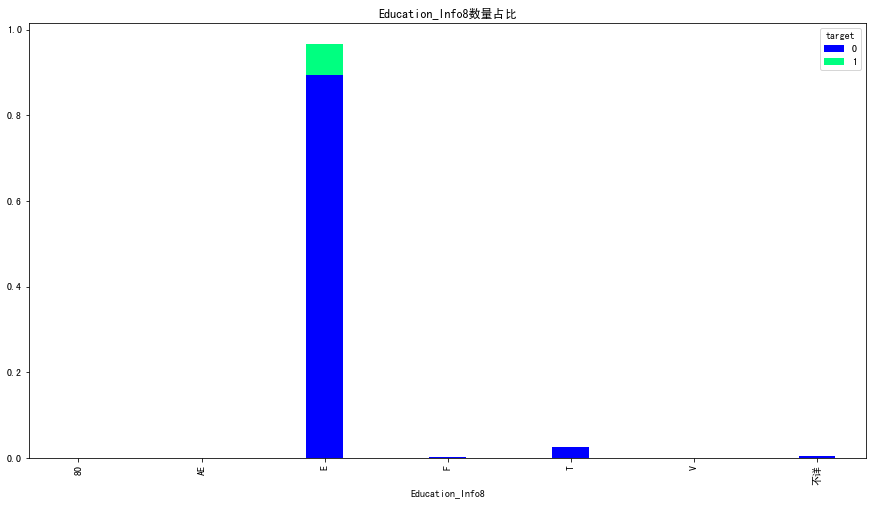

<Figure size 2880x2160 with 0 Axes>

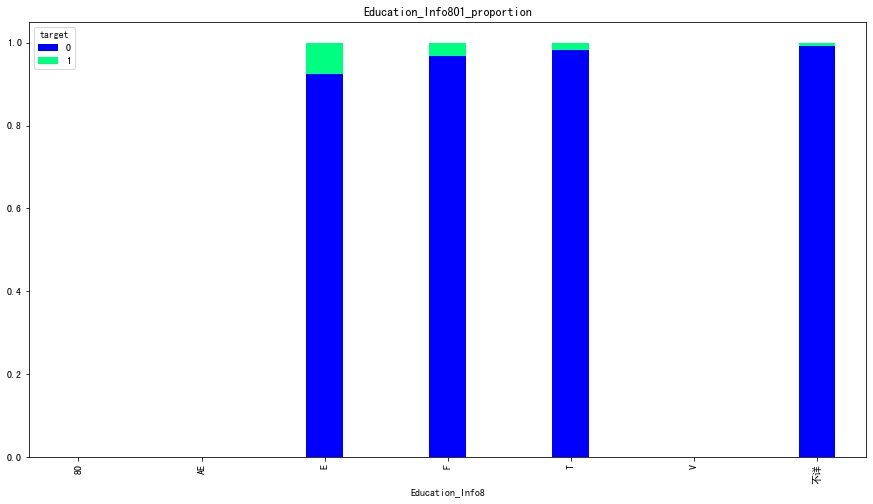

In [50]:
handle_list(education_infonum_list,title='Education_Info')
handle_list(education_infocategory_list,title='Education_Info')

target              0     1    sum
Education_Info1                   
0               0.865 0.072  28110
1               0.061 0.002   1890


<Figure size 2880x2160 with 0 Axes>

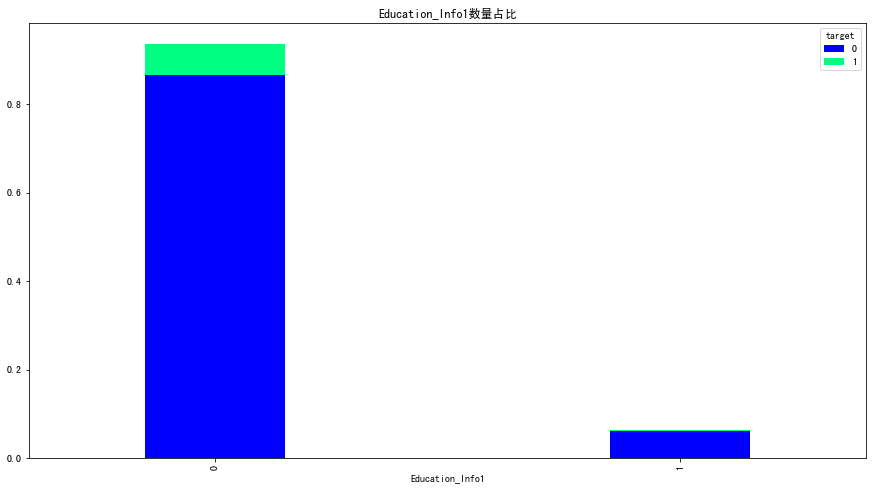

<Figure size 2880x2160 with 0 Axes>

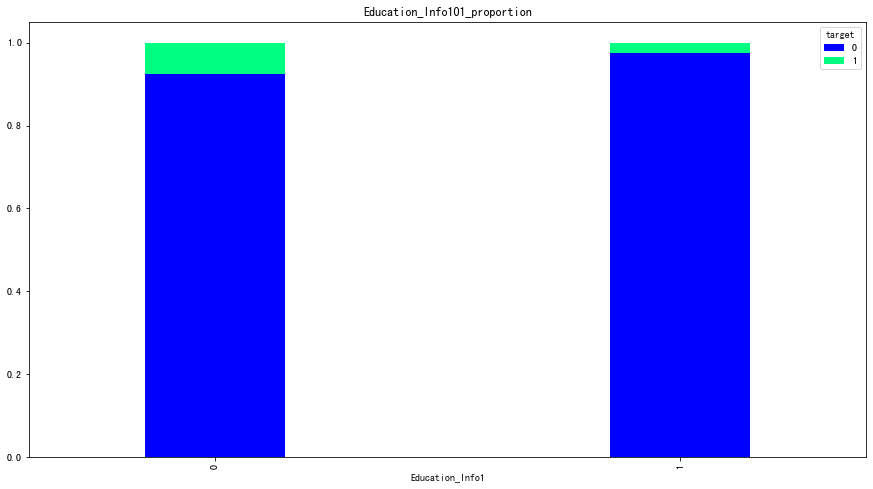

target              0     1    sum
Education_Info2                   
A               0.031 0.001    957
AM              0.023 0.001    706
E               0.865 0.072  28110
other           0.007 0.000    227


<Figure size 2880x2160 with 0 Axes>

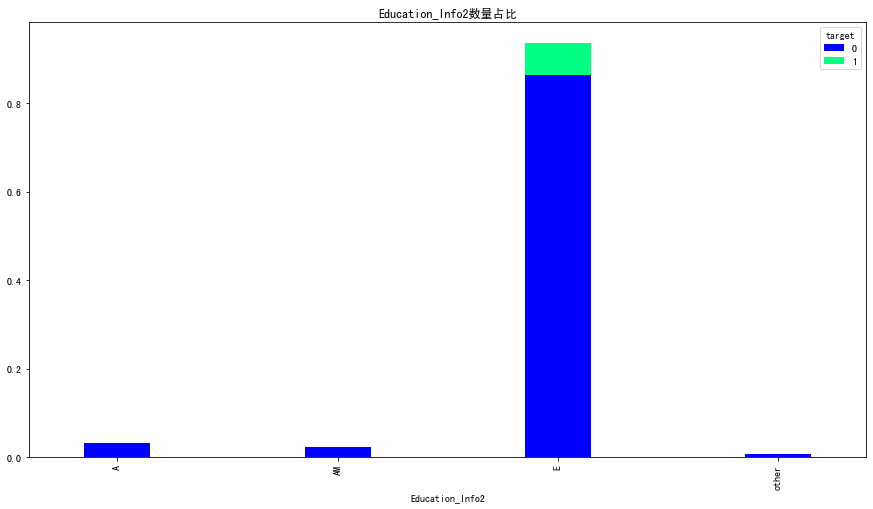

<Figure size 2880x2160 with 0 Axes>

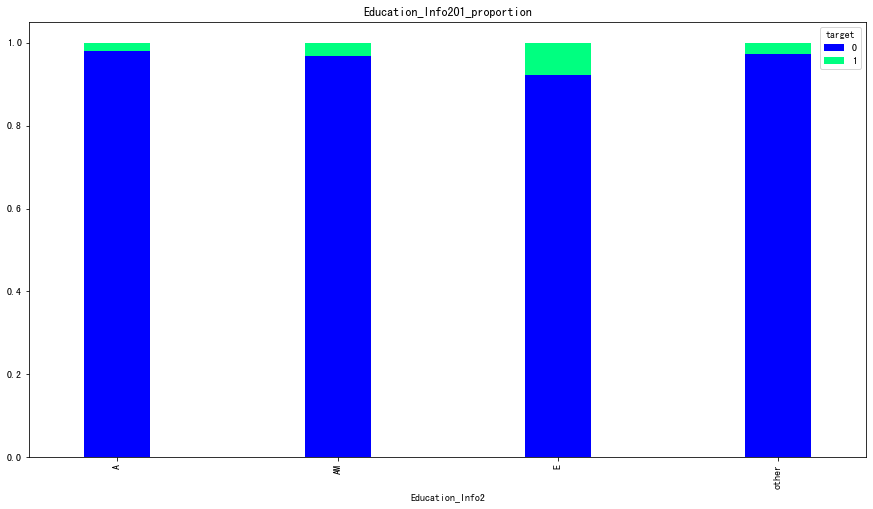

target              0     1       sum
Education_Info3                      
E               0.865 0.072 28110.000
other           0.002   nan       nan
毕业              0.060 0.002  1837.000


<Figure size 2880x2160 with 0 Axes>

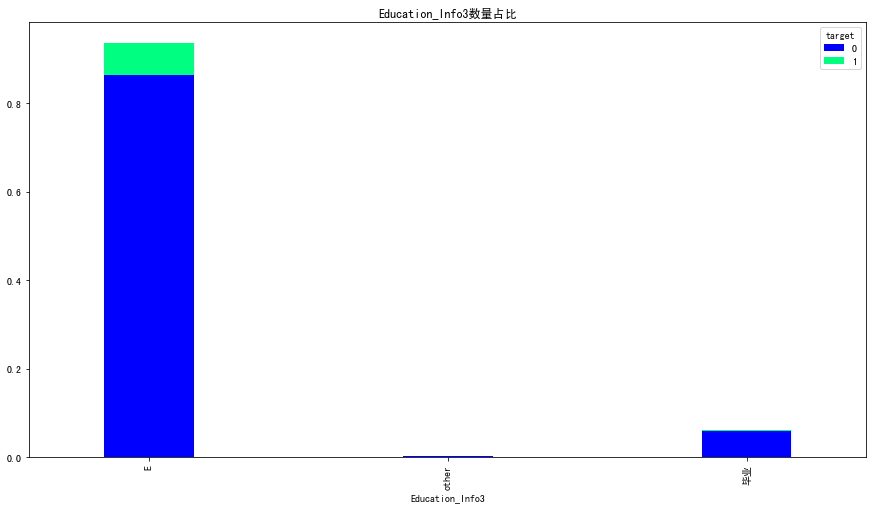

<Figure size 2880x2160 with 0 Axes>

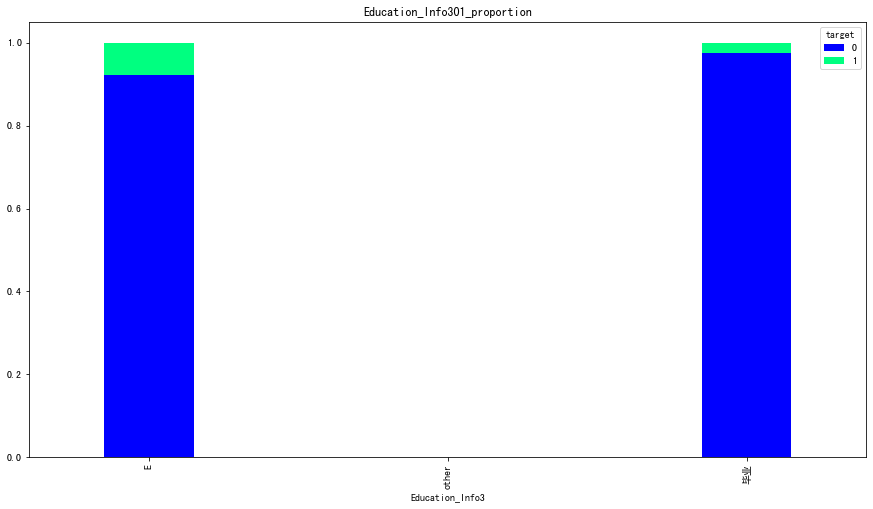

target              0     1    sum
Education_Info4                   
E               0.865 0.072  28110
F               0.010 0.000    302
T               0.046 0.001   1401
other           0.006 0.000    187


<Figure size 2880x2160 with 0 Axes>

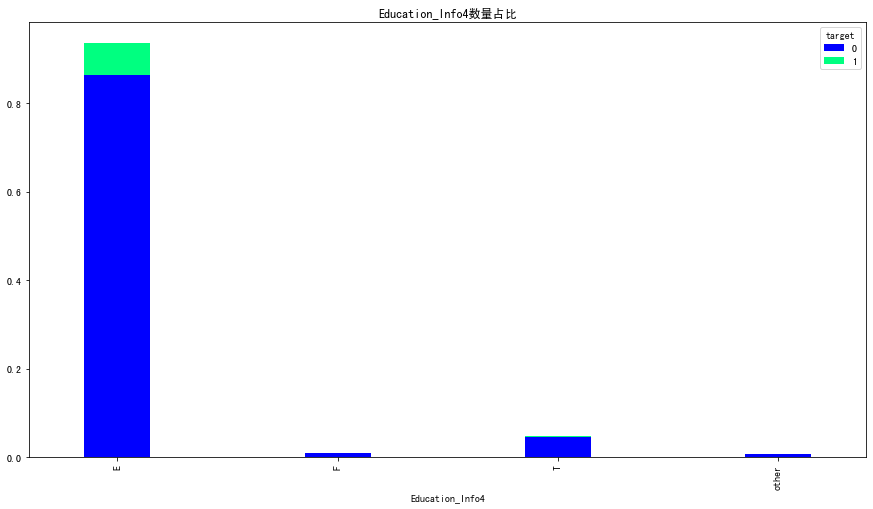

<Figure size 2880x2160 with 0 Axes>

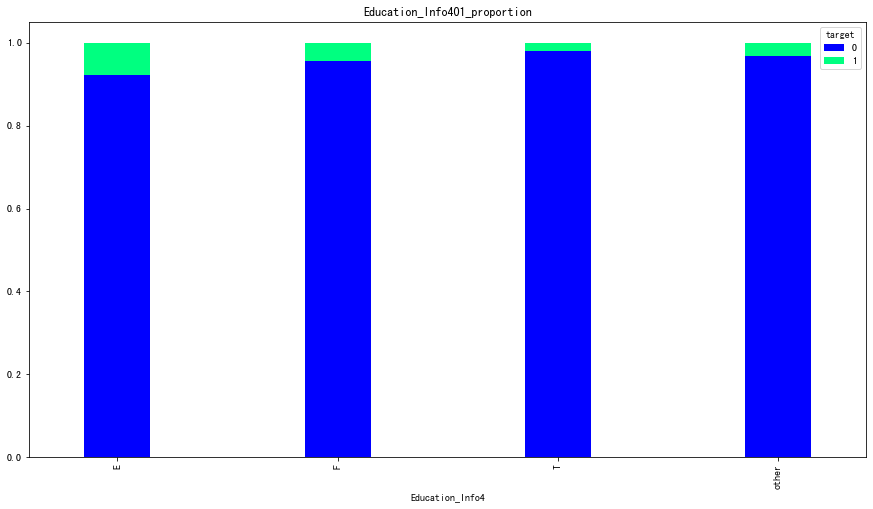

target              0     1    sum
Education_Info5                   
0               0.895 0.073  29026
1               0.032 0.001    974


<Figure size 2880x2160 with 0 Axes>

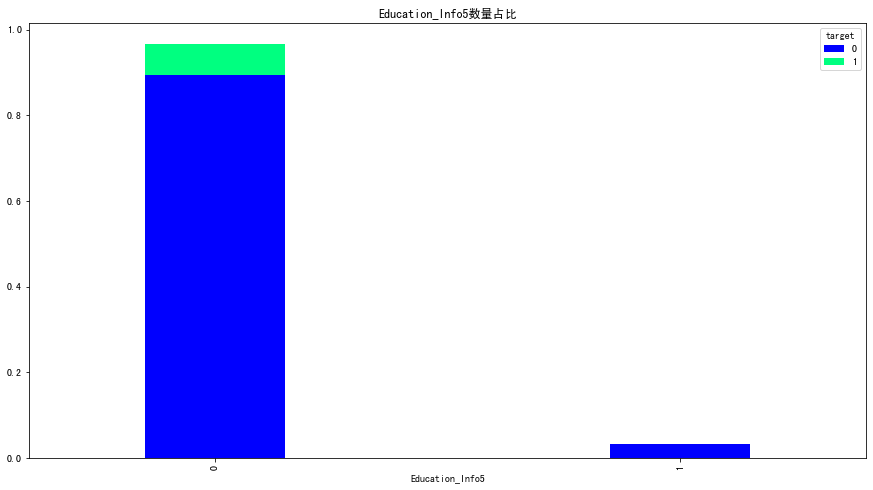

<Figure size 2880x2160 with 0 Axes>

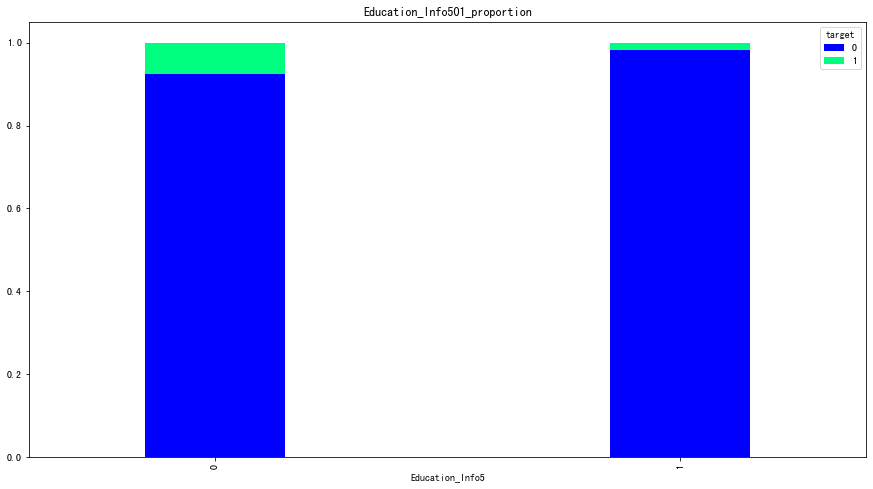

target              0     1    sum
Education_Info6                   
A               0.019 0.000    574
AM              0.011 0.000    319
E               0.895 0.073  29026
other           0.003 0.000     81


<Figure size 2880x2160 with 0 Axes>

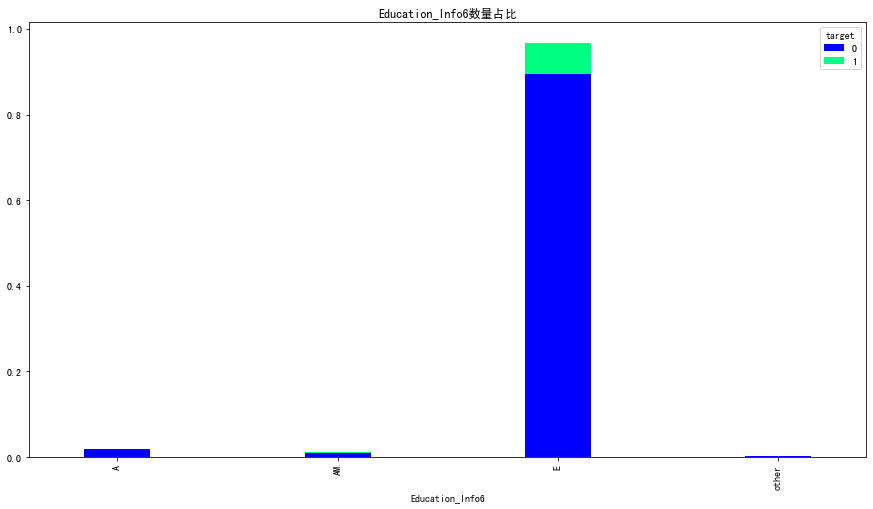

<Figure size 2880x2160 with 0 Axes>

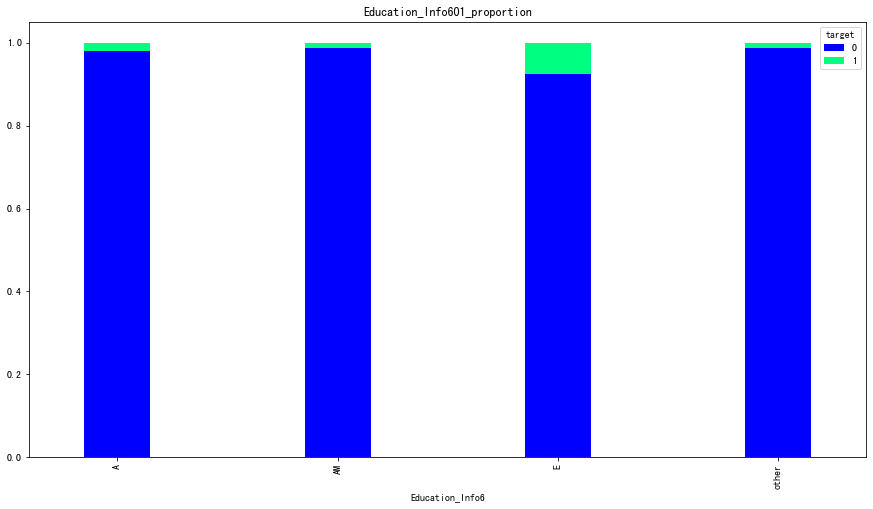

target              0     1    sum
Education_Info7                   
E               0.895 0.073  29026
不详              0.032 0.001    974


<Figure size 2880x2160 with 0 Axes>

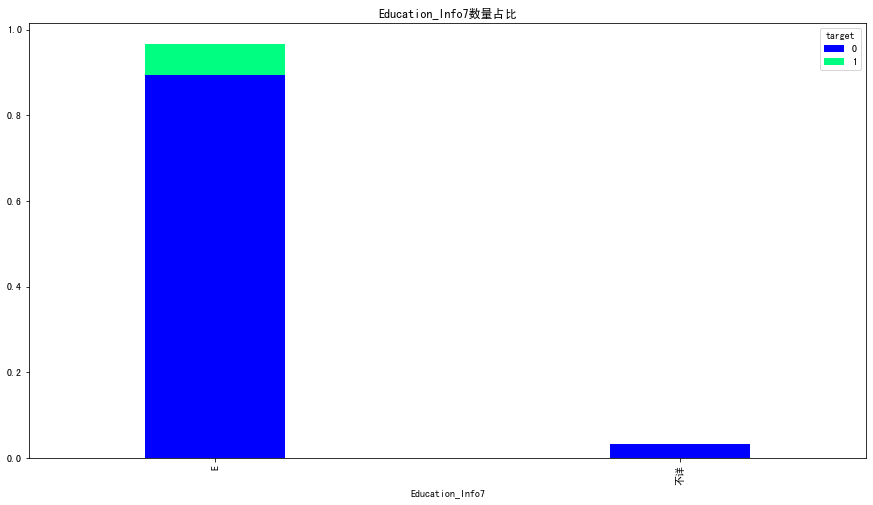

<Figure size 2880x2160 with 0 Axes>

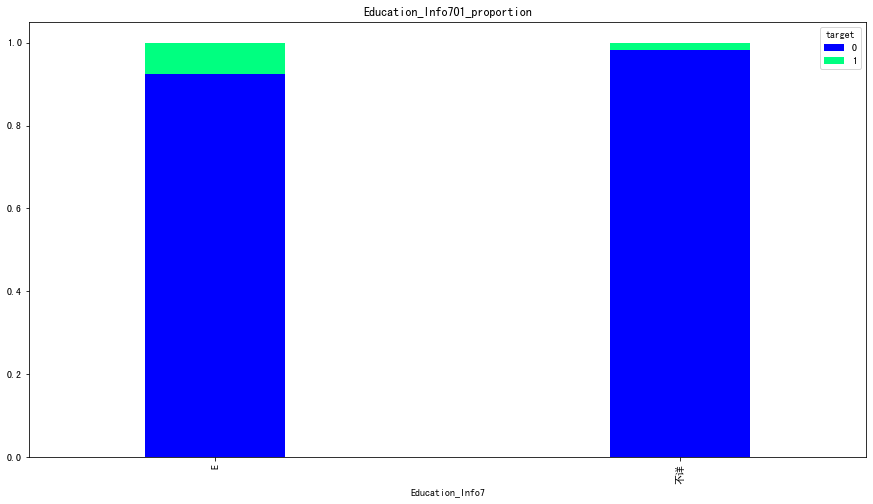

target              0     1    sum
Education_Info8                   
E               0.895 0.073  29026
T               0.024 0.000    745
other           0.008 0.000    229


<Figure size 2880x2160 with 0 Axes>

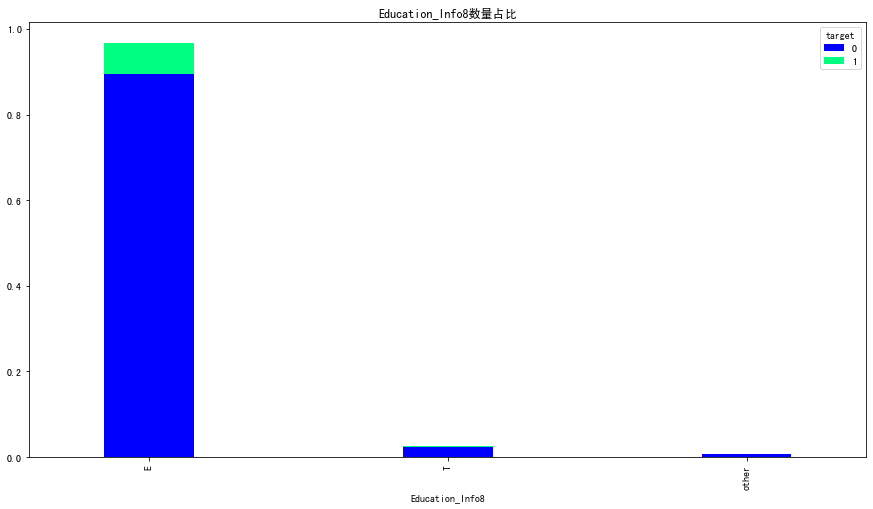

<Figure size 2880x2160 with 0 Axes>

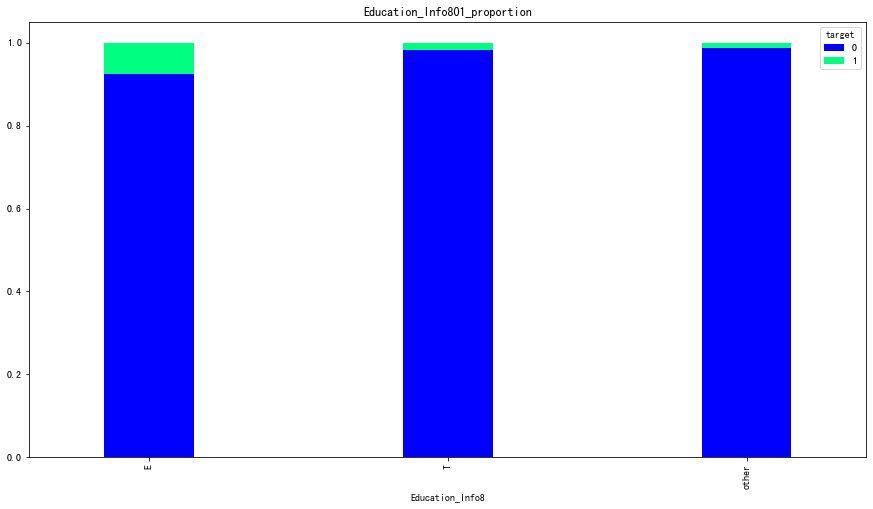

In [51]:
for i in education_infonum_list:
    data[i]=data[i].astype(str)
edulist=combine('Education_Info',1,8)
webinfo_categoty(edulist)

data=pd.get_dummies(data, columns=edulist)

In [52]:
data.head(10)

Idx  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0  10001         1.000         1.000        14.000         0.000   
1  10002         1.000         1.000        14.000         0.000   
2  10003         2.000         2.000         9.000         3.000   
3  10006         0.000         0.000         2.000         0.000   
4  10007         1.000         1.000         3.000         0.000   
5  10008         2.000         2.000         4.000         0.000   
6  10011        13.000        13.000        15.000         0.000   
7  10015        12.000        12.000         8.000         0.000   
8  10019        10.000        10.000        19.000         0.000   
9  10021         1.000         1.000         6.000         0.000   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0          6.000          6.000          0.000          6.000          2.000   
1          0.000          0.000          7.000          7.000          0.000   
2          0.000          0.000          3.000          4.000          2.000   
3          0.000          0.000          0.000          2.000          0.000   
4          0.000          0.000          0.000          3.000          0.000   
5          0.000          1.000          1.000          2.000          0.000   
6          0.000          2.000          2.000         10.000          1.000   
7          0.000          2.000          1.000          3.000          2.000   
8          0.000          1.000          9.000          7.000          2.000   
9          0.000          0.000          1.000          3.000          2.000   

   UserInfo_18  ThirdParty_Info_Period1_1  ThirdParty_Info_Period1_2  \
0           29                         10                         47   
1           28                          0                          0   
2           32                          1                          2   
3           33                          9                         54   
4           43                          1                          5   
5           24                         31                         43   
6           33                          6                          3   
7           29                         -1                         -1   
8           29                        180                          3   
9           34                         14                         28   

   ThirdParty_Info_Period1_3  ThirdParty_Info_Period1_4  \
0                        167                          0   
1                         68                        105   
2                         50                         50   
3                         56                        125   
4                         39                         34   
5                        233                        205   
6                         64                         29   
7                         -1                         -1   
8                        414                        363   
9                        132                        118   

   ThirdParty_Info_Period1_5  ThirdParty_Info_Period1_6  \
0                         25                         65   
1                         40                          2   
2                         49                          0   
3                         38                          0   
4                         36                         73   
5                         80                          3   
6                         33                         93   
7                         -1                         -1   
8                         85                          0   
9                         73                          2   

   ThirdParty_Info_Period1_7  ThirdParty_Info_Period1_8  \
0                         68                         34   
1                        132                         39   
2                         78                         22   
3                        136                  

In [53]:
SocialNetworklist_num=[]
SocialNetworklist_num.extend(combine('SocialNetwork_',1,17))

<BarContainer object of 17 artists>

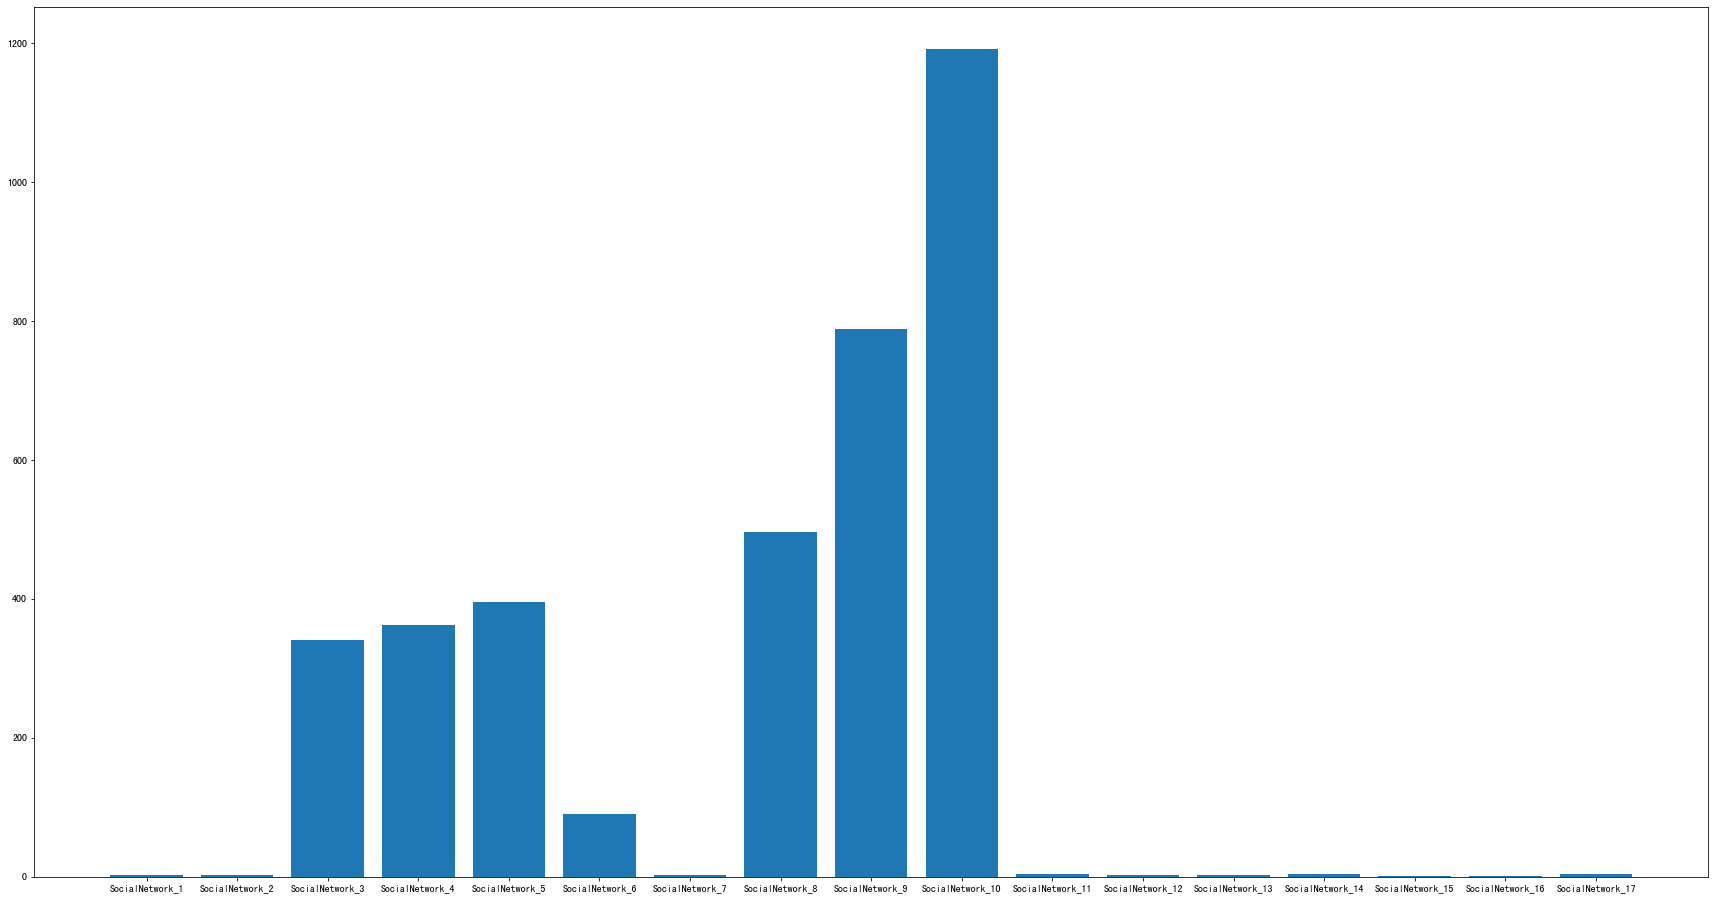

In [54]:
social_dic={}
for i in SocialNetworklist_num:
    social_dic[i]=len(data[i].unique())
social_info = pd.Series(social_dic)
plt.figure(figsize=(30,16))
plt.bar(x=social_info.index,height=social_info)

In [55]:
social_less_list=['SocialNetwork_1','SocialNetwork_2','SocialNetwork_7']
social_less_list.extend(combine('SocialNetwork_',11,17))
for i in social_less_list:
    data[i]=data[i].astype(str)

target              0     1       sum
SocialNetwork_1                      
0               0.926 0.073 29965.000
1               0.001 0.000    33.000
2               0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

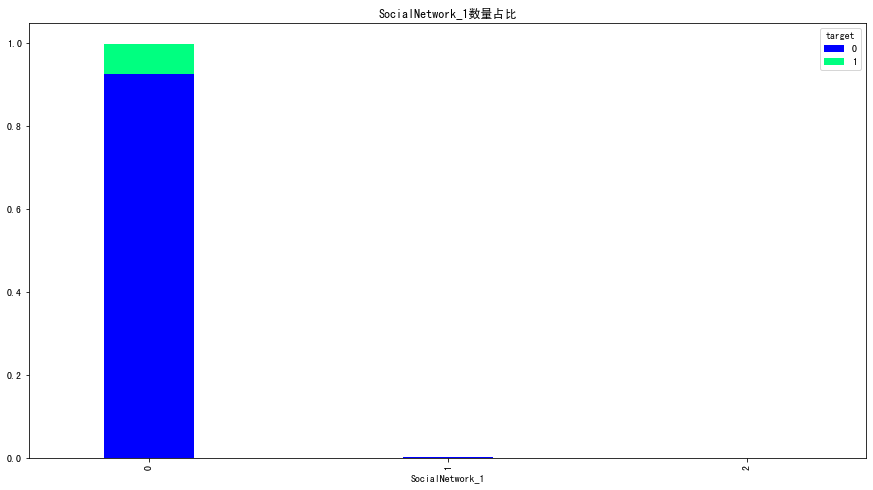

<Figure size 2880x2160 with 0 Axes>

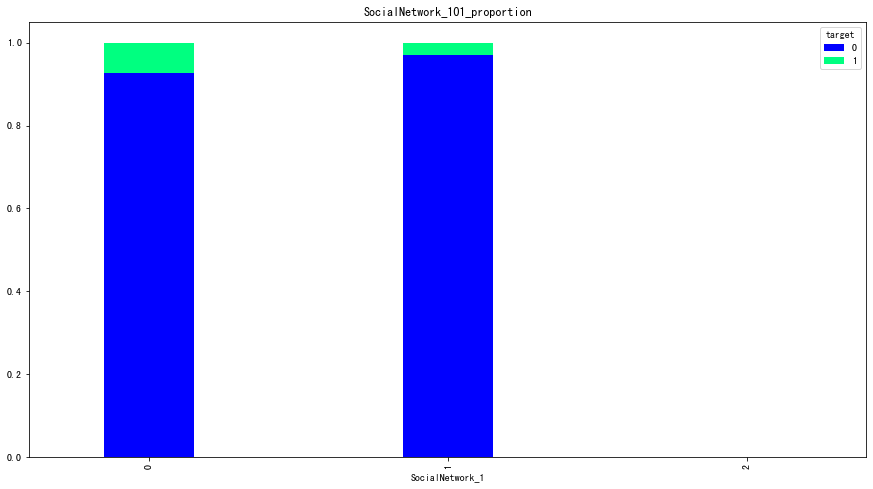

target              0     1    sum
SocialNetwork_2                   
0               0.901 0.072  29180
1               0.021 0.002    688
2               0.004 0.000    132


<Figure size 2880x2160 with 0 Axes>

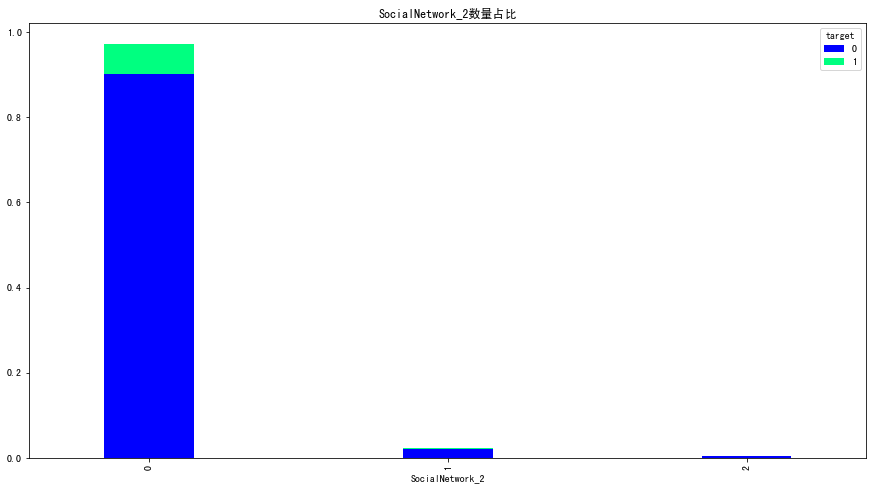

<Figure size 2880x2160 with 0 Axes>

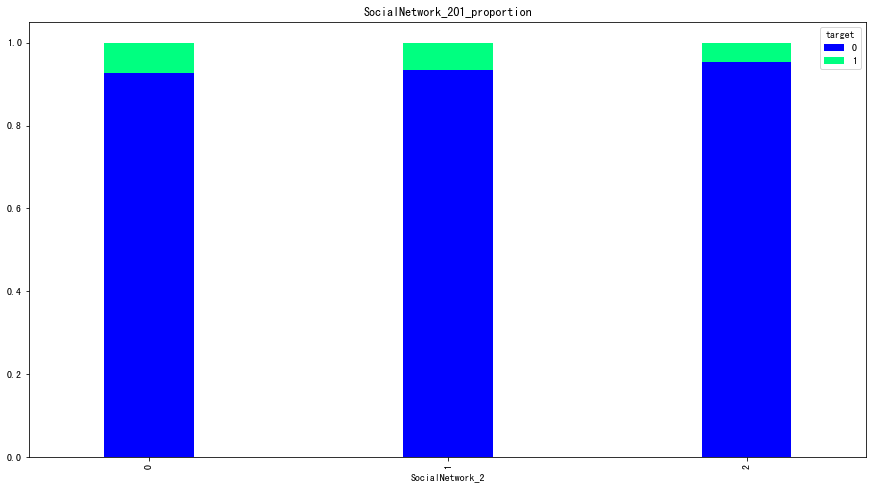

target              0     1    sum
SocialNetwork_7                   
-1              0.901 0.071  29161
0               0.024 0.002    774
1               0.002 0.000     65


<Figure size 2880x2160 with 0 Axes>

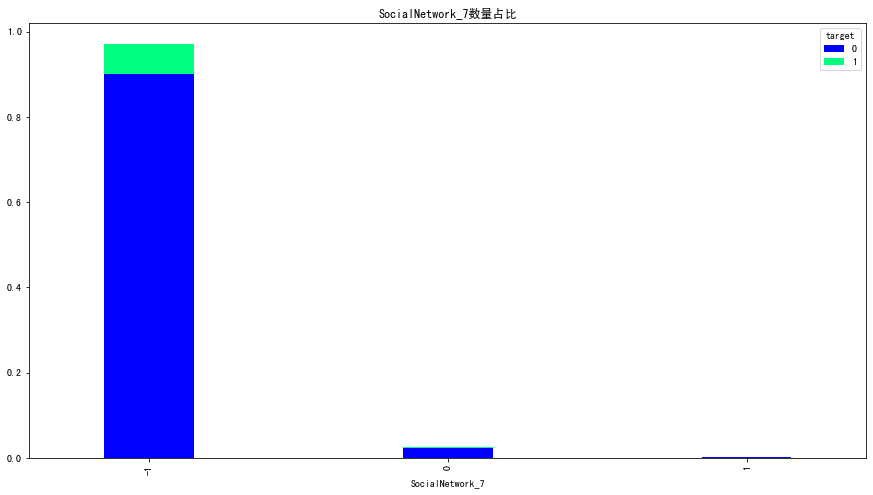

<Figure size 2880x2160 with 0 Axes>

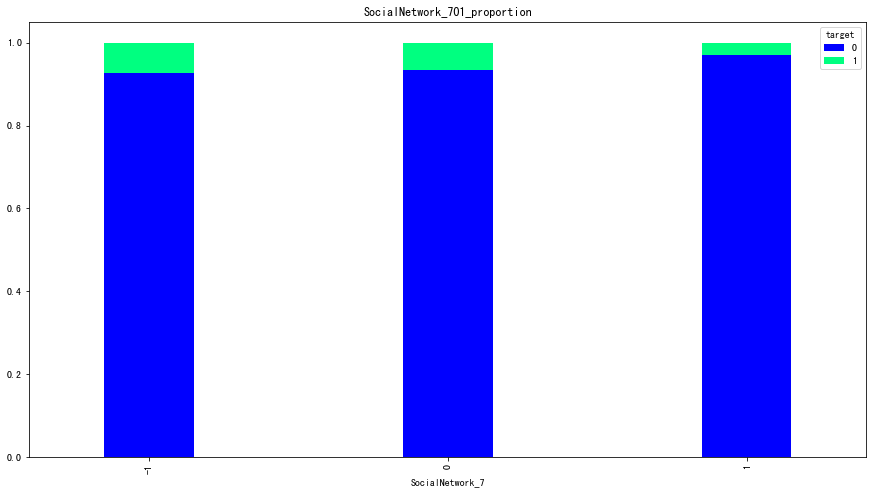

target               0     1       sum
SocialNetwork_11                      
-1               0.926 0.073 29988.000
0                0.000 0.000    10.000
4                0.000   nan       nan
6                  nan 0.000       nan


<Figure size 2880x2160 with 0 Axes>

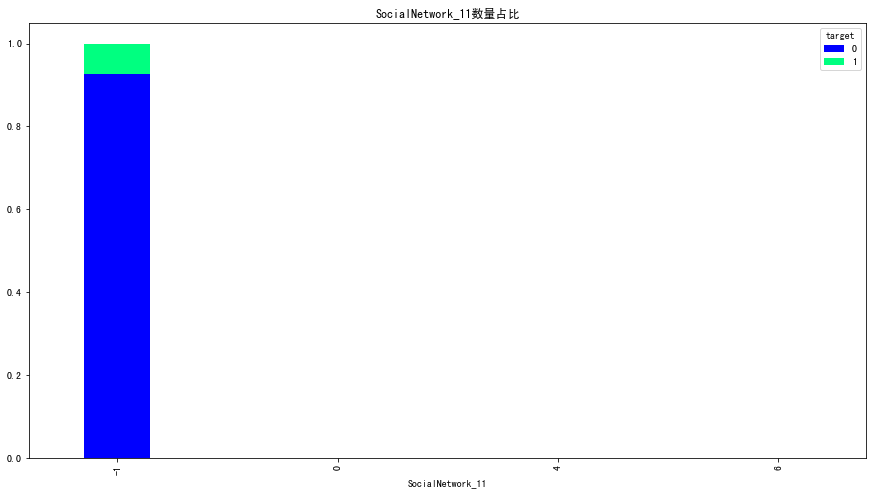

<Figure size 2880x2160 with 0 Axes>

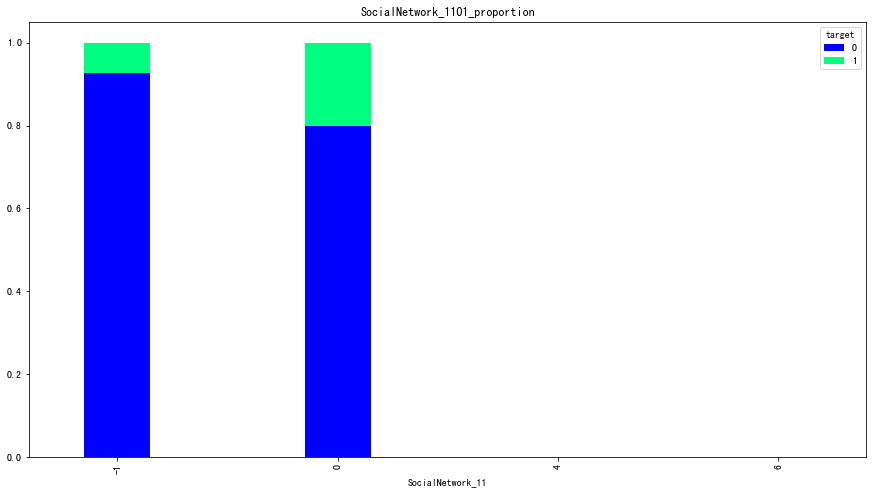

target               0     1    sum
SocialNetwork_12                   
-1               0.693 0.054  22425
0                0.231 0.019   7501
1                0.002 0.000     74


<Figure size 2880x2160 with 0 Axes>

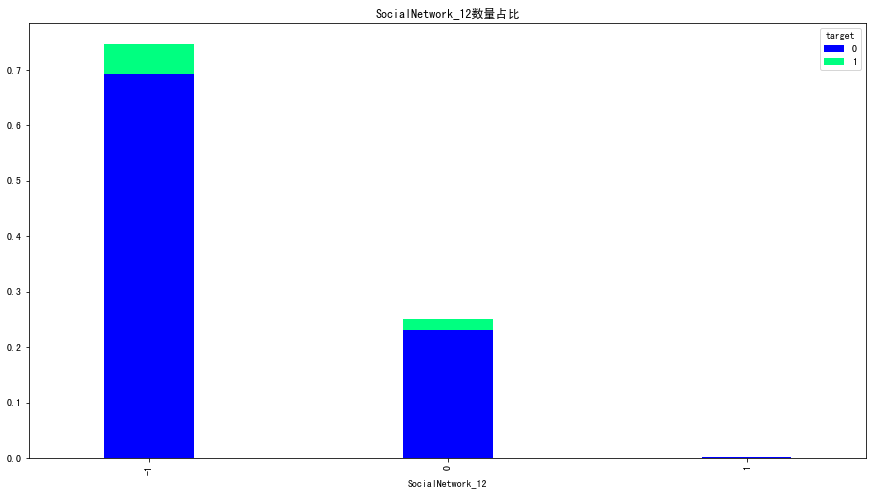

<Figure size 2880x2160 with 0 Axes>

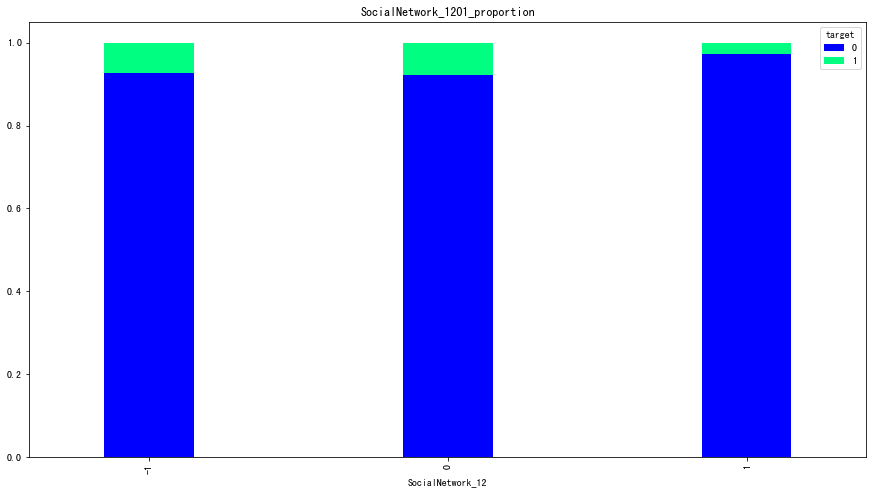

target               0     1    sum
SocialNetwork_13                   
0                0.722 0.060  23434
1                0.203 0.014   6497
2                0.002 0.000     69


<Figure size 2880x2160 with 0 Axes>

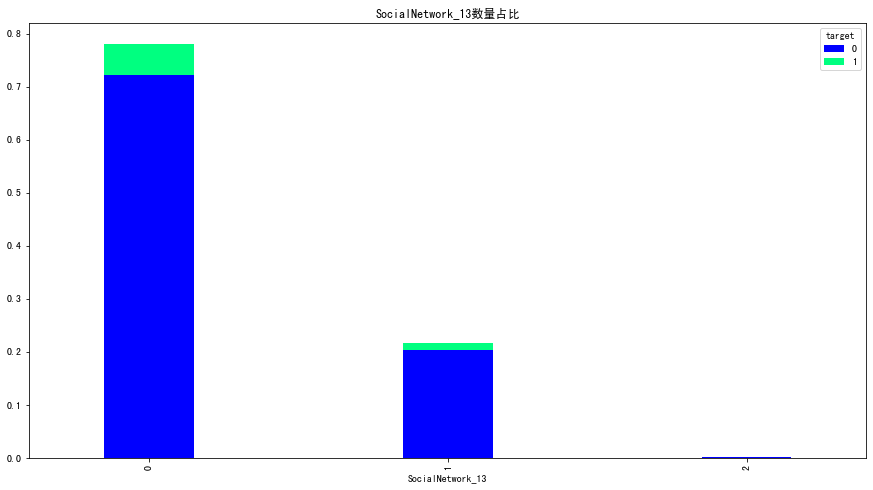

<Figure size 2880x2160 with 0 Axes>

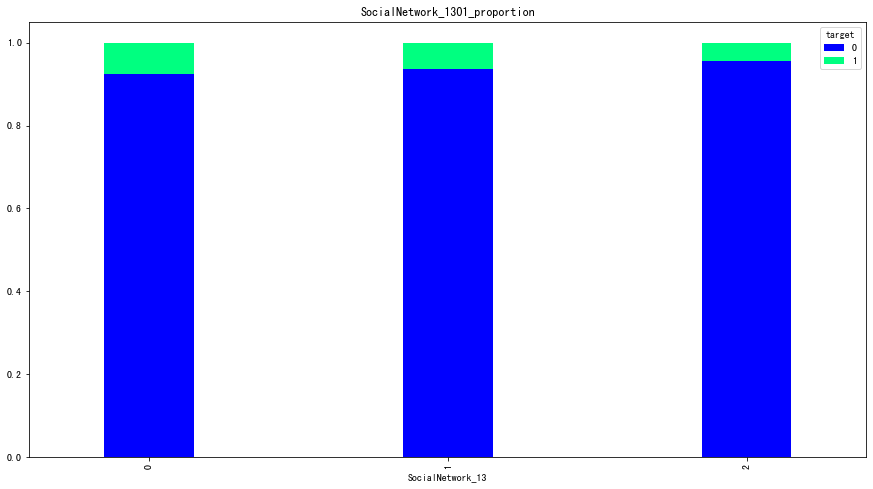

target               0     1       sum
SocialNetwork_14                      
0                0.871 0.068 28148.000
1                0.056 0.006  1844.000
2                0.000 0.000     7.000
3                0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

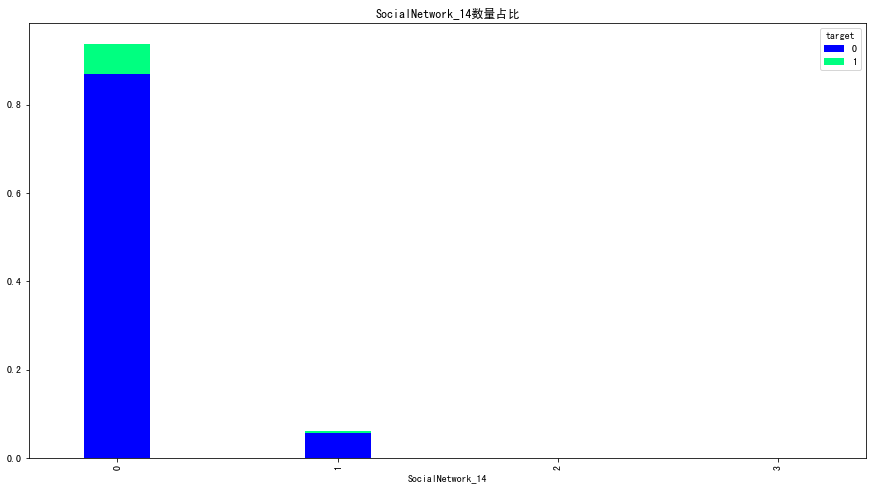

<Figure size 2880x2160 with 0 Axes>

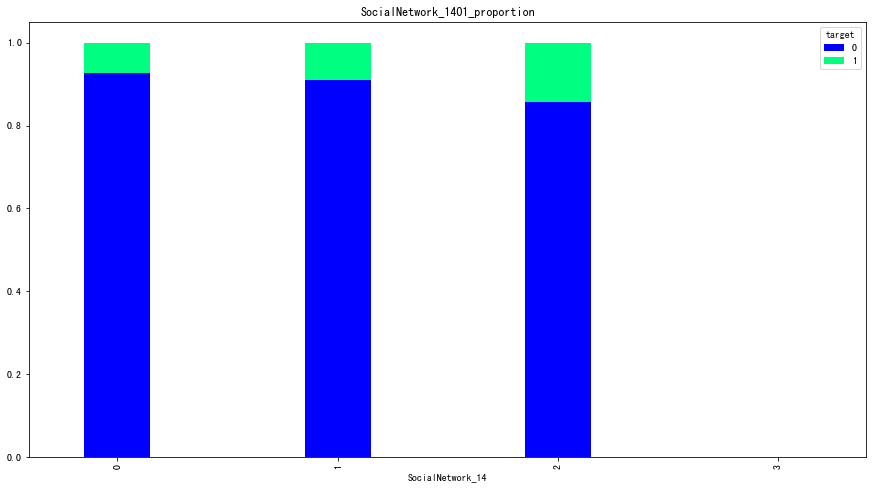

target               0     1    sum
SocialNetwork_15                   
0                0.901 0.071  29161
1                0.026 0.002    839


<Figure size 2880x2160 with 0 Axes>

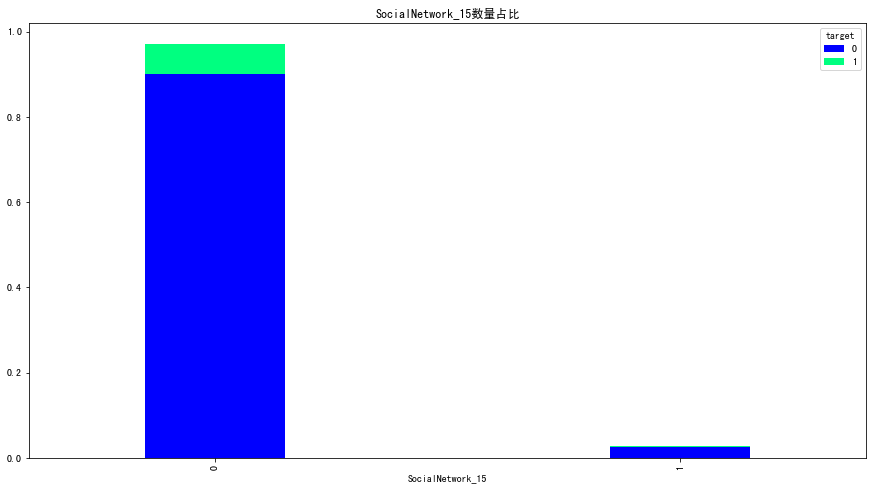

<Figure size 2880x2160 with 0 Axes>

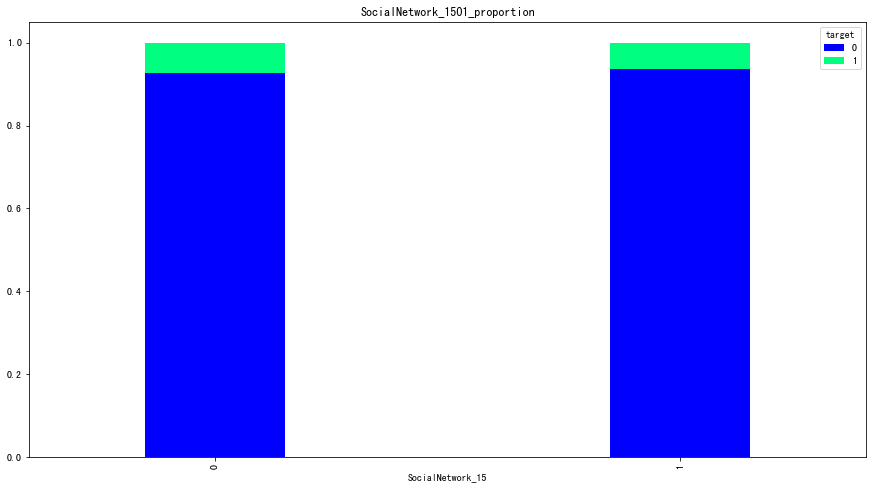

target               0     1    sum
SocialNetwork_16                   
0                0.911 0.072  29501
1                0.015 0.001    499


<Figure size 2880x2160 with 0 Axes>

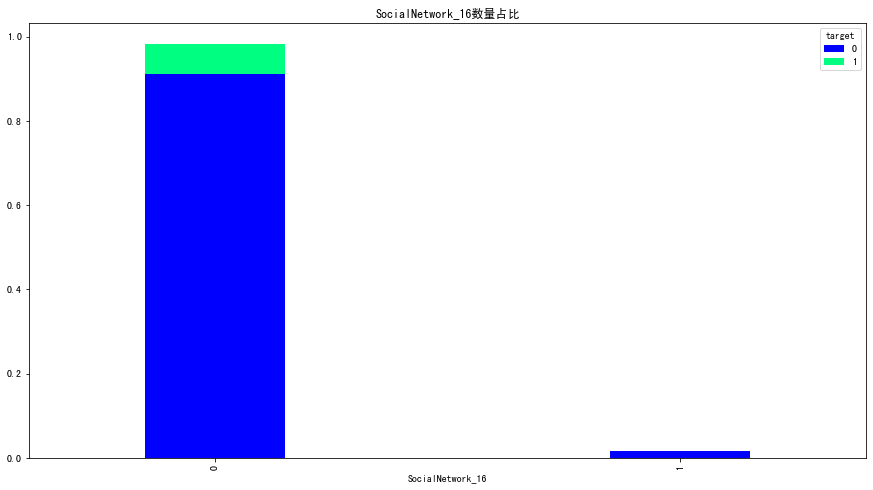

<Figure size 2880x2160 with 0 Axes>

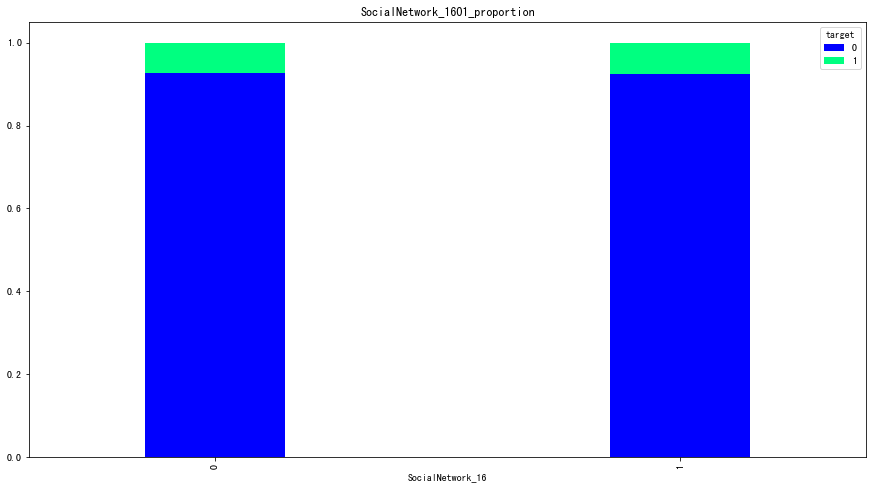

target               0     1       sum
SocialNetwork_17                      
0                0.693 0.054 22425.000
1                0.232 0.019  7547.000
2                0.001 0.000    27.000
3                0.000   nan       nan


<Figure size 2880x2160 with 0 Axes>

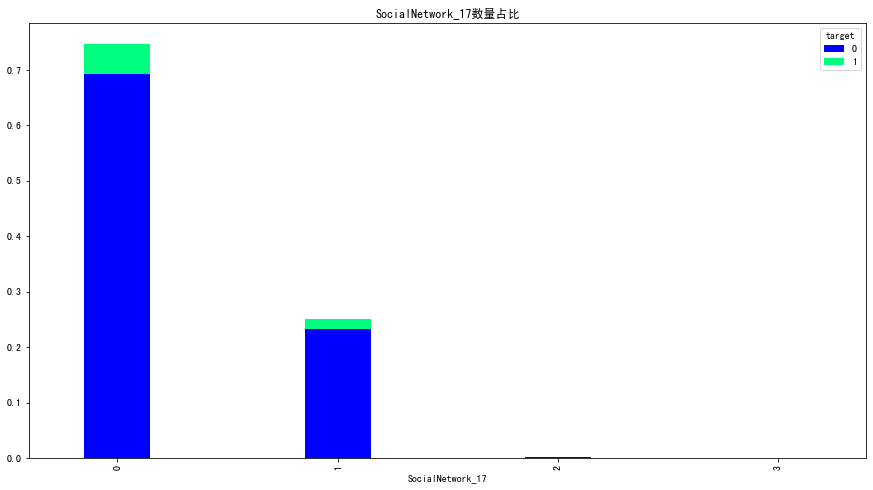

<Figure size 2880x2160 with 0 Axes>

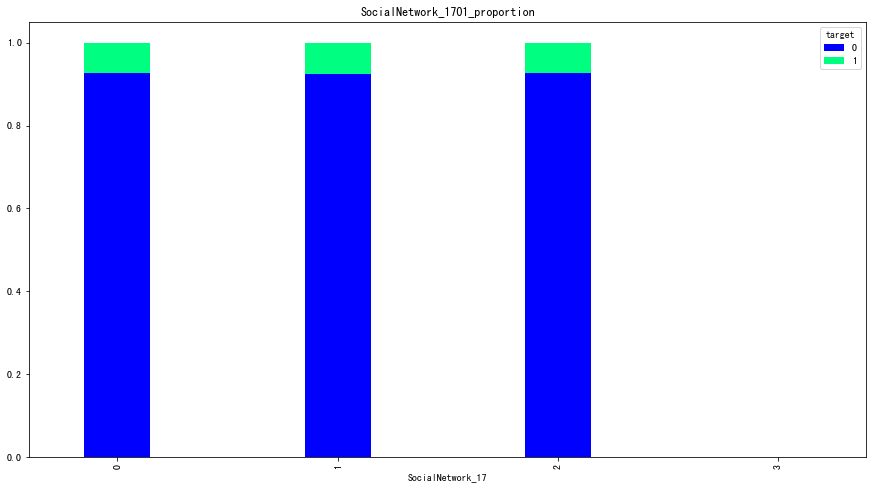

In [56]:
handle_list(social_less_list,title='SocialNetwork')

target              0     1    sum
SocialNetwork_1                   
0               0.926 0.073  29965
other           0.001 0.000     35


<Figure size 2880x2160 with 0 Axes>

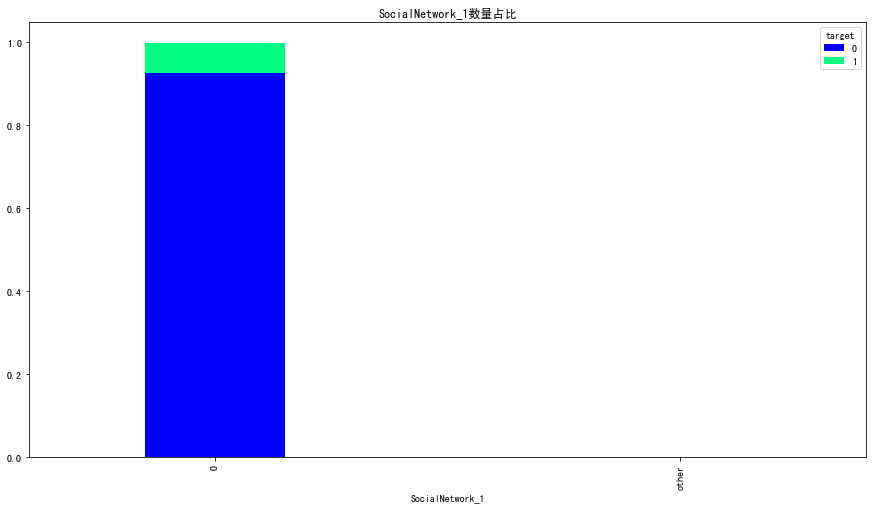

<Figure size 2880x2160 with 0 Axes>

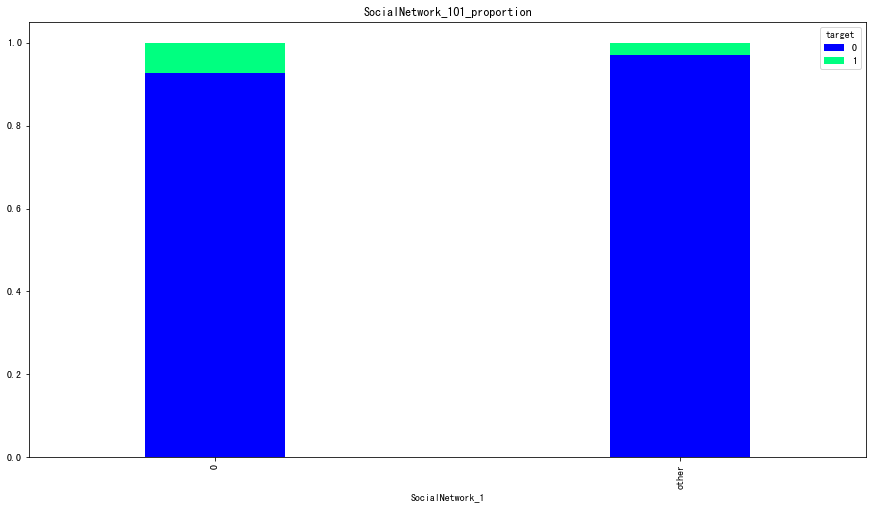

target              0     1    sum
SocialNetwork_2                   
0               0.901 0.072  29180
1               0.021 0.002    688
other           0.004 0.000    132


<Figure size 2880x2160 with 0 Axes>

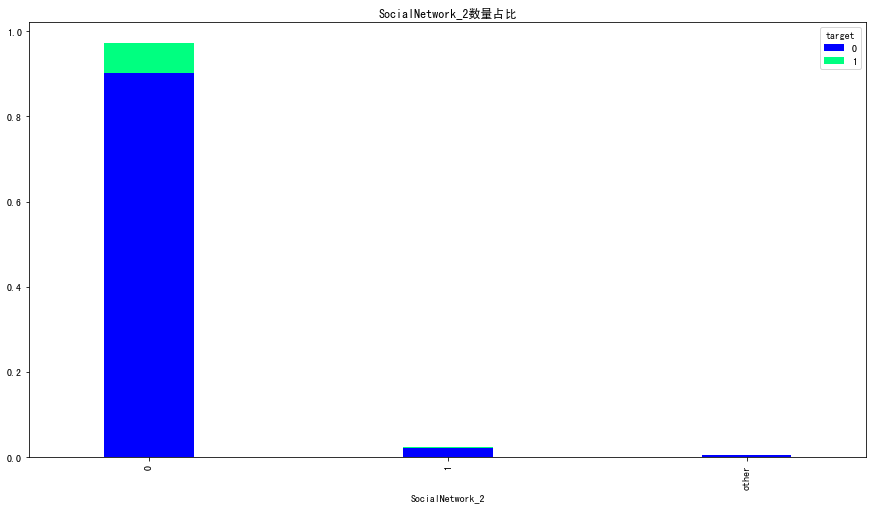

<Figure size 2880x2160 with 0 Axes>

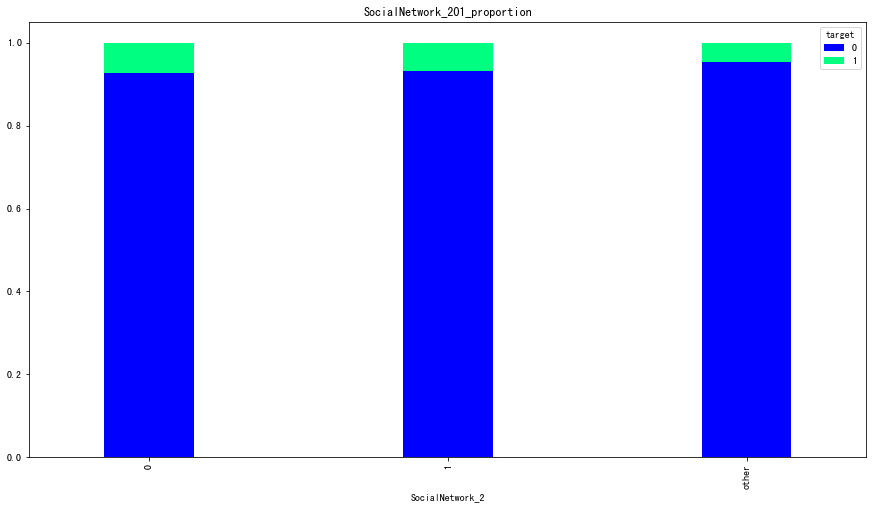

target              0     1    sum
SocialNetwork_7                   
-1              0.901 0.071  29161
0               0.024 0.002    774
other           0.002 0.000     65


<Figure size 2880x2160 with 0 Axes>

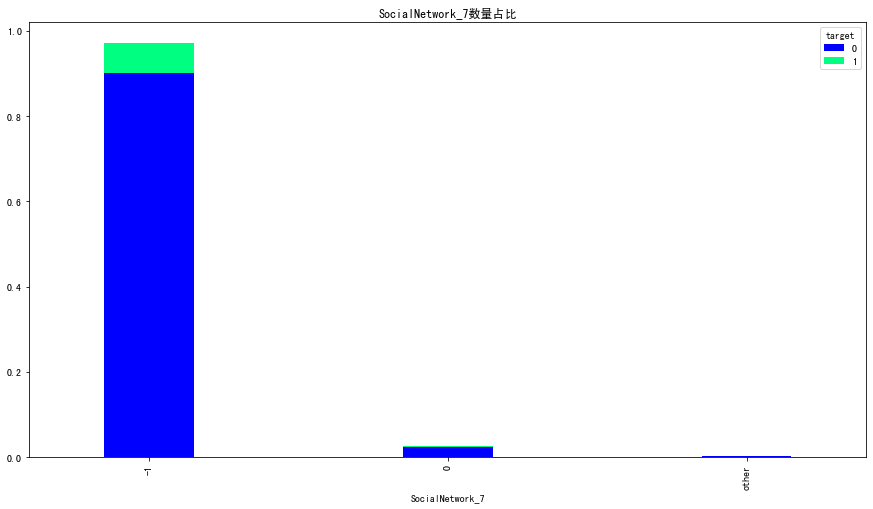

<Figure size 2880x2160 with 0 Axes>

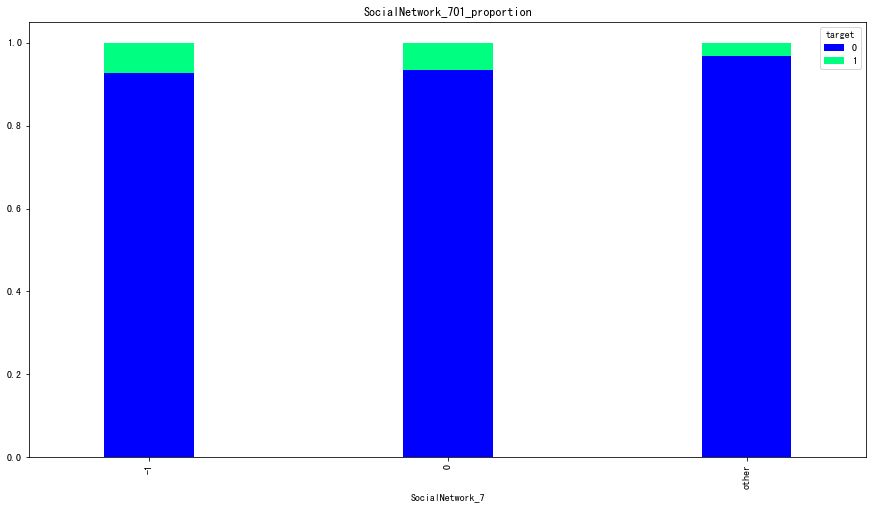

target               0     1    sum
SocialNetwork_11                   
-1               0.926 0.073  29988
other            0.000 0.000     12


<Figure size 2880x2160 with 0 Axes>

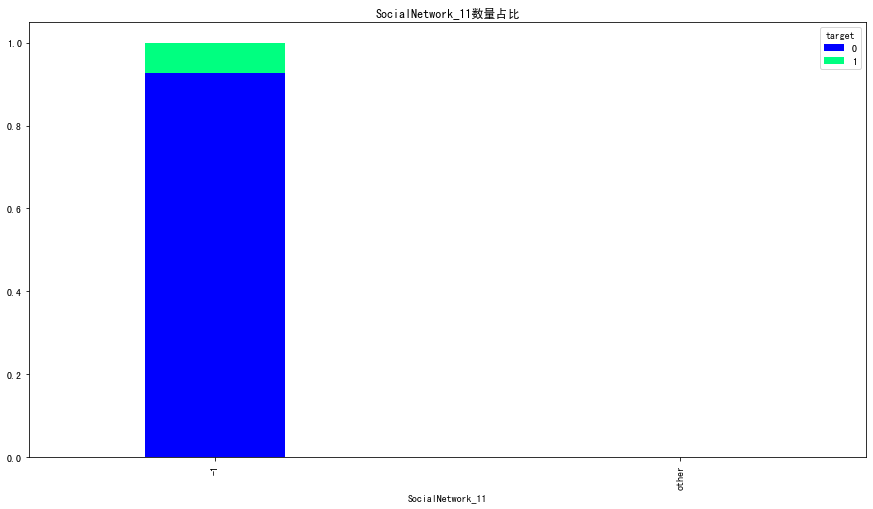

<Figure size 2880x2160 with 0 Axes>

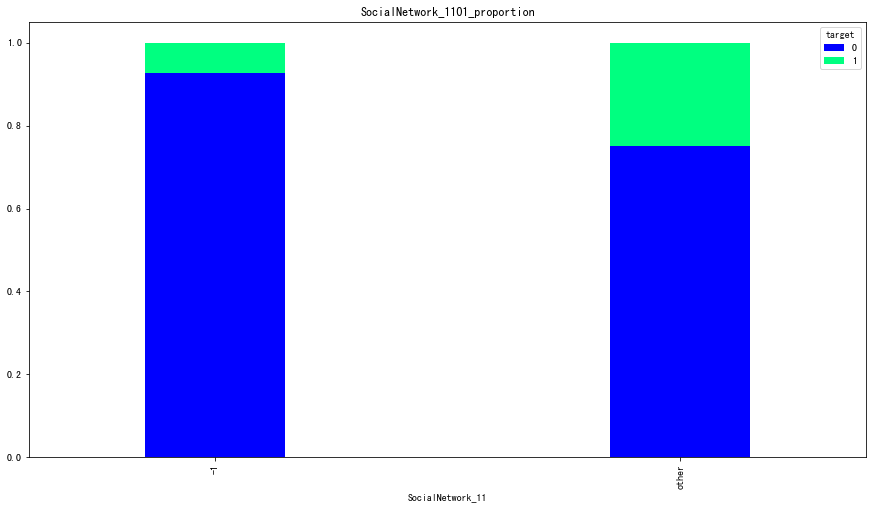

target               0     1    sum
SocialNetwork_12                   
-1               0.693 0.054  22425
0                0.231 0.019   7501
other            0.002 0.000     74


<Figure size 2880x2160 with 0 Axes>

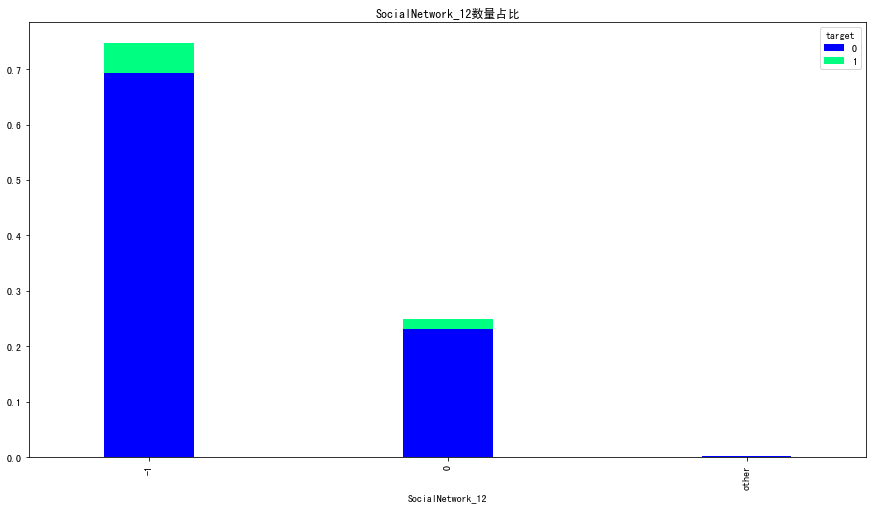

<Figure size 2880x2160 with 0 Axes>

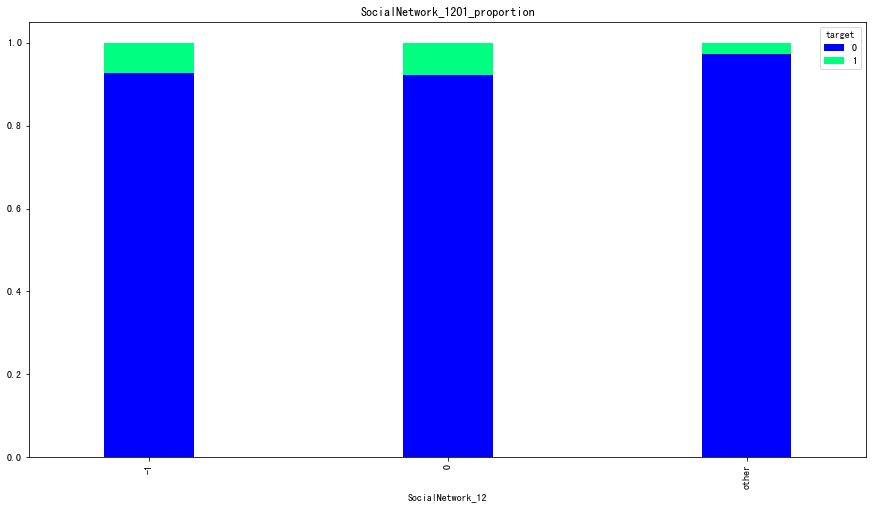

target               0     1    sum
SocialNetwork_13                   
0                0.722 0.060  23434
1                0.203 0.014   6497
other            0.002 0.000     69


<Figure size 2880x2160 with 0 Axes>

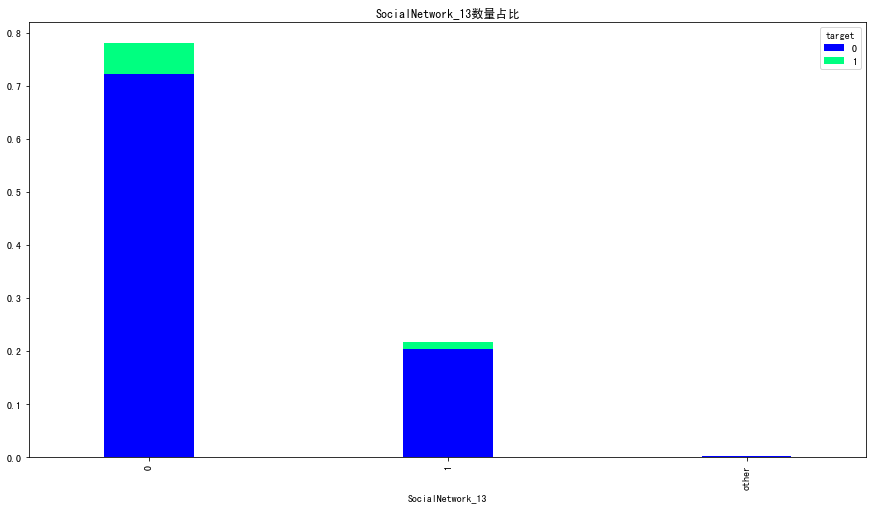

<Figure size 2880x2160 with 0 Axes>

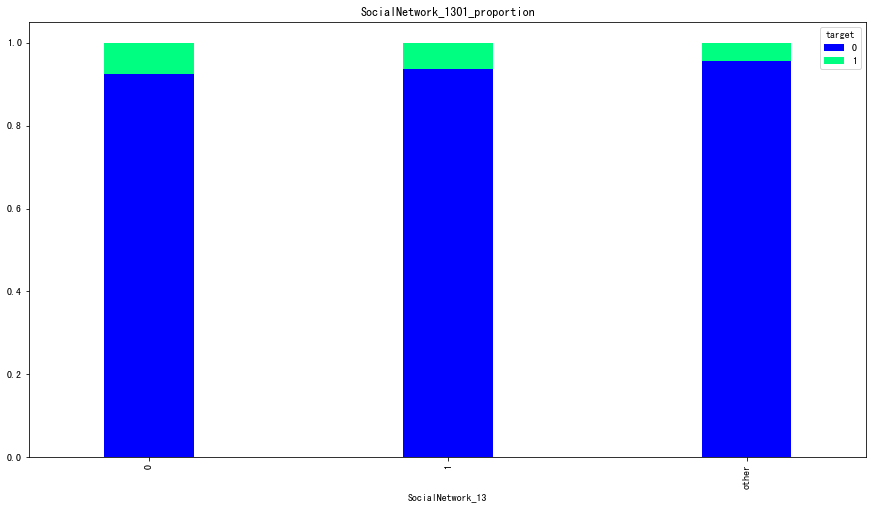

target               0     1    sum
SocialNetwork_14                   
0                0.871 0.068  28148
1                0.056 0.006   1844
other            0.000 0.000      8


<Figure size 2880x2160 with 0 Axes>

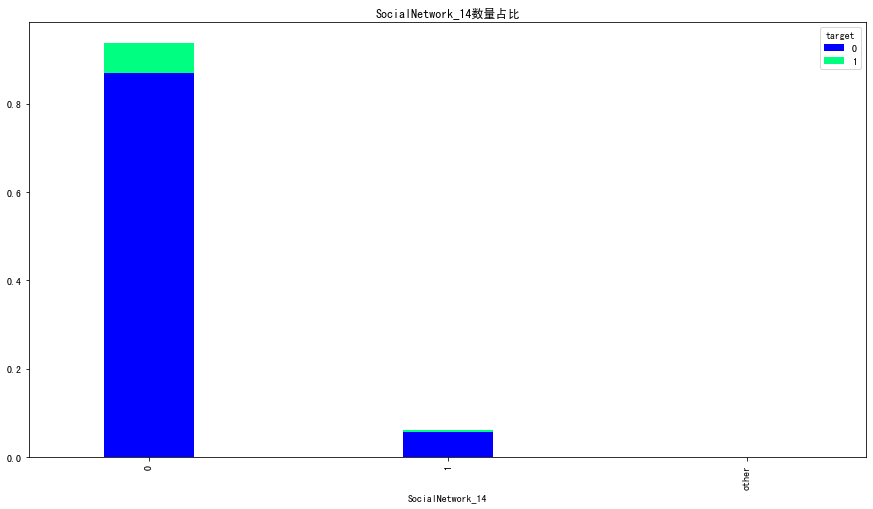

<Figure size 2880x2160 with 0 Axes>

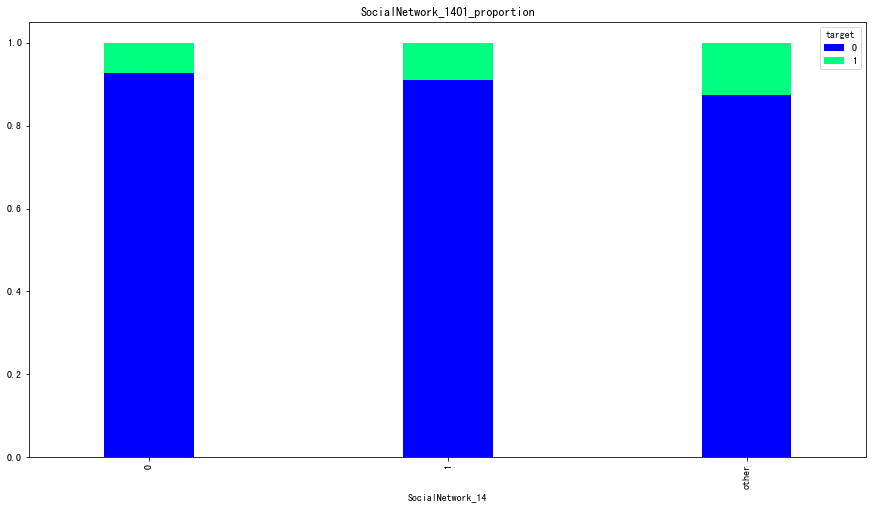

target               0     1    sum
SocialNetwork_15                   
0                0.901 0.071  29161
1                0.026 0.002    839


<Figure size 2880x2160 with 0 Axes>

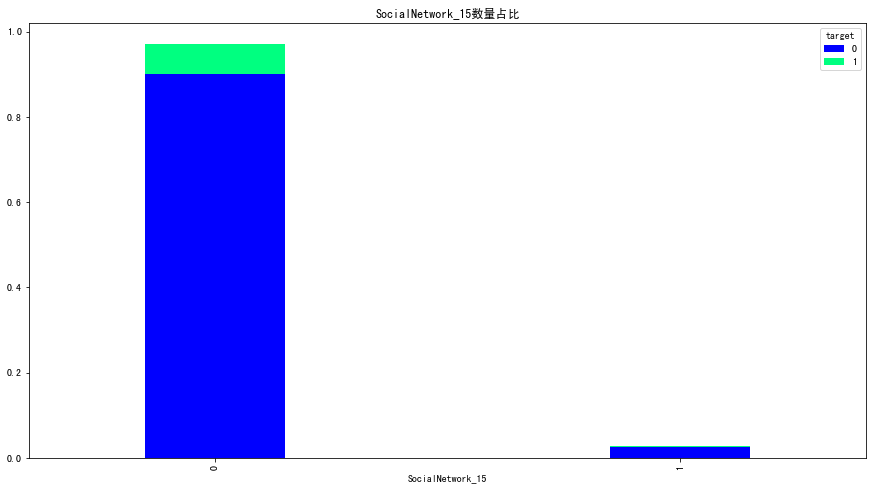

<Figure size 2880x2160 with 0 Axes>

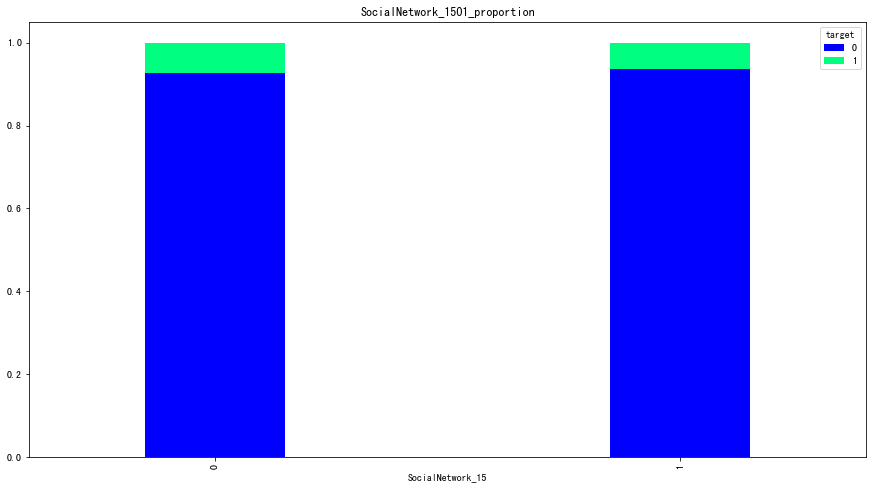

target               0     1    sum
SocialNetwork_16                   
0                0.911 0.072  29501
1                0.015 0.001    499


<Figure size 2880x2160 with 0 Axes>

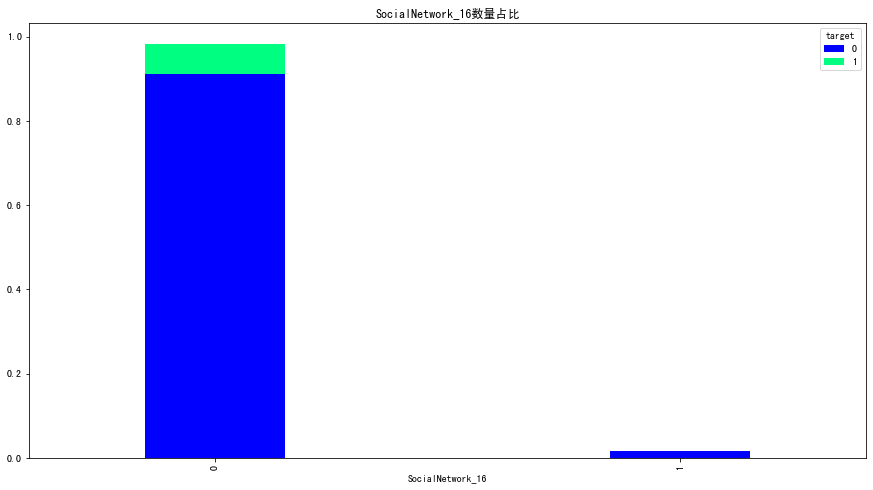

<Figure size 2880x2160 with 0 Axes>

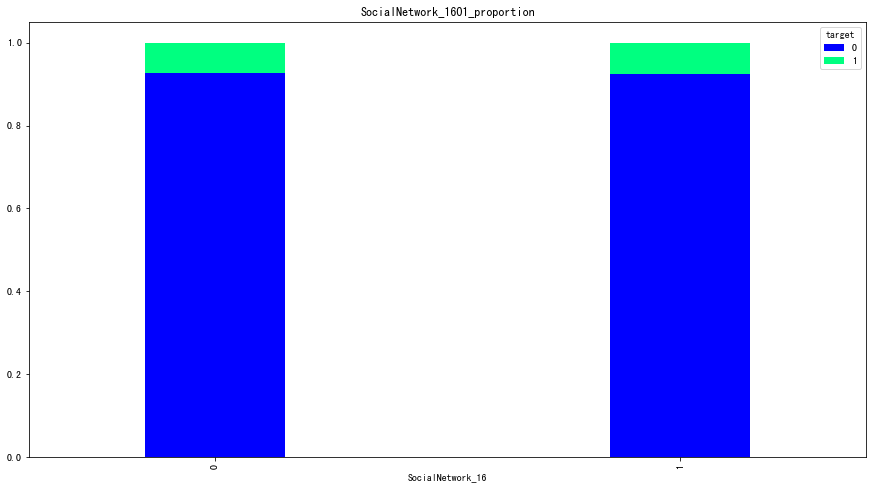

target               0     1    sum
SocialNetwork_17                   
0                0.693 0.054  22425
1                0.232 0.019   7547
other            0.001 0.000     28


<Figure size 2880x2160 with 0 Axes>

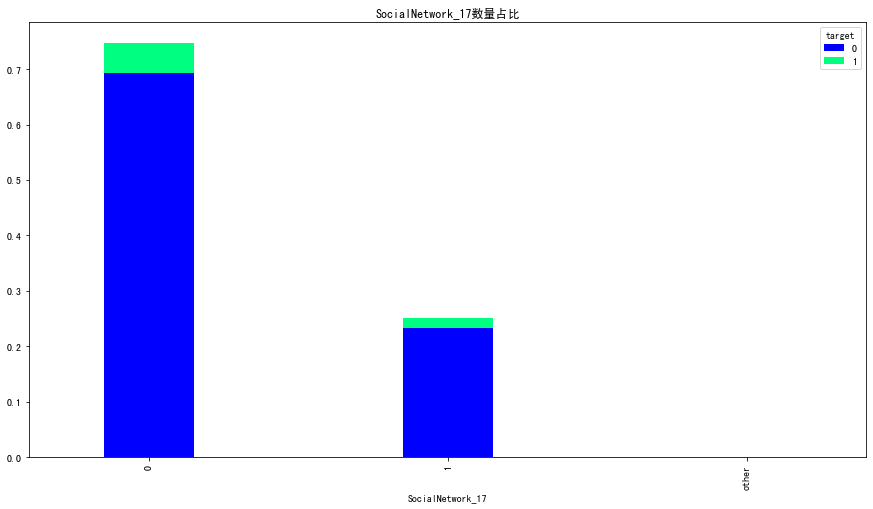

<Figure size 2880x2160 with 0 Axes>

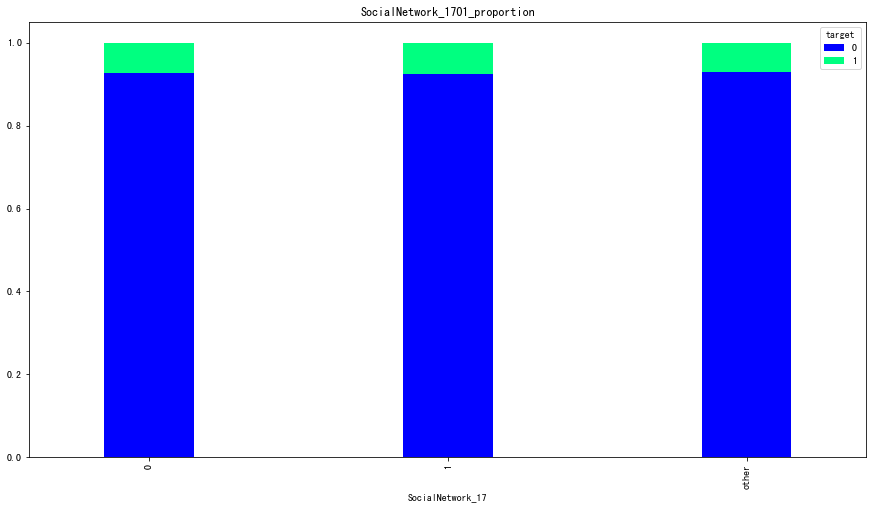

In [57]:
webinfo_categoty(social_less_list)

In [58]:
data.drop(['SocialNetwork_7', 'SocialNetwork_11', 'SocialNetwork_12'],axis=1,inplace=True)

<BarContainer object of 7 artists>

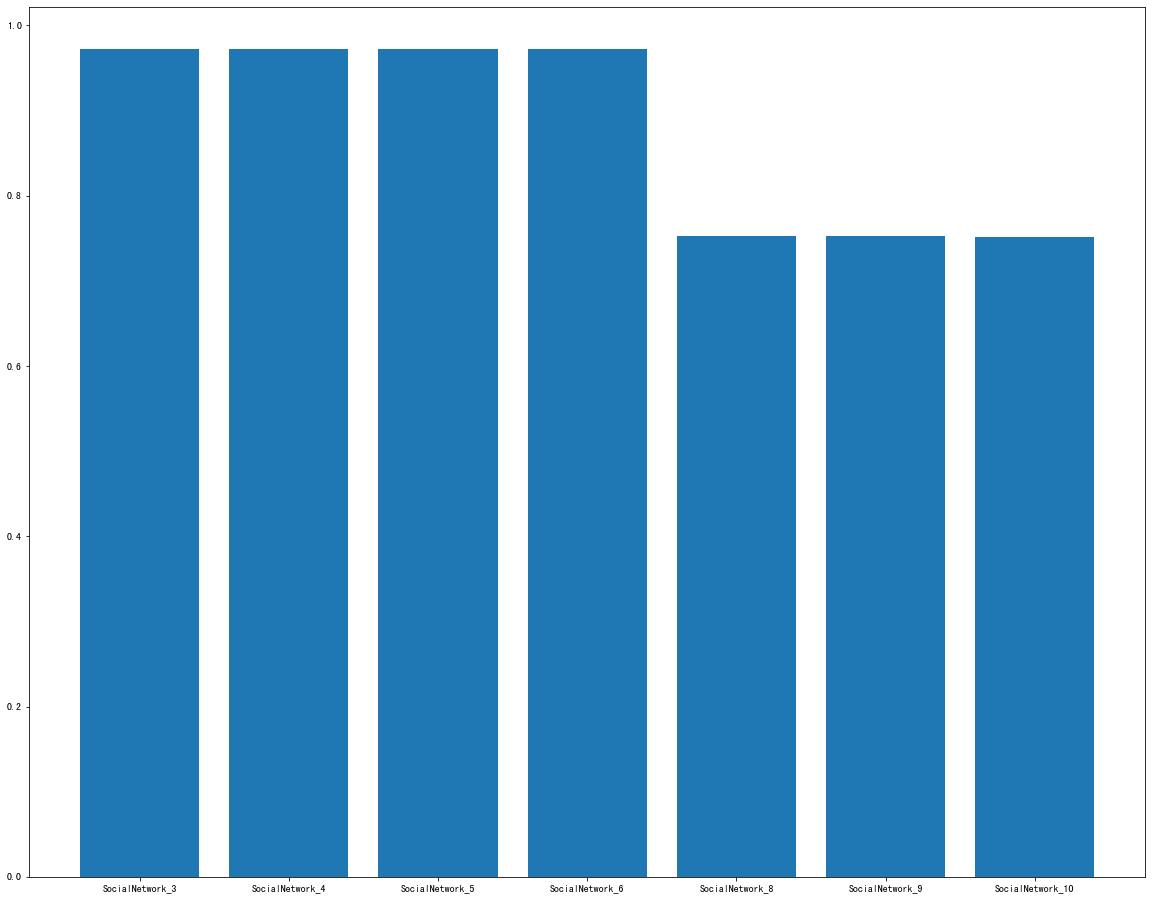

In [59]:
minus1_list=['SocialNetwork_3','SocialNetwork_4','SocialNetwork_5','SocialNetwork_6']
minus1_list.extend(combine('SocialNetwork_',8,10))
minus1_countlist=[]
for i in minus1_list:
    proportion=data[i].value_counts().values[0]/len(data)
    minus1_countlist.append(proportion)
count_proportion=pd.Series(data=minus1_countlist,index=minus1_list)
plt.figure(figsize=(20,16))
plt.bar(x=count_proportion.index,height=count_proportion)

In [60]:
data.drop(minus1_list,axis=1,inplace=True)
social_dum_list=['SocialNetwork_1','SocialNetwork_2']
social_dum_list.extend(combine('SocialNetwork_',13,17))
data=pd.get_dummies(data, columns=social_dum_list)

In [61]:
data.head()

Idx  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0  10001         1.000         1.000        14.000         0.000   
1  10002         1.000         1.000        14.000         0.000   
2  10003         2.000         2.000         9.000         3.000   
3  10006         0.000         0.000         2.000         0.000   
4  10007         1.000         1.000         3.000         0.000   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0          6.000          6.000          0.000          6.000          2.000   
1          0.000          0.000          7.000          7.000          0.000   
2          0.000          0.000          3.000          4.000          2.000   
3          0.000          0.000          0.000          2.000          0.000   
4          0.000          0.000          0.000          3.000          0.000   

   UserInfo_18  ThirdParty_Info_Period1_1  ThirdParty_Info_Period1_2  \
0           29                         10                         47   
1           28                          0                          0   
2           32                          1                          2   
3           33                          9                         54   
4           43                          1                          5   

   ThirdParty_Info_Period1_3  ThirdParty_Info_Period1_4  \
0                        167                          0   
1                         68                        105   
2                         50                         50   
3                         56                        125   
4                         39                         34   

   ThirdParty_Info_Period1_5  ThirdParty_Info_Period1_6  \
0                         25                         65   
1                         40                          2   
2                         49                          0   
3                         38                          0   
4                         36                         73   

   ThirdParty_Info_Period1_7  ThirdParty_Info_Period1_8  \
0                         68                         34   
1                        132                         39   
2                         78                         22   
3                        136                         45   
4                          0                          0   

   ThirdParty_Info_Period1_9  ThirdParty_Info_Period1_10  \
0                          2                           1   
1                          2                           1   
2                          0                           0   
3                          2                           1   
4                          1                           1   

   ThirdParty_Info_Period1_11  ThirdParty_Info_Period1_12  \
0                          10                          63   
1                           8                           0   
2                           7                           0   
3                           9                           0   
4                           5                           0   

   ThirdParty_Info_Period1_13  ThirdParty_Info_Period1_14  \
0                       27489                           0   
1                        3839                        9558   
2                        3578                        5360   
3                        3805                        9765   
4                         561                         792   

   ThirdParty_Info_Period1_15  ThirdParty_Info_Period1_16  \
0                       18900                        6083   
1                          49                        9571   
2                           0                        4646   
3                           0                       10461   
4                        1353                           0   

   ThirdParty_Info_Period1_17  ThirdParty_Info_Period2_1  \
0                        2506                         25   
1                        3777      

target               0     1    sum
ListingInfo_year                   
2013             0.050 0.006   1677
2014             0.877 0.067  28323


<Figure size 2880x2160 with 0 Axes>

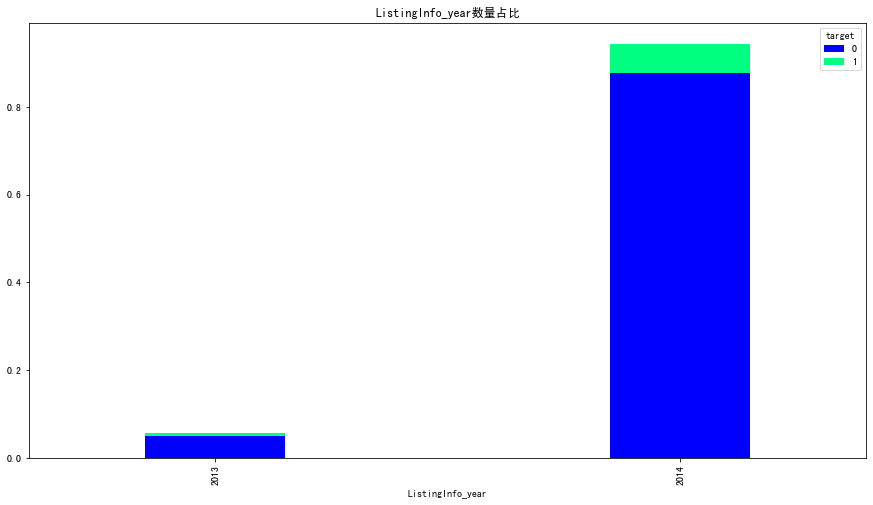

<Figure size 2880x2160 with 0 Axes>

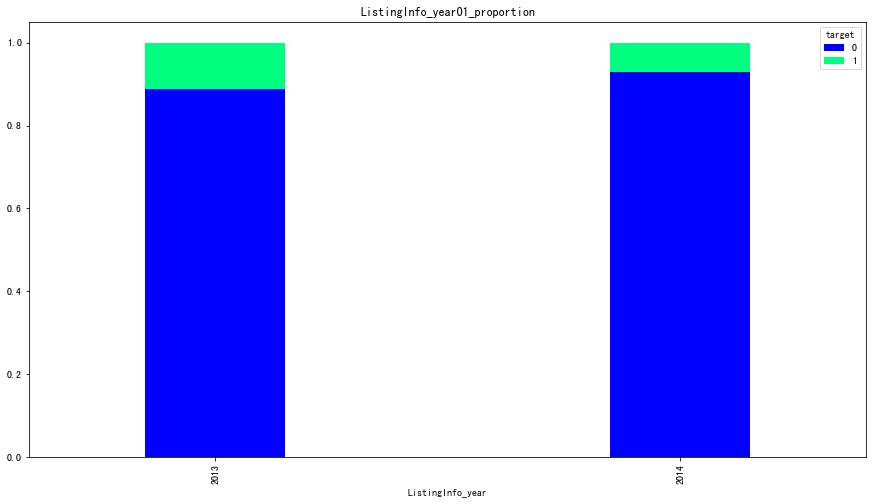

target                0     1   sum
ListingInfo_month                  
1                 0.031 0.003  1014
2                 0.023 0.002   748
3                 0.058 0.006  1934
4                 0.068 0.007  2249
5                 0.070 0.007  2328
6                 0.094 0.009  3112
7                 0.109 0.009  3547
8                 0.109 0.006  3465
9                 0.147 0.008  4649
10                0.159 0.009  5049
11                0.028 0.003   934
12                0.029 0.004   971


<Figure size 2880x2160 with 0 Axes>

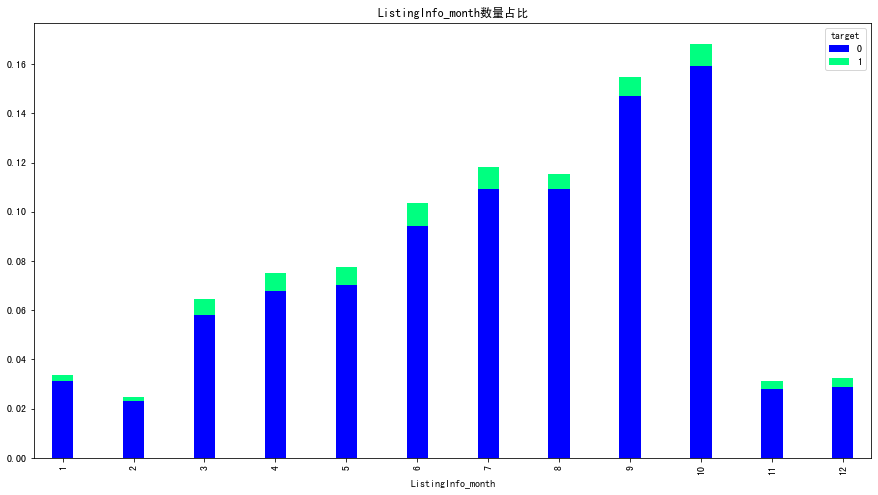

<Figure size 2880x2160 with 0 Axes>

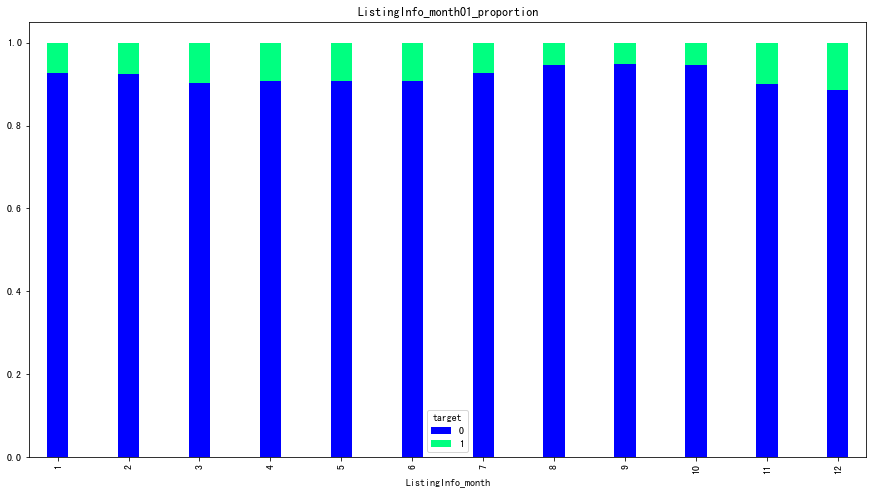

target               0     1   sum
ListingInfo_week                  
0                0.143 0.011  4620
1                0.171 0.012  5496
2                0.161 0.012  5192
3                0.133 0.013  4370
4                0.168 0.013  5439
5                0.083 0.006  2670
6                0.068 0.005  2213


<Figure size 2880x2160 with 0 Axes>

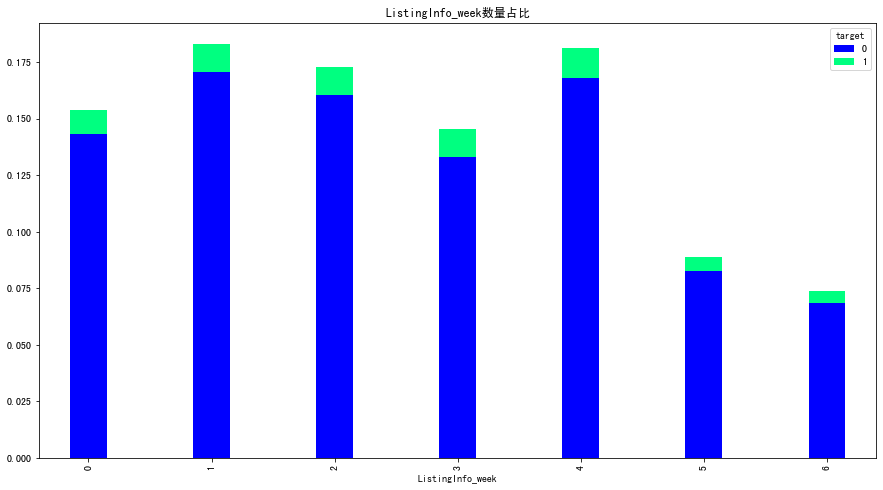

<Figure size 2880x2160 with 0 Axes>

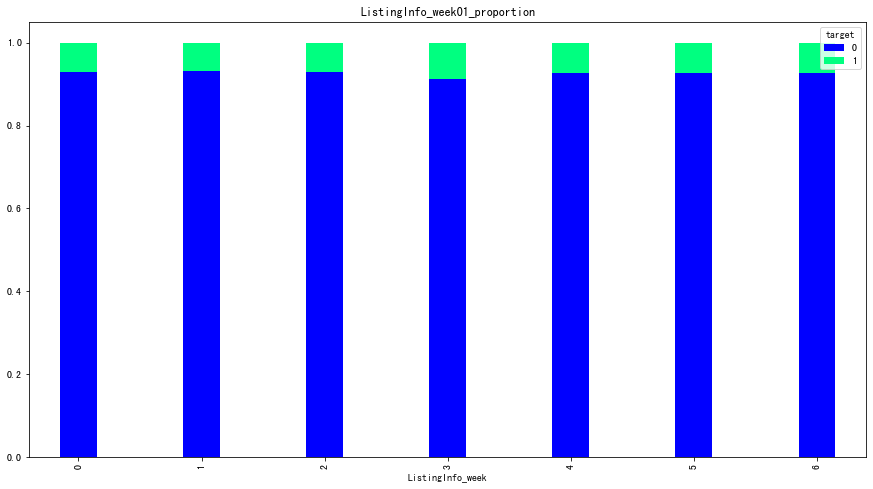

In [62]:
data['ListingInfo']=pd.to_datetime(data['ListingInfo'])
data['ListingInfo_year']=data['ListingInfo'].dt.year
data['ListingInfo_month']=data['ListingInfo'].dt.month
data['ListingInfo_week']=data['ListingInfo'].dt.weekday
Listinfo_list=['ListingInfo_year','ListingInfo_month','ListingInfo_week']
handle_list(Listinfo_list,title='SocialNetwork')

In [63]:
data['ListingInfo_week']=data['ListingInfo_week'].astype(str)
data['ListingInfo_month']=data['ListingInfo_month'].astype(str)
data['ListingInfo_year']=data['ListingInfo_year'].astype(str)
data.drop('ListingInfo',axis=1,inplace=True)
list_dummies_list=['ListingInfo_year','ListingInfo_month','ListingInfo_week']
data=pd.get_dummies(data,columns=list_dummies_list)

In [64]:
data.head()

Idx  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0  10001         1.000         1.000        14.000         0.000   
1  10002         1.000         1.000        14.000         0.000   
2  10003         2.000         2.000         9.000         3.000   
3  10006         0.000         0.000         2.000         0.000   
4  10007         1.000         1.000         3.000         0.000   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0          6.000          6.000          0.000          6.000          2.000   
1          0.000          0.000          7.000          7.000          0.000   
2          0.000          0.000          3.000          4.000          2.000   
3          0.000          0.000          0.000          2.000          0.000   
4          0.000          0.000          0.000          3.000          0.000   

   UserInfo_18  ThirdParty_Info_Period1_1  ThirdParty_Info_Period1_2  \
0           29                         10                         47   
1           28                          0                          0   
2           32                          1                          2   
3           33                          9                         54   
4           43                          1                          5   

   ThirdParty_Info_Period1_3  ThirdParty_Info_Period1_4  \
0                        167                          0   
1                         68                        105   
2                         50                         50   
3                         56                        125   
4                         39                         34   

   ThirdParty_Info_Period1_5  ThirdParty_Info_Period1_6  \
0                         25                         65   
1                         40                          2   
2                         49                          0   
3                         38                          0   
4                         36                         73   

   ThirdParty_Info_Period1_7  ThirdParty_Info_Period1_8  \
0                         68                         34   
1                        132                         39   
2                         78                         22   
3                        136                         45   
4                          0                          0   

   ThirdParty_Info_Period1_9  ThirdParty_Info_Period1_10  \
0                          2                           1   
1                          2                           1   
2                          0                           0   
3                          2                           1   
4                          1                           1   

   ThirdParty_Info_Period1_11  ThirdParty_Info_Period1_12  \
0                          10                          63   
1                           8                           0   
2                           7                           0   
3                           9                           0   
4                           5                           0   

   ThirdParty_Info_Period1_13  ThirdParty_Info_Period1_14  \
0                       27489                           0   
1                        3839                        9558   
2                        3578                        5360   
3                        3805                        9765   
4                         561                         792   

   ThirdParty_Info_Period1_15  ThirdParty_Info_Period1_16  \
0                       18900                        6083   
1                          49                        9571   
2                           0                        4646   
3                           0                       10461   
4                        1353                           0   

   ThirdParty_Info_Period1_17  ThirdParty_Info_Period2_1  \
0                        2506                         25   
1                        3777      

In [65]:
ThirdParty_dic={}
ThirdParty_list=[]
for i in range(1,8):
    name='ThirdParty_Info_Period'+str(i)
    for j in range(1,18):
        feature_name=name+'_'+str(j)
        ThirdParty_list.append(feature_name)
for i in ThirdParty_list:
    per=data[i].value_counts().loc[-1]/len(data)
    ThirdParty_dic[i]=per
nan_series=pd.Series(ThirdParty_dic)
# plt.figure(figsize=(50,15))
# plt.bar(x=nan_series.index,height=nan_series)
pd.set_option('display.max_rows', None)
print(nan_series)

ThirdParty_Info_Period1_1    0.006
ThirdParty_Info_Period1_2    0.006
ThirdParty_Info_Period1_3    0.006
ThirdParty_Info_Period1_4    0.006
ThirdParty_Info_Period1_5    0.006
ThirdParty_Info_Period1_6    0.006
ThirdParty_Info_Period1_7    0.006
ThirdParty_Info_Period1_8    0.006
ThirdParty_Info_Period1_9    0.006
ThirdParty_Info_Period1_10   0.006
ThirdParty_Info_Period1_11   0.006
ThirdParty_Info_Period1_12   0.006
ThirdParty_Info_Period1_13   0.006
ThirdParty_Info_Period1_14   0.006
ThirdParty_Info_Period1_15   0.006
ThirdParty_Info_Period1_16   0.006
ThirdParty_Info_Period1_17   0.006
ThirdParty_Info_Period2_1    0.010
ThirdParty_Info_Period2_2    0.010
ThirdParty_Info_Period2_3    0.010
ThirdParty_Info_Period2_4    0.010
ThirdParty_Info_Period2_5    0.010
ThirdParty_Info_Period2_6    0.010
ThirdParty_Info_Period2_7    0.010
ThirdParty_Info_Period2_8    0.010
ThirdParty_Info_Period2_9    0.010
ThirdParty_Info_Period2_10   0.010
ThirdParty_Info_Period2_11   0.010
ThirdParty_Info_Peri

In [66]:
ThirdParty_Info_Period7_list=[]
ThirdParty_Info_Period7_list.extend(combine('ThirdParty_Info_Period7_',1,17))
for feature in ThirdParty_Info_Period7_list:
    data.drop(feature,axis=1,inplace=True)

In [67]:
Third_sum=combine('third_period_sum',1,6)
Third_Period_list = ['ThirdParty_Info_Period1_', 'ThirdParty_Info_Period2_', 'ThirdParty_Info_Period3_', 
                     'ThirdParty_Info_Period4_', 'ThirdParty_Info_Period5_', 'ThirdParty_Info_Period6_']
for i in Third_Period_list:
    lst=combine(i,1,17)
    index=Third_Period_list.index(i)
    data[Third_sum[index]]=data[lst].sum(axis=1)
data[Third_sum].head()

third_period_sum1  third_period_sum2  third_period_sum3  third_period_sum4  \
0              55470              67745             107860              27223   
1              27191              65020             102982             138520   
2              18135              21358              17539              15039   
3              27615              43190              35988              26970   
4               2901               7239               6866               4488   

   third_period_sum5  third_period_sum6  
0              47741              20593  
1             112180                -17  
2              22734              41193  
3              38884              35509  
4               5921                -17

In [68]:
def calculate_gradient(feature1, feature2, new_feature):
    '''
    该函数功能是对df_dataset内两个Third_Period_Info特征之间相除比较
    由于特征内存在0和-1，因此在做除法时列举出几种特殊情况，进行特殊处理
    feature1:代表df_dataset内的Third_Period_Info特征名称
    feature2:代表df_dataset内的Third_Period_Info特征名称
    new_feature:代表两个特征相除后得到的新特征
    '''
    # 两个特征相除，并将结果存入新特征new_feature内
    data[new_feature] = data[feature2]/data[feature1]
    # 两个特征同时为-1的情况，将所有满足条件的索引存入index1
    index1 = data[(data[feature1]<0)&(data[feature2]<0)].index
    # 在新特征内，对index1的索引位置的值全部设为-8
    data[new_feature][index1] = -8
    # 两个特征中，前一个为-1，后一个为0的情况，将所有满足条件的索引存入index2
    index2 = data[(data[feature1]<0)&(data[feature2]==0)].index
    # 在新特征内，对index2的索引位置的值全部设为-7
    data[new_feature][index2] = -7
    # 两个特征中，前一个为0，后一个为-1的情况，将所有满足条件的索引存入index3
    index3 = data[(data[feature1]==0)&(data[feature2]<0)].index
    # 在新特征内，对index3的索引位置的值全部设为-6
    data[new_feature][index3] = -6
    # 两个特征同时为0的情况，将所有满足条件的索引存入index4
    index4 = data[(data[feature1]==0)&(data[feature2]==0)].index
    # 在新特征内，对index4的索引位置的值全部设为-5
    data[new_feature][index4] = -5
    # 两个特征中，前一个为正，后一个为-1的情况，将所有满足条件的索引存入index5
    index5 = data[(data[feature1]>0)&(data[feature2]<0)].index
    # 在新特征内，对index5的索引位置的值全部设为-4
    data[new_feature][index5] = -4
    # 两个特征中，前一个为正，后一个为0的情况，将所有满足条件的索引存入index6
    index6 = data[(data[feature1]>0)&(data[feature2]==0)].index
    # 在新特征内，对index6的索引位置的值全部设为-3
    data[new_feature][index6] = -3
    # 两个特征中，前一个为-1，后一个为正的情况，将所有满足条件的索引存入index7
    index7 = data[(data[feature1]<0)&(data[feature2]>0)].index
    # 在新特征内，对index7的索引位置的值全部设为-2
    data[new_feature][index7] = -2
    # 两个特征同时为正的情况，将所有满足条件的索引存入index8
    index8 = data[(data[feature1]==0)&(data[feature2]>0)].index
    # 在新特征内，对index8的索引位置的值全部设为-1
    data[new_feature][index8] = -1

# 创建period_compare_list，存储新生成的两两比较的特征名称  
period_compare_list = []
# 创建period_list，便于构成新特征名
period_list = ['1', '2', '3', '4', '5', '6']
# 遍历period_list每个元素
for j in period_list:
    # 生成新特征名称
    for k in range(period_list.index(j)+1, len(period_list)):
        # third_period_sum1和third_period_sum2比较，则新特征名称是'third_period_sum1to2'
        new_feature = 'third_period_sum' + j + 'to' + period_list[k]
        # 将新特征名称添加入period_compare_list
        period_compare_list.append(new_feature)            
# 打印结果
print(period_compare_list)
# 遍历period_compare_list内每个特征
for feature in period_compare_list:
    # 将period_compare_list内每个特征拆分，例如third_period_sum1to2拆分的前半部分是third_period_sum1，存入feature1内
    feature1 = feature.split('to')[0]
    # 拆分的后半部分，加上‘third_period_sum’，即还原为third_period_sum2
    feature2 = 'third_period_sum' + feature.split('to')[1]
    # 使用calculate_gradient函数计算third_period_sum1和third_period_sum2的比值，结果存入新特征third_period_sum1to2内
    calculate_gradient(feature1, feature2, feature)

# 计算好两个period的求和比值后，删除所有third_period_sum特征(相当于是中间的计算变量)
data.drop(Third_sum, axis=1, inplace=True)
# 展示结果
data[period_compare_list].head(20)

['third_period_sum1to2', 'third_period_sum1to3', 'third_period_sum1to4', 'third_period_sum1to5', 'third_period_sum1to6', 'third_period_sum2to3', 'third_period_sum2to4', 'third_period_sum2to5', 'third_period_sum2to6', 'third_period_sum3to4', 'third_period_sum3to5', 'third_period_sum3to6', 'third_period_sum4to5', 'third_period_sum4to6', 'third_period_sum5to6']


third_period_sum1to2  third_period_sum1to3  third_period_sum1to4  \
0                  1.221                 1.944                 0.491   
1                  2.391                 3.787                 5.094   
2                  1.178                 0.967                 0.829   
3                  1.564                 1.303                 0.977   
4                  2.495                 2.367                 1.547   
5                  2.395                 1.973                 2.192   
6                  1.694                 1.760                 0.259   
7                 -8.000                -8.000                -8.000   
8                  1.077                 0.577                 0.594   
9                  2.027                 2.138                 1.917   
10                 1.145                 1.096                 0.671   
11                 0.366                 0.384                 0.297   
12                 3.945                 5.383                 4.537   
13                 0.428                 0.218                 0.311   
14                 0.730                 0.768                 1.289   
15                 1.535                 2.636                 2.101   
16                 1.153                 0.722                 1.104   
17                 2.014                 1.896                 1.398   
18                 1.455                 1.249                 0.699   
19                 2.059                 2.089                 2.168   

    third_period_sum1to5  third_period_sum1to6  third_period_sum2to3  \
0                  0.861                 0.371                 1.592   
1                  4.126                -4.000                 1.584   
2                  1.254                 2.271                 0.821   
3                  1.408                 1.286                 0.833   
4                  2.041                -4.000                 0.948   
5                  4.712                 4.137                 0.824   
6                  1.687                 2.419                 1.039   
7                 -8.000                -8.000                -8.000   
8                  0.799                 0.867                 0.536   
9                  2.375                -4.000                 1.055   
10                 0.779                 0.714                 0.957   
11                 0.543                -4.000                 1.050   
12                 3.178                -4.000                 1.365   
13                 0.152                -4.000                 0.509   
14                 0.058                -4.000                 1.052   
15                 2.388                 2.543                 1.718   
16                 1.294                 2.583                 0.626   
17                 1.295                 1.443                 0.942   
18                 2.551                 1.388                 0.859   
19                 1.438                 1.862                 1.014   

    third_period_sum2to4  third_period_sum2to5  third_period_sum2to6  \
0                  0.402                 0.705                 0.304   
1                  2.130                 1.725                -4.000   
2                  0.704                 1.064                 1.929   
3                  0.624                 0.900                 0.822   
4                  0.620                 0.818                -4.000   
5                  0.915                 1.968                 1.727   
6                  0.153                 0.996                 1.428   
7                 -8.000                -8.000                -8.000   
8                  0.552                 0.743                 0.805   
9                  0.946                 1.172                -4.000   
10                 0.586                 0.680                 0.624   
11                 0.811                 1.484                -4.000   
12                 1.150                 0

In [69]:
period_compare = []
# 创建period_list，便于构成新特征名
period_list = ['1', '2', '3', '4', '5', '6']
# 遍历period_list内每个元素，便于构建新特征
for j in period_list:
    # 生成新特征名称
    for k in range(period_list.index(j)+1, len(period_list)):
        # 生成新特征名称
        for l in range(1,18):
            # 新特征名为'third_period2_1to3_1'
            new_feature = 'third_period' + j + '_' + str(l) + 'to' + period_list[k] + '_' + str(l)
            # 将特征添加入period_compare内
            period_compare.append(new_feature)            

# 遍历period_compare内每个特征
for feature in period_compare:
    # 将period_compare内每个特征拆分，例如third_period2_1to3_1拆分的前半部分是third_period2_1，存入feature1内
    feature1 = feature.split('to')[0]
    # 继续对feature1拆分，将2_1提取出来，与'ThirdParty_Info_Period'合并为原始特征'ThirdParty_Info_Period2_1'
    feature1 = 'ThirdParty_Info_Period' + feature1.split('third_period')[1]
    # 拆分的后半部分，加上‘ThirdParty_Info_Period’，即原始特征ThirdParty_Info_Period3_1
    feature2 = 'ThirdParty_Info_Period' + feature.split('to')[1]
    # 使用calculate_gradient函数计算third_period_sum1和third_period_sum2的比值，结果存入新特征third_period_sum1to2内
    calculate_gradient(feature1, feature2, feature)
# 展示结果
data[period_compare].head(10)

third_period1_1to2_1  third_period1_2to2_2  third_period1_3to2_3  \
0                 2.500                 1.660                 1.868   
1                -1.000                -1.000                 1.735   
2                -3.000                -3.000                 1.360   
3                 0.667                 1.074                 1.732   
4                 8.000                 4.200                 3.205   
5                 1.194                 1.140                 2.476   
6                 3.333                 1.333                 1.797   
7                -8.000                -8.000                -8.000   
8                 1.006                -3.000                 1.104   
9                 2.214                 0.214                 2.242   

   third_period1_4to2_4  third_period1_5to2_5  third_period1_6to2_6  \
0                -5.000                 1.840                 0.215   
1                 1.448                 1.400                 2.000   
2                 0.580                 0.714                -5.000   
3                 1.368                 1.474                -1.000   
4                 1.912                 1.583                 2.603   
5                 2.522                 1.413                 3.000   
6                 1.759                 1.424                 1.785   
7                -8.000                -8.000                -8.000   
8                 1.570                 1.165                -5.000   
9                 2.407                 1.753                -3.000   

   third_period1_7to2_7  third_period1_8to2_8  third_period1_9to2_9  \
0                 2.735                 3.294                 0.500   
1                 1.659                 1.205                 4.000   
2                 1.090                 0.545                -5.000   
3                 1.478                 1.467                -3.000   
4                -5.000                -5.000                 2.000   
5                 2.717                 1.777                -5.000   
6                -5.000                -5.000                -5.000   
7                -8.000                -8.000                -8.000   
8                 1.290                 1.546                -5.000   
9                 2.510                 1.625                -1.000   

   third_period1_10to2_10  third_period1_11to2_11  third_period1_12to2_12  \
0                   1.000                   1.600                  -3.000   
1                   5.000                   1.625                  -5.000   
2                  -5.000                   0.857                  -1.000   
3                  -3.000                   1.667                  -1.000   
4                   1.000                   2.400                  -5.000   
5                  -5.000                   1.818                  -5.000   
6                  -5.000                   1.143                  -5.000   
7                  -8.000                  -8.000                  -8.000   
8                  -5.000                   1.300                  -5.000   
9                  -1.000                   2.333                  -5.000   

   third_period1_13to2_13  third_period1_14to2_14  third_period1_15to2_15  \
0                   1.218                  -5.000                   0.034   
1                   4.134                   1.708                   3.796   
2                   1.519                   0.956                  -5.000   
3                   1.712                   1.510                  -1.000   
4                   3.467                   1.811                   2.497   
5                   2.235                   2.584                   4.674   
6                   1.709                   1.665                   1.693   
7                  -8.000                  -8.000                  -8.000   
8                   0.859                   1.400                  -5.000   
9                   2.028              

In [70]:
data.head()

Idx  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  WeblogInfo_8  \
0  10001         1.000         1.000        14.000         0.000   
1  10002         1.000         1.000        14.000         0.000   
2  10003         2.000         2.000         9.000         3.000   
3  10006         0.000         0.000         2.000         0.000   
4  10007         1.000         1.000         3.000         0.000   

   WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  WeblogInfo_18  \
0          6.000          6.000          0.000          6.000          2.000   
1          0.000          0.000          7.000          7.000          0.000   
2          0.000          0.000          3.000          4.000          2.000   
3          0.000          0.000          0.000          2.000          0.000   
4          0.000          0.000          0.000          3.000          0.000   

   UserInfo_18  ThirdParty_Info_Period1_1  ThirdParty_Info_Period1_2  \
0           29                         10                         47   
1           28                          0                          0   
2           32                          1                          2   
3           33                          9                         54   
4           43                          1                          5   

   ThirdParty_Info_Period1_3  ThirdParty_Info_Period1_4  \
0                        167                          0   
1                         68                        105   
2                         50                         50   
3                         56                        125   
4                         39                         34   

   ThirdParty_Info_Period1_5  ThirdParty_Info_Period1_6  \
0                         25                         65   
1                         40                          2   
2                         49                          0   
3                         38                          0   
4                         36                         73   

   ThirdParty_Info_Period1_7  ThirdParty_Info_Period1_8  \
0                         68                         34   
1                        132                         39   
2                         78                         22   
3                        136                         45   
4                          0                          0   

   ThirdParty_Info_Period1_9  ThirdParty_Info_Period1_10  \
0                          2                           1   
1                          2                           1   
2                          0                           0   
3                          2                           1   
4                          1                           1   

   ThirdParty_Info_Period1_11  ThirdParty_Info_Period1_12  \
0                          10                          63   
1                           8                           0   
2                           7                           0   
3                           9                           0   
4                           5                           0   

   ThirdParty_Info_Period1_13  ThirdParty_Info_Period1_14  \
0                       27489                           0   
1                        3839                        9558   
2                        3578                        5360   
3                        3805                        9765   
4                         561                         792   

   ThirdParty_Info_Period1_15  ThirdParty_Info_Period1_16  \
0                       18900                        6083   
1                          49                        9571   
2                           0                        4646   
3                           0                       10461   
4                        1353                           0   

   ThirdParty_Info_Period1_17  ThirdParty_Info_Period2_1  \
0                        2506                         25   
1                        3777      

In [71]:
userinfo=pd.read_csv('/Users/fireyr/Documents/heywhale_data/PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv')
userinfo.head(10)

Idx ListingInfo1    UserupdateInfo1 UserupdateInfo2
0  10001   2014/03/05       _EducationId      2014/02/20
1  10001   2014/03/05         _HasBuyCar      2014/02/20
2  10001   2014/03/05    _LastUpdateDate      2014/02/20
3  10001   2014/03/05  _MarriageStatusId      2014/02/20
4  10001   2014/03/05       _MobilePhone      2014/02/20
5  10001   2014/03/05       _MobilePhone      2014/02/20
6  10001   2014/03/05                _QQ      2014/02/20
7  10001   2014/03/05  _ResidenceAddress      2014/02/20
8  10001   2014/03/05    _ResidencePhone      2014/02/20
9  10001   2014/03/05   _ResidenceTypeId      2014/02/20

In [72]:
userinfo['ListingInfo1']=pd.to_datetime(userinfo['ListingInfo1'])
userinfo['UserupdateInfo2']=pd.to_datetime(userinfo['UserupdateInfo2'])
update_df=userinfo.groupby('Idx',as_index=False).agg({'ListingInfo1':np.max,'UserupdateInfo2':np.max})
update_df['timespan']=update_df['ListingInfo1']-update_df['UserupdateInfo2']
update_df['timespan']=update_df['timespan'].map(lambda x:str(x))
update_df['timespan']=update_df['timespan'].map(lambda x:int(x[:x.find('d')]))
update_df = update_df[['Idx','timespan']]

In [73]:
updatecnt = userinfo.groupby(['Idx'],as_index=False)['UserupdateInfo1'].count().rename(columns={'UserupdateInfo1':'Userupdate_cnt'})

minupdatecnt=userinfo.groupby(['Idx','UserupdateInfo1'],as_index=False)['UserupdateInfo2'].count().rename(columns={'UserupdateInfo1':'MinUserupdate_cnt','UserupdateInfo2':'cnt'})
minupdatecnt=minupdatecnt.sort_values('cnt').groupby('Idx',as_index=False).head(3)
minupdatecnt=minupdatecnt.drop('cnt',axis=1)

maxupdatecnt=userinfo.groupby(['Idx','UserupdateInfo1'],as_index=False)['UserupdateInfo2'].count().rename(columns={'UserupdateInfo1':'MaxUserupdate_cnt','UserupdateInfo2':'cnt'})
maxupdatecnt=maxupdatecnt.sort_values('cnt',ascending=False).groupby('Idx',as_index=False).head(3)
maxupdatecnt=maxupdatecnt.drop('cnt',axis=1)

updateinfo=pd.merge(updatecnt,userinfo,on='Idx',how='left')
updateinfo=pd.merge(updateinfo,minupdatecnt,on='Idx',how='left')
updateinfo=pd.merge(updateinfo,maxupdatecnt,on='Idx',how='left')
# print(updateinfo)


In [74]:
update_info_list=[]
for i in updateinfo:
    if updateinfo[i].dtypes=='object':
        update_info_list.append(i)
for i in update_info_list:
    label=LabelEncoder()
    updateinfo[i]=label.fit_transform(list(updateinfo[i].values))

In [75]:
full_data=pd.merge(updateinfo,data,on='Idx',how='left')

In [76]:
loginfo=pd.read_csv('/Users/fireyr/Documents/heywhale_data/PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv')
loginfo.head(10)

Idx Listinginfo1  LogInfo1  LogInfo2    LogInfo3
0  10001   2014-03-05       107         6  2014-02-20
1  10001   2014-03-05       107         6  2014-02-23
2  10001   2014-03-05       107         6  2014-02-24
3  10001   2014-03-05       107         6  2014-02-25
4  10001   2014-03-05       107         6  2014-02-27
5  10001   2014-03-05       107         6  2014-03-04
6  10001   2014-03-05         1         1  2014-02-20
7  10001   2014-03-05         1        20  2014-02-20
8  10001   2014-03-05        12         0  2014-02-20
9  10001   2014-03-05         1         2  2014-02-20

In [77]:
loginfo['Listinginfo1']=pd.to_datetime(loginfo['Listinginfo1'])
loginfo['LogInfo3']=pd.to_datetime(loginfo['LogInfo3'])
log_df=loginfo.groupby('Idx',as_index=False).agg({'Listinginfo1':np.max,'LogInfo3':np.max})
log_df['infospan']=log_df['Listinginfo1']-log_df['LogInfo3']
log_df['infospan']=log_df['infospan'].map(lambda x:str(x))
log_df['infospan']=log_df['infospan'].map(lambda x:int(x[:x.find('d')]))
log_df=log_df[['Idx','infospan']]

In [78]:
logtime_span_aver=loginfo.sort_values(['Idx','LogInfo3'])#默认升序
logtime_span_aver['LogInfo4']=logtime_span_aver.groupby('Idx')['LogInfo3'].apply(lambda x:x.shift(1))
logtime_span_aver['logtime_span_aver']=logtime_span_aver['LogInfo3']-logtime_span_aver['LogInfo4']
logtime_span_aver['logtime_span_aver']=logtime_span_aver['logtime_span_aver'].map(lambda x:x.days)
logtime_span_aver['logtime_span_aver']=logtime_span_aver['logtime_span_aver'].fillna(0)
logtime_span_aver=logtime_span_aver.groupby('Idx',as_index=False)['logtime_span_aver'].mean()

In [79]:
log_count=loginfo.groupby('Idx',as_index=False)['LogInfo1'].count().rename(columns={'UserupdateInfo1':'Userupdate_cnt'})


In [80]:
maxloginfo1_cnt=loginfo.groupby(['Idx','LogInfo1'],as_index=False)['LogInfo2'].count().rename(columns={'LogInfo1':'MaxLogInfo1','LogInfo2':'cnt'})
maxloginfo1_cnt=maxloginfo1_cnt.sort_values('cnt',ascending=False).groupby(['Idx'],as_index=False).head(1)
maxloginfo1_cnt=maxloginfo1_cnt.drop(['cnt'],axis=1)

maxloginfo2_cnt=loginfo.groupby(['Idx','LogInfo2'],as_index=False)['LogInfo1'].count().rename(columns={'LogInfo2':'MaxLogInfo2','LogInfo1':'cnt'})
maxloginfo2_cnt=maxloginfo2_cnt.sort_values('cnt',ascending=False).groupby(['Idx'],as_index=False).head(1)
maxloginfo2_cnt=maxloginfo2_cnt.drop(['cnt'],axis=1)


In [81]:
minloginfo1_cnt=loginfo.groupby(['Idx','LogInfo1'],as_index=False)['LogInfo2'].count().rename(columns={'LogInfo1':'MinLogInfo1','LogInfo2':'cnt'})
minloginfo1_cnt=minloginfo1_cnt.sort_values('cnt').groupby(['Idx'],as_index=False).head(1)
minloginfo1_cnt=minloginfo1_cnt.drop(['cnt'],axis=1)

minloginfo2_cnt=loginfo.groupby(['Idx','LogInfo2'],as_index=False)['LogInfo1'].count().rename(columns={'LogInfo2':'MinLogInfo2','LogInfo1':'cnt'})
minloginfo2_cnt=minloginfo2_cnt.sort_values('cnt').groupby(['Idx'],as_index=False).head(1)
minloginfo2_cnt=minloginfo2_cnt.drop(['cnt'],axis=1)


In [82]:
log_info=pd.merge(log_df,log_count,on='Idx',how='left')
log_info=pd.merge(log_info,logtime_span_aver,on='Idx',how='left')
log_info=pd.merge(log_info,maxloginfo1_cnt,on='Idx',how='left')
log_info=pd.merge(log_info,maxloginfo2_cnt,on='Idx',how='left')
log_info=pd.merge(log_info,minloginfo1_cnt,on='Idx',how='left')
log_info=pd.merge(log_info,minloginfo2_cnt,on='Idx',how='left')

In [83]:
full_data=pd.merge(log_info,data,on='Idx',how='left')

In [84]:
pd.set_option("display.max_columns",None)
full_data.head()

Idx  infospan  LogInfo1  logtime_span_aver  MaxLogInfo1  MaxLogInfo2  \
0    3         4        26              2.423           -4            6   
1    5         1        11              1.182           -4            6   
2    8         0       125              0.096           -4            6   
3   12         0       199              1.648            2            3   
4   16         1        15              0.533           -4            6   

   MinLogInfo1  MinLogInfo2  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  \
0            2            0         0.000         0.000         0.000   
1            3            0         1.000         1.000         0.000   
2            4           21         3.000         3.000         0.000   
3           10            2         2.000         2.000         0.000   
4            4            0         1.000         1.000         0.000   

   WeblogInfo_8  WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  \
0         0.000          0.000          0.000          0.000          0.000   
1         0.000          0.000          0.000          0.000          0.000   
2         0.000          0.000          0.000          0.000          0.000   
3         0.000          0.000          0.000          0.000          0.000   
4         0.000          0.000          0.000          0.000          0.000   

   WeblogInfo_18  UserInfo_18  ThirdParty_Info_Period1_1  \
0          0.000           38                         47   
1          0.000           28                        107   
2          0.000           21                          0   
3          0.000           36                         36   
4          0.000           38                          3   

   ThirdParty_Info_Period1_2  ThirdParty_Info_Period1_3  \
0                         46                        339   
1                         84                        442   
2                         44                        205   
3                          7                        379   
4                         19                        187   

   ThirdParty_Info_Period1_4  ThirdParty_Info_Period1_5  \
0                        360                        133   
1                        533                        138   
2                        123                         58   
3                          0                         98   
4                        186                        122   

   ThirdParty_Info_Period1_6  ThirdParty_Info_Period1_7  \
0                         19                        513   
1                         32                        700   
2                         44                        127   
3                          0                        338   
4                          1                        300   

   ThirdParty_Info_Period1_8  ThirdParty_Info_Period1_9  \
0                        167                         22   
1                        243                         11   
2                        157                          0   
3                         41                          0   
4                         72                          3   

   ThirdParty_Info_Period1_10  ThirdParty_Info_Period1_11  \
0                           5                          36   
1                           4                          32   
2                           0                          15   
3                           0                          22   
4                           2                          18   

   ThirdParty_Info_Period1_12  ThirdParty_Info_Period1_13  \
0                           0                           0   
1                           0                       29577   
2                           4                       39742   
3                           0                           0   
4                           0                       15978   

   ThirdParty_Info_Period1_14  ThirdParty_Info_Period1_15  \
0                           0                           0   
1

In [85]:
print(len(full_data['Idx'].unique()))

28987


In [86]:
full_data.drop('Idx',axis=True,inplace=True)

In [87]:
full_data.head()

infospan  LogInfo1  logtime_span_aver  MaxLogInfo1  MaxLogInfo2  \
0         4        26              2.423           -4            6   
1         1        11              1.182           -4            6   
2         0       125              0.096           -4            6   
3         0       199              1.648            2            3   
4         1        15              0.533           -4            6   

   MinLogInfo1  MinLogInfo2  WeblogInfo_4  WeblogInfo_6  WeblogInfo_7  \
0            2            0         0.000         0.000         0.000   
1            3            0         1.000         1.000         0.000   
2            4           21         3.000         3.000         0.000   
3           10            2         2.000         2.000         0.000   
4            4            0         1.000         1.000         0.000   

   WeblogInfo_8  WeblogInfo_14  WeblogInfo_15  WeblogInfo_16  WeblogInfo_17  \
0         0.000          0.000          0.000          0.000          0.000   
1         0.000          0.000          0.000          0.000          0.000   
2         0.000          0.000          0.000          0.000          0.000   
3         0.000          0.000          0.000          0.000          0.000   
4         0.000          0.000          0.000          0.000          0.000   

   WeblogInfo_18  UserInfo_18  ThirdParty_Info_Period1_1  \
0          0.000           38                         47   
1          0.000           28                        107   
2          0.000           21                          0   
3          0.000           36                         36   
4          0.000           38                          3   

   ThirdParty_Info_Period1_2  ThirdParty_Info_Period1_3  \
0                         46                        339   
1                         84                        442   
2                         44                        205   
3                          7                        379   
4                         19                        187   

   ThirdParty_Info_Period1_4  ThirdParty_Info_Period1_5  \
0                        360                        133   
1                        533                        138   
2                        123                         58   
3                          0                         98   
4                        186                        122   

   ThirdParty_Info_Period1_6  ThirdParty_Info_Period1_7  \
0                         19                        513   
1                         32                        700   
2                         44                        127   
3                          0                        338   
4                          1                        300   

   ThirdParty_Info_Period1_8  ThirdParty_Info_Period1_9  \
0                        167                         22   
1                        243                         11   
2                        157                          0   
3                         41                          0   
4                         72                          3   

   ThirdParty_Info_Period1_10  ThirdParty_Info_Period1_11  \
0                           5                          36   
1                           4                          32   
2                           0                          15   
3                           0                          22   
4                           2                          18   

   ThirdParty_Info_Period1_12  ThirdParty_Info_Period1_13  \
0                           0                           0   
1                           0                       29577   
2                           4                       39742   
3                           0                           0   
4                           0                       15978   

   ThirdParty_Info_Period1_14  ThirdParty_Info_Period1_15  \
0                           0                           0   
1                       29995  

In [89]:
full_data.shape

(28987, 705)

In [87]:
feature_name=np.array(full_data.columns[full_data.columns!='target'].to_list())
X_sample=full_data[feature_name].values
y_sample=full_data['target'].values
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.2,random_state=0)

> #### 2. 特征选择
200多个特征里可能有效的特征不会很多。在这里做特征选择相关的工作。 在特征选择这一块请使用```树```模型。 比如sklearn自带的特征选择模块（https://scikit-learn.org/stable/modules/feature_selection.html）， 或者直接使用XGBoost等模型来直接选择。 这些模型训练好之后你可以直接通过```feature_importance_values```属性来获取。

In [88]:
#创建决策树模型
dt_clf = DecisionTreeClassifier(class_weight='balanced',criterion='gini')
#树模型需要做交叉验证的参数：
#拆分内部节点所需的最小样本数
params_min_samples_split = [5,12,19]
#叶子节点所需的最小样本数
params_min_samples_leaf = [2,6,10]
#树的最大深度
params_max_depth = [4,6,8]
#创建参数网格
param_grid_dt = {'min_samples_split' : params_min_samples_split,
                 'min_samples_leaf' : params_min_samples_leaf,
                 'max_depth' : params_max_depth}
#通过GridSearchCV进行5折交叉验证,scoring取roc_auc
grid_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=4, scoring='roc_auc')
#进行网格搜索
grid_dt.fit(X_train, y_train)
#用grid.best_params_方法得到最佳参数，并打印展示
print('最佳参数是:{}'.format(grid_dt.best_params_))
#用grid.best_score_方法得到最佳得分，并打印展示
print('最佳得分是:{}'.format(grid_dt.best_score_))
#用grid.best_estimator_方法得到最佳模型，并打印展示
print('最佳模型是:{}'.format(grid_dt.best_estimator_))

最佳参数是:{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
最佳得分是:0.6460606570726971
最佳模型是:DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       min_samples_split=5)


In [89]:
model=grid_dt.best_estimator_
#训练模型
model.fit(X_train,y_train)
# 被选出来的特征
select_model = SelectFromModel(model, prefit=True)
selected_features = select_model.get_support()
# 重新构造feature_names
feature_name = feature_name[selected_features]
# 重新构造训练数据和测试数据
X_train1 = X_train[:, selected_features]
y_train1 = y_train
X_test1 = X_test[:, selected_features]
y_test1 = y_test
#打印新数据特征数量
print(X_train1.shape, X_test1.shape)

(23189, 14) (5798, 14)


> #### 3. XGBoost来训练风控模型，结果以AUC为准
https://github.com/dmlc/xgboost   这是XGBoost library具体的地址, 具有详细的文档。 https://pypi.org/project/xgboost/ 里有安装的步骤。 试着去调一下它的超参数，使得得到最好的效果。 一定要注意不需要使用测试数据来训练。 最终的结果以测试数据上的AUC为标准。 

In [162]:
# data_test = pd.read_csv('data/Test/PPD_Master_GBK_2_Test_Set.csv',encoding='gb18030')

xgb_clf = XGBClassifier(learning_rate=0.1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
#                         subsample=1,
#                         colsample_bytree=1,
                        booster='gbtree', scale_pos_weight=10, eval_metric='auc')

params_max_depth = [3,5,6,7,9]

params_n_estimators = [100,200]
params_colsample_bytree = [0.6,0.7,0.9]

params_subsample = [0.6,0.7,0.9]

param_grid_xgb = {'max_depth' : params_max_depth,
                  'n_estimators' : params_n_estimators,
                  'colsample_bytree' : params_colsample_bytree,
                  'subsample' : params_subsample}

grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=4, scoring='roc_auc')

grid_xgb.fit(X_train1,y_train1)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_c...0,
                                     max_depth=None, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_e

In [163]:
print('最佳参数是:{}'.format(grid_xgb.best_params_))
#用grid.best_score_方法得到最佳得分，并打印展示
print('最佳得分是:{}'.format(grid_xgb.best_score_))
#用grid.best_estimator_方法得到最佳模型，并打印展示
print('最佳模型是:{}'.format(grid_xgb.best_estimator_))

最佳参数是:{'colsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
最佳得分是:0.7053781676502222
最佳模型是:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [164]:
#建立最佳模型
model_xgb = grid_xgb.best_estimator_
#通过测试数据进行预测
predictions_xgb = model_xgb.predict(X_test1)
# 得到auc结果
rf_roc_auc = roc_auc_score(y_test1, predictions_xgb)
# 打印结果
print ("AUC = %2.4f" % rf_roc_auc)
#得出测试结果，生成报告
print('"\n\n ---测试报告---"')
print(classification_report(y_test1, predictions_xgb))

AUC = 0.6253
"

 ---测试报告---"
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      5347
           1       0.15      0.48      0.23       451

    accuracy                           0.75      5798
   macro avg       0.55      0.63      0.54      5798
weighted avg       0.88      0.75      0.80      5798



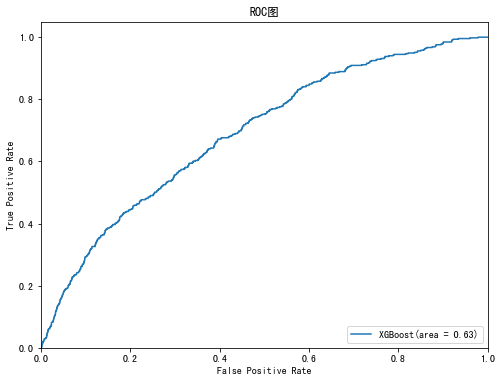

In [165]:
# 使用roc_curve方法计算roc曲线面积
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test1, model_xgb.predict_proba(X_test1)[:,1])
# 设置图片大小
plt.figure(figsize=(8,6))
# 使用plot方法画图
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost(area = %0.2f)' % rf_roc_auc)
# 设置x轴参数范围
plt.xlim([0.0, 1.0])
# 设置y轴参数范围
plt.ylim([0.0, 1.05])
# 设置x轴标签
plt.xlabel('False Positive Rate')
# 设置y轴标签
plt.ylabel('True Positive Rate')
# 设置图的标题
plt.title('ROC图')
# 设置图例位置
plt.legend(loc="lower right")
# 展示结果
plt.show()

In [103]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [106]:
lgb_train=lgb.Dataset(X_train1,y_train1)
lgb_test=lgb.Dataset(X_test1,y_test1,reference=lgb_train)

In [111]:
base_parmas={'boosting_type':'gbdt',
             'learning_rate':0.1,
             'num_leaves':31,
             'max_depth':-1,
             'bagging_fraction':0.7,
             'feature_fraction':0.7,
             'lambda_l1':0,
             'lambda_l2':0,
             'min_data_in_leaf':20,
             'min_child_weight':0.001,
             'metric':'auc'}
cv_result = lgb.cv(train_set=lgb_train,
                   num_boost_round=200,
                   early_stopping_rounds=10,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=base_parmas,
                   metrics='auc',
                   seed=0)
# end = time.time()
print('迭代次数:{}'.format(len(cv_result['auc-mean'])))
print('交叉验证的AUC:{}'.format(max(cv_result['auc-mean'])))

[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 18551, number of used features: 14
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 18551, number of used features: 14
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown paramete

In [112]:
params1={'num_leaves':list(range(25,35,1))}
model_lgb1=lgb.LGBMClassifier(
             learning_rate=0.1,
             n_estimators=23,
             max_depth=-1,
             bagging_fraction=0.7,
             feature_fraction=0.7,
             lambda_l1=0,
             lambda_l2=0,
             min_data_in_leaf=20,
             min_child_weight=0.001)
grid_search1=GridSearchCV(estimator=model_lgb1,cv=5,param_grid=params1,n_jobs=-1,scoring='roc_auc')
grid_search1.fit(X_train1,y_train1)
print('最优参数为:{}'.format(grid_search1.best_params_))
print('最优分数为:{}'.format(grid_search1.best_score_))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
最优参数为:{'num_leaves': 28}
最优分数为:0.6980444093774419


In [123]:
params3={'bagging_fraction':[i/10 for i in range(4,11,1)],'feature_fraction':[i/10 for i in range(4,11,1)]}
model_lgb3=lgb.LGBMClassifier(
             learning_rate=0.1,
             n_estimators=23,
             num_leaves=28,
             max_depth=-1,
             lambda_l1=0,
             lambda_l2=0,
             min_data_in_leaf=20,
             min_child_weight=0.001)
grid_search3=GridSearchCV(estimator=model_lgb3,cv=5,param_grid=params3,n_jobs=-1,scoring='roc_auc')
grid_search3.fit(X_train1,y_train1)
print('最优参数为:{}'.format(grid_search3.best_params_))
print('最优分数为:{}'.format(grid_search3.best_score_))

最优参数为:{'bagging_fraction': 0.4, 'feature_fraction': 0.6}
最优分数为:0.6982407651648325


In [128]:
params4={'lambda_l1':[0.7,0.75,0.8,0.85,0.9,1.0],'lambda_l2':[0.3,0.4,0.5,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74]}
model_lgb3=lgb.LGBMClassifier(
             learning_rate=0.1,
             n_estimators=23,
             num_leaves=28,
             bagging_fraction=0.4,
             feature_fraction=0.6,
             max_depth=-1,
             min_data_in_leaf=20,
             min_child_weight=0.001)
grid_search3=GridSearchCV(estimator=model_lgb3,cv=5,param_grid=params4,n_jobs=-1,scoring='roc_auc')
grid_search3.fit(X_train1,y_train1)
print('最优参数为:{}'.format(grid_search3.best_params_))
print('最优分数为:{}'.format(grid_search3.best_score_))

最优参数为:{'lambda_l1': 0.8, 'lambda_l2': 0.66}
最优分数为:0.70361793312759


In [135]:
params5={'min_data_in_leaf':[i for i in range(10,30,2)],'min_child_weight':[i/1000 for i in range(1,5,1)]}
model_lgb3=lgb.LGBMClassifier(
             learning_rate=0.1,
             n_estimators=23,
             num_leaves=28,
             bagging_fraction=0.4,
             feature_fraction=0.6,
             max_depth=-1,
             lambda_l1=0.8,
             lambda_l2=0.66)
grid_search3=GridSearchCV(estimator=model_lgb3,cv=5,param_grid=params5,n_jobs=-1,scoring='roc_auc')
grid_search3.fit(X_train1,y_train1)
print('最优参数为:{}'.format(grid_search3.best_params_))
print('最优分数为:{}'.format(grid_search3.best_score_))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.66, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.66
[LightGBM] [Warning] lambda_l1 is set=0.8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8
最优参数为:{'min_child_weight': 0.001, 'min_data_in_leaf': 20}
最优分数为:0.70361793312759


In [171]:
final_parmas={'boosting_type':'gbdt',
             'learning_rate':0.1,
             'num_leaves':28,
             'max_depth':-1,
             'bagging_fraction':0.4,
             'feature_fraction':0.6,
             'lambda_l1':0.8,
             'lambda_l2':0.66,
             'min_data_in_leaf': 20,
             'min_sum_hessian_inleaf':0.001,
             'metric':'auc'}
cv_result = lgb.cv(train_set=lgb_train,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=final_parmas,
                   metrics='auc',
                   seed=0)
print('最大的迭代次数:{}'.format(len(cv_result['auc-mean'])))
print('交叉验证的AUC:{}'.format(max(cv_result['auc-mean'])))

[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 18551, number of used features: 14
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

In [169]:
final_model = lgb.LGBMClassifier(learning_rate=0.1,
             n_estimators=425,
             num_leaves=28,
             max_depth=-1,
             bagging_fraction=0.4,
             feature_fraction=0.6,
             lambda_l1=0.8,
             lambda_l2=0.66,
             min_data_in_leaf=20,
             min_sum_hessian_inleaf=0.001)
final_model.fit(X_train1,y_train1)
final_pre= final_model.predict_proba(X_test1)[:,1]
# final_pre= final_model.predict(X_test1)
rf_roc_auc = roc_auc_score(y_test1, final_pre)
# 打印结果
print ("AUC = %2.4f" % rf_roc_auc)

[LightGBM] [Warning] Unknown parameter: min_sum_hessian_inleaf
[LightGBM] [Warning] lambda_l1 is set=0.8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0.66, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.66
AUC = 0.6893
